
![](https://streamlit.io/images/brand/streamlit-logo-secondary-colormark-darktext.png)

<font size="+1" color="grey"><b>Abstract</b></font>

<p style="
   font-size : 16px; 
   background-color: #ececec; 
   border-bottom-left-radius: 10px;
   border-bottom-right-radius: 10px;
   border-top-left-radius: 10px;
   border-top-right-radius: 10px;
   padding: 10px
   "
>
The following analysis deals with the risk resp. probability of a stroke. It can be shown that such predictions are possible and can be a suitable tool for physicians, e.g. to be able to make a more reliable statement about possible risks when advising patients. Several techniques from the field of statistical learning are applied. The underlying data set, as it exists, is not directly suitable for such predictions because of a strong minority class problem. This problem is solved synthetically. Various supervised machine learning algorithms are then applied. These are examined for plausibility of feature impacts with the model output using model-agnostic methods (SHAP). Finally, an ensemble of the strongest methods is created, which shows a stronger performance than all previous methods individually. This ensemble is then deployed as a freely accessible app that can be used on a PC/Mac or mobile phone.
</p>

<a href="https://frankmollard-stroke-probability-stroke-proba-9rjrn6.streamlitapp.com/" style="font-size: 18px; color: #e24a4b">Click here to go tho the Application</a>


<a id='top'></a>

<p style="font-size : 30px"><font color="darkgrey"><b>Content</b><font/><p/>
    
1. [<font color="darkgrey"><b>Research Question</b><font/>](#1)<br>   
2. [<font color="darkgrey"><b>Business Understanding</b><font/>](#2)<br>       
3. [<font color="darkgrey"><b>Data Understanding</b><font/>](#3) 
    - 3.1 [<font color="darkgrey"><b>Target Separated Relationships 2D</b><font/>](#3.1)
    - 3.2 [<font color="darkgrey"><b>Target Separated Relationships 3D</b><font/>](#3.2)
    - 3.3 [<font color="darkgrey"><b>Share of Stroke by Category</b><font/>](#3.3)<br>      
    - 3.4 [<font color="darkgrey"><b>Target Separated Dispersion Continous vs. Categorical</b><font/>](#3.4)<br><br> 
4. [<font color="darkgrey"><b>Data Preparation</b><font/>](#4)<br>    
    - 4.1 [<font color="darkgrey"><b>Feature Engineering</b><font/>](#4.1)    
    - 4.2 [<font color="darkgrey"><b>Cross Validation Strategy</b><font/>](#4.2) 
    - 4.3 [<font color="darkgrey"><b>Imputation</b><font/>](#4.3) 
    - 4.4 [<font color="darkgrey"><b>Synthetic Minority Oversampling TEchnique (SMOTE)</b><font/>](#4.4)<br><br>      
5. [<font color="darkgrey"><b>Modeling & Evaluation</b><font/>](#5)<br>    
    - 5.1 [<font color="darkgrey"><b>Support Vector Machines (SVM)</b><font/>](#5.1) 
        - 5.1.1 [<font color="darkgrey"><b>Evaluation without SMOTE</b><font/>](#5.1.1) 
        - 5.1.2 [<font color="darkgrey"><b>Evaluation Using SMOTE</b><font/>](#5.1.2) 
    - 5.2 [<font color="darkgrey"><b>k Nearest Neighbors (kNN)</b><font/>](#5.2) 
    - 5.3 [<font color="darkgrey"><b>Random Forest (RF)</b><font/>](#5.3) 
    - 5.4 [<font color="darkgrey"><b>Naive Bayes Classifier (NBC)</b><font/>](#5.4) 
    - 5.5 [<font color="darkgrey"><b>Logistic Regression (Logit)</b><font/>](#5.5) 
    - 5.6 [<font color="darkgrey"><b>CatBoost (CB)</b><font/>](#5.6) 
    - 5.7 [<font color="darkgrey"><b>Assessment of the different algorithms</b><font/>](#5.7) 
    - 5.8 [<font color="darkgrey"><b>Decision Boundaries/Areas</b><font/>](#5.8)     
    - 5.9 [<font color="darkgrey"><b>SHapley Additive exPlanations (SHAP)</b><font/>](#5.9)        
        - 5.9.1 [<font color="darkgrey"><b>Support Vector Machines</b><font/>](#5.9.1)     
        - 5.9.2 [<font color="darkgrey"><b>Random Forest</b><font/>](#5.9.2)     
        - 5.9.3 [<font color="darkgrey"><b>Naive Bayes Classifier</b><font/>](#5.9.3)   
        - 5.9.4 [<font color="darkgrey"><b>Logistic Regression</b><font/>](#5.9.4)   
        - 5.9.5 [<font color="darkgrey"><b>CatBoost</b><font/>](#5.9.5)   
    - 5.10 [<font color="darkgrey"><b>Error Analysis</b><font/>](#5.10)   
    - 5.11 [<font color="darkgrey"><b>Reducing Complexity</b><font/>](#5.11)   
    - 5.12 [<font color="darkgrey"><b>Ensemble</b><font/>](#5.12)      
        - 5.12.1 [<font color="darkgrey"><b>Cross Comparison</b><font/>](#5.12.1)   
        - 5.12.2 [<font color="darkgrey"><b>Unseen Test Data</b><font/>](#5.12.2)<br>       
6. [<font color="darkgrey"><b>Key Insights and Value Added</b><font/>](#6)<br><br>  
    - 6.1 [<font color="darkgrey"><b>Critical Assesment</b><font/>](#6.1)   
    - 6.2 [<font color="darkgrey"><b>Outlook</b><font/>](#6.2)<br><br>
7. [<font color="darkgrey"><b>Deployment</b><font/>](#7)

[<font color="darkgrey"><b>Sources</b><font/>](#sources)

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport as PR
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go
import gc

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn.impute import KNNImputer

import joblib

from imblearn.over_sampling import SMOTENC

from catboost import CatBoostClassifier, Pool

import shap

seeds = 11235813
np.random.seed(seeds)

import warnings
warnings.filterwarnings("ignore")

<p style="font-size : 16px">The following dataset is a medical dataset about patient data. More specifically, it is about strokes. The dataset is special in the sense that the number of strokes is a minority class. In addition, some data is missing, which would allow imputation (as suggested). It is very likely that the dataset originally came from the electronic health record (EHR) controlled by McKinsey & Company and used for the healthcare hackathon. An EHR is a digital version of a patient's paper record. I assume that the dataset was not artificially created and that the data was gathered correctly.</p>

In [2]:
data=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data.head(n=3)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1

<font size="+3" color="grey"><b>1. Research Question </b></font><br><a id="1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>


<p style="font-size : 16px">Is it possible to train a model that can make credible predictions of stroke? Such a model needs to be powerful enough to provide some confidence in the results. This means that the outcome of the model should not only be determined by coincidence. Furthermore, the performance level should be increased by all available means as much as possible. The difficulty is that there are very few observations in the dataset that have been diagnosed with stroke. Therefore, we need to find a way to address this problem.</p> 

<p style="font-size : 16px">We are in the area of supervised learning. If it is possible to develop such a model, it should also be used in production to give interested people the opportunity to assess the risk of a stroke. The CRISP DM framework will be used for this purpose:</p>

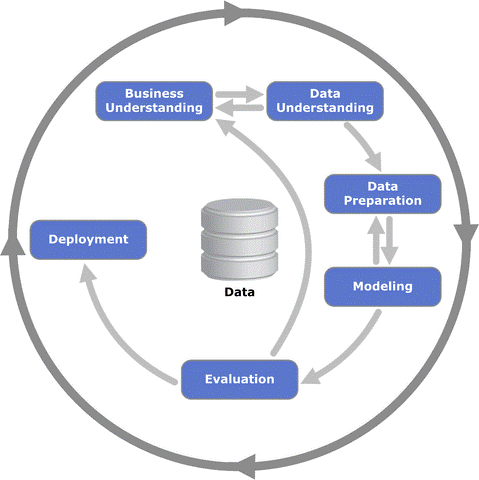


<font size="+3" color="grey"><b>2. Business Understanding </b></font><br><a id="2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Suppose we want to develop a model to determine a patient's risk of stroke. This model has to be made available via an app and support doctors but also patients in assessing stroke risks. I assume that there is some demand for this kind of application. The use of the app could be provided for a regular fee. For the purpose of demonstartion for this final assignment, the app will be deployed online for free.</p>

<p style="font-size : 18px"><b>Requirements:</b></p>

* <p style="font-size : 16px">The prognosis of a stroke should be accurate. This means that not too many and not too few strokes should be predicted, as this will influence the users assessment. A physician should use the application only for support. The model should not be too sensitive in order not to worry the patients/users. It is not about an acute stroke, but about a risk assessment. To obtain this property, <b>the probability of a stroke</b>, which is calculated via a classification task, <b>is set equal to the risk of a stroke</b>.</p>
* <p style="font-size : 16px">The model should be performant in terms of prediction time. Therefore, the computational complexity must be considered. The Big-O notation, which is available at least approximately for the applied algorithms, is suitable for this task.</p> 
* <p style="font-size : 16px">The app provided should be easy to use and readily available.</p>
* <p style="font-size : 16px">The app should indicate the probability rather than the class "stroke", as this indicates uncertainty in the prediction/risk.</p>
* <p style="font-size : 16px">If the user changes patient data, the resulting change in risk should also be visible. </p>
* <p style="font-size : 16px">For interested users, more in-depth information about the risk calculation should be available.</p>
* <p style="font-size : 16px">If new data is available and new models have been trained, the resulting model hypotheses should be easy to implement in the existing system.</p>

<font size="+3" color="grey"><b>3. Data Understanding </b></font><br><a id="3"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>


### Here is a brief description of the features:

* <p style="font-size : 16px">id: unique identifier</p>
* <p style="font-size : 16px">gender: "Male", "Female" or "Other"</p>
* <p style="font-size : 16px">age: age of the patient</p>
* <p style="font-size : 16px">hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension</p>
* <p style="font-size : 16px">heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</p>
* <p style="font-size : 16px">ever_married: "No" or "Yes"</p>
* <p style="font-size : 16px">work_type: "children", "Govt_jov", "Never_worked", "Private", or "Self-employed"</p>
* <p style="font-size : 16px">Residence_type: "Rural" or "Urban"</p>
* <p style="font-size : 16px">avg_glucose_level: average glucose level in blood</p>
* <p style="font-size : 16px">bmi: body mass index</p>
* <p style="font-size : 16px">smoking_status: "formerly smoked", "never smoked", "smokes", or "Unknown"*</p>
* <p style="font-size : 16px">stroke: 1 if the patient had a stroke or 0 if not</p>

**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

<p style="font-size : 16px">There are two types of stroke:<sup>1</sup></p>

* <p style="font-size : 16px"><i>Ischemic strokes. These are strokes caused by blockage of an artery (or, in rare instances, a vein). About 87% of all strokes are ischemic.</i></p>

* <p style="font-size : 16px"><i>Hemorrhagic strokes. These are strokes caused by bleeding. About 13% of all strokes are hemorrhagic.</i></p>

<p style="font-size : 16px">In this dataset, no distinction is made between the two different types, but this can make model training difficult. Thus, there is a certain variance within the stroke class.</p>

1 https://www.hopkinsmedicine.org/health/conditions-and-diseases/stroke/types-of-stroke


<p style="font-size : 16px">To understand the dataset, we need to start at its creation. As mentioned above, we assume that the dataset contains correct data. However, further assumptions need to be made. It is of considerable importance when the measurement of the last glucose value (which is included in the average) took place. Was the measurement taken immediately after the stroke or later? We assume that this measurement took place after the period in which the blood glucose value is elevated after the stroke. Blood glucose is often elevated in the acute situation of stroke [cf. Olsen 2014, p. 409]. This assumption is important for causality. If the measurement was taken immediately after the stroke, we would predict an acute stroke situation because the stroke is causal for the elevated glucose level. However, if the measurement was taken much later, then the causality is reversed. Then the glucose level would cause the stroke. The latter is what we assume.</p>

In [3]:
data.drop(columns=["id"], inplace=True)

<p style="font-size : 16px">To get an initial overview of the dataset, we use pandas profiling. This produces simple descriptive statistics and overviews.</p>

* <p style="font-size : 16px">Tab one shows a general overview.</p>
* <p style="font-size : 16px">Tab two gives information about the variables themselves, such as distribution information. </p>
* <p style="font-size : 16px">Tab three shows interactions between the continuous variables. </p>
* <p style="font-size : 16px">Tab four shows different correlation concepts. </p>
* <p style="font-size : 16px">Tab five counts the missing values and </p>
* <p style="font-size : 16px">tab six shows head and tail of the dataset.</p>

In [4]:
profile = PR(
    data, 
    title="Stroke Dataset Report", 
    dark_mode=False, 
    progress_bar=False,
    explorative=True,
    plot={"correlation": {"cmap": "coolwarm", "bad": "#000000"}}
)

profile.to_notebook_iframe()

<p style="font-size : 16px"><b>Important noticeable features:</b></p>

* <p style="font-size : 16px">The data set has 5110 observations.</p>
* <p style="font-size : 16px">Most variables (8 of 11) are categorical.</p>
* <p style="font-size : 16px">Related to the stroke target, there is a minority class problem.</p>
* <p style="font-size : 16px">As can be seen under the correlations tab (or the alarms), there is (multi)collinearity - especially for age.</p>
* <p style="font-size : 16px">There are 211 missing values in the variable bmi.</p>
* <p style="font-size : 16px">There are three genders, one has only one observation.</p>

<p style="font-size : 16px">Although it may well be possible to specify male, female, diverse in the model later in production, the one observation "other" is very problematic for the modeling process. To enable the model to also understand and correctly classify "other" as a feature, more observations from both stroke classes should be added.</p>

<p style="font-size : 16px">For this reason, this observation cannot be included.</p>

In [5]:
data.loc[data.gender == "Other"]

gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In [6]:
data = data.loc[data.gender != "Other"]

<p style="font-size : 16px">Now the continuous and categorical variables are designated.</p>

In [7]:
contVars = ["age", "avg_glucose_level", "bmi"]
catVars = [i for i in data.columns if i not in contVars and i != "stroke"]

<font size="+1" color="grey"><b>3.1 Target Separated Relationships 2D </b></font><br><a id="3.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Once again, we look at the two-dimensional relationships between the continuous variables and the respective distributions, this time broken down by the target variable "stroke".</p>

In [8]:
def corPlot(df, color: str, title, bins=40):
    sns.set_theme(style="white", font_scale=1.3)

    pp=sns.pairplot(
        df, 
        hue=color, 
        kind="hist", 
        diag_kind="kde",
        corner=True,
        plot_kws={"alpha": 0.9, 'bins':bins},
        diag_kws = {'alpha':0.8, 'bw_adjust': 1, "fill": False, "cut": 0},
        palette="coolwarm",
        aspect=1.1,
        height=3.2
    )

    pp.fig.suptitle(title, fontsize=15)
    plt.show()

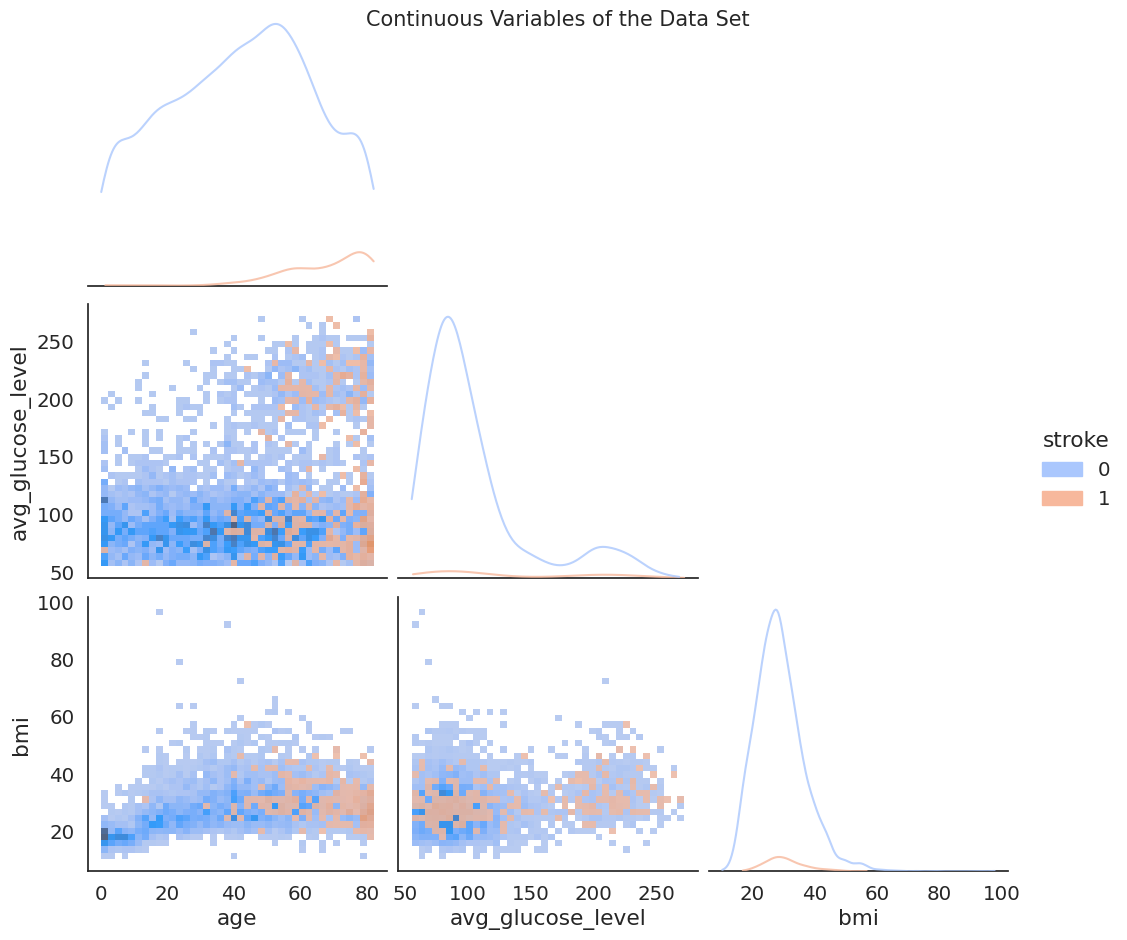

In [9]:
contVars.append("stroke")
corPlot(data[contVars], "stroke", "Continuous Variables of the Data Set")

<p style="font-size : 16px">As can be clearly seen, in the dimension "avg_glucose_level" there are two clusters containing strokes (and non-strokes). In terms of "age", there is only one cluster for stroke at higher age. There are also BMIs that are unusually high. This data, if present in the learning data set, could cause problems as all these outliers only correspond to the majority class. The corresponding observations are not included in the learning data set in this form. </p>

In [10]:
contVars.pop(-1)

'stroke'

<font size="+1" color="grey"><b>3.2 Target Separated Relationships 3D </b></font><br><a id="3.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">A three-dimensional view is also useful, since there are exactly three dimensions of continuous variables. The overall picture is presented somewhat differently by the 3D view, as both the amount of information (perspective of depth) that such a view conveys and the perception of the viewer is different. </p>

<p style="font-size : 16px">You can zoom in with the mouse wheel. The left mouse button can be used to hold and move the three-dimensional space. The small house in the upper right corner resets the view. By clicking on the legend you can unselect a class. <b>By double clicking you can select a class.</b></p>

In [11]:
def plot3d(df, cls: list, c: str, X: str, Y: str, Z: str, title):
    
    """
    Function to plot 3 dimensions, colored by category (c)
    
    df=pd.DataFrame
    cls=colors for no-stroke and stroke
    c=category to separate by color 
    X=X dimension
    Y=Y dimension
    Z=Z dimension
    title=title of the plot
    """
    
    fig = go.Figure()

    for i in range(len(df["%s" % (c)].unique())):
        fig.add_trace(
            go.Scatter3d(
                x=df.loc[df["%s" % (c)] == i, X], 
                y=df.loc[df["%s" % (c)] == i, Y], 
                z=df.loc[df["%s" % (c)] == i, Z],
                mode='markers',
                marker=dict(
                    size=7,
                    color=cls[i],            
                    opacity=0.6
                ), name = i,
                 hovertemplate = 
                    f"<i>{X}</i>: " +"%{x} <br>"+
                    f"<i>{Y}</i>: " +"%{y} <br>"+
                    f"<i>{Z}</i>: " +"%{z}"
            )
        )
        fig.update_layout(
            hoverlabel=dict(font=dict(color='white'))   
        )
    fig.update_layout(
        title=title,
        template="plotly_white",
        margin=dict(l=65, r=20, b=0, t=10),
        width=800,
        height=800,
        scene=dict(
                xaxis_title=X,
                yaxis_title=Y,
                zaxis_title=Z,
                camera={
                    "eye": {"x": 2, "y": 2, "z": 2}
                }
            ),
        title_y=0.95,
        legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.99, title="%s" % (c))
    )

    fig.show()
    
plot3d(data, ["#3a91e6", "red"], "stroke",
       "age", "avg_glucose_level", "bmi", 
       "3D Plot of Age, Average Glucose Level, and BMI"
      )

<p style="font-size : 16px">It is strongly noticeable that the minority class is divided into apparently two clusters. One at a low average glucose level with a larger BMI dispersion and one at a higher average glucose level with a lower BMI dispersion.</p>

<font size="+1" color="grey"><b>3.3 Share of Stroke by Category </b></font><br><a id="3.3"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

In [12]:
def barList(df, c, target="stroke"):
    uni=df[f"{c}"].unique()
    brs = []
    for u in uni:
        brs.append(df.loc[data[f"{c}"] == u, target].sum() / df[target].sum())
    return brs, uni

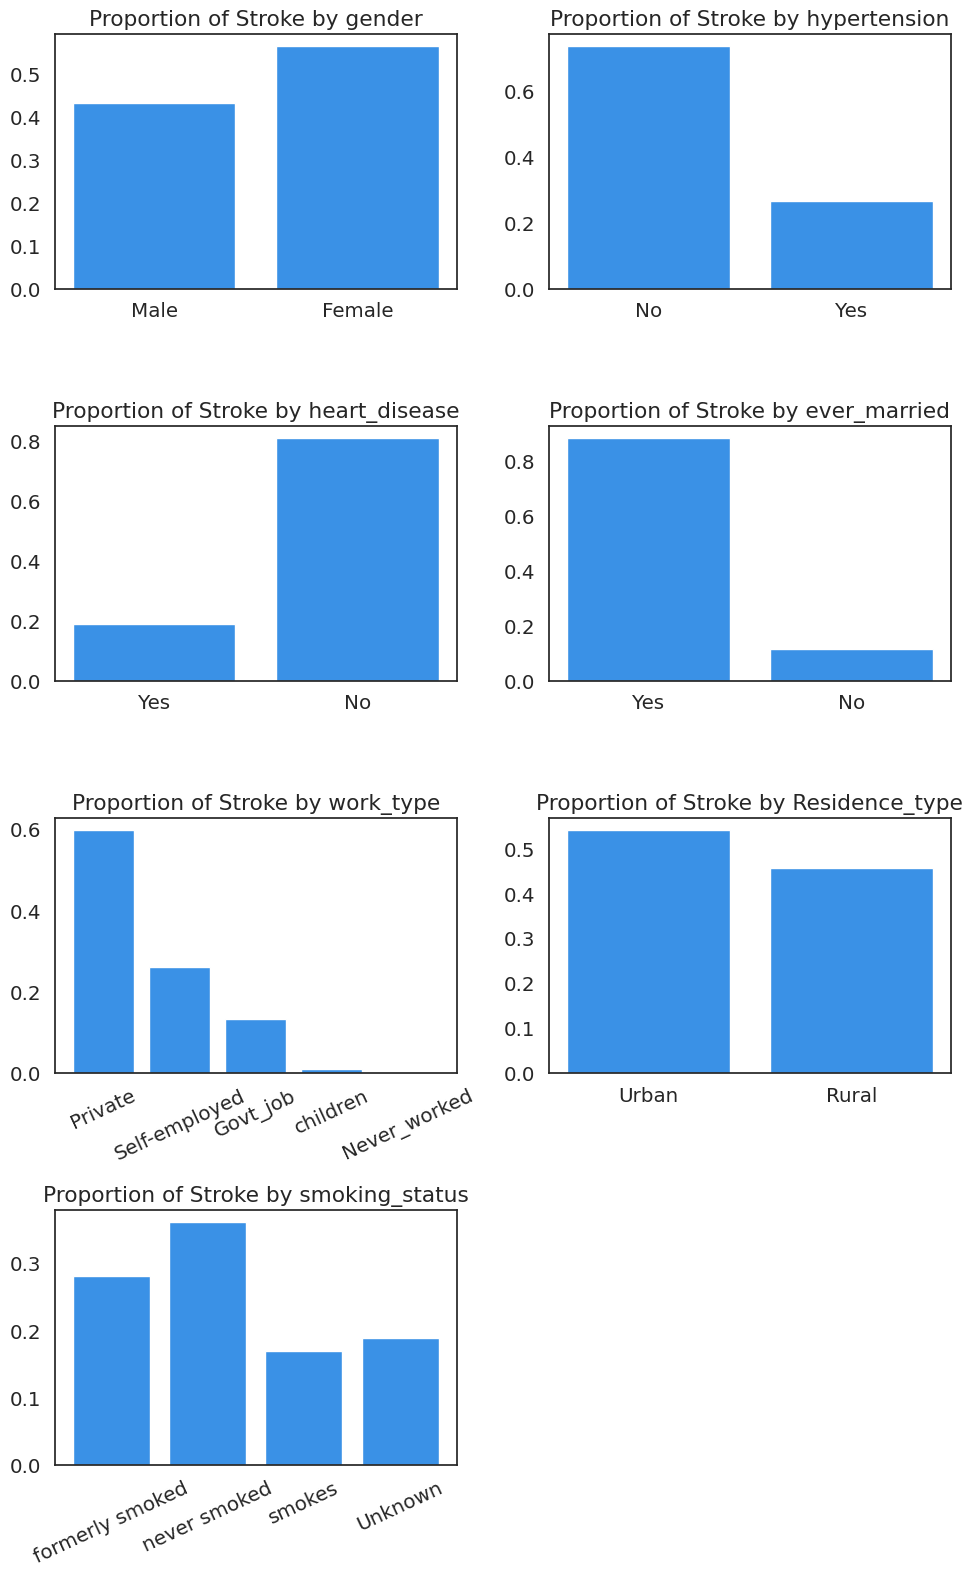

In [13]:
fig, p = plt.subplots(nrows=4, ncols=2, figsize=(10,16))
r=0
c=0
for i in catVars:
    bars, uniq = barList(data, f"{i}", target="stroke")    
    if i in ["hypertension", "heart_disease"]:
        uniq = ["Yes" if j == 1 else "No" for j in uniq]
    
    p[r,c].bar(
        uniq, 
        bars,
        color=["#3a91e6"]*len(bars)
    )
    p[r,c].set_title(f"Proportion of Stroke by {i}")
    p[r,c].set_ylabel("", fontsize=14)
    
    if len(uniq) > 2:
        p[r,c].set_xticklabels(uniq, rotation=25)
    if c == 1:
        c=0
        r+=1
    else:
        c+=1

plt.tight_layout(pad=1)
plt.delaxes(p[3,1])
plt.show()

<p style="font-size : 16px">The characteristics of the individual observations are rather heterogeneous in the data set. This can lead to problems in the correct classification for feature combinations that rarely exist.</p>

<font size="+1" color="grey"><b>3.4 Target Separated Dispersion Continous vs. Categorical </b></font><br><a id="3.4"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Now let's look at all the continuous variables divided by all the categorical ones and the target.</p>

In [14]:
def dispersions(cont: list, cat: list, target: str):
    sns.set_palette(sns.color_palette(["#3a91e6", "red"]))
    for co in cont:
        for ct in cat:
            l = (len(data["%s" % (ct)].unique()) - 2) * 2
            pp=sns.catplot(
                data=data, 
                x=ct, 
                y=co, 
                hue=target, 
                kind="box", 
                aspect=eval(f"1.{l}")
            )

            pp.fig.suptitle(
                "{} by {} and {}".format(co, ct, target), 
                fontsize=15
            )
            plt.show()

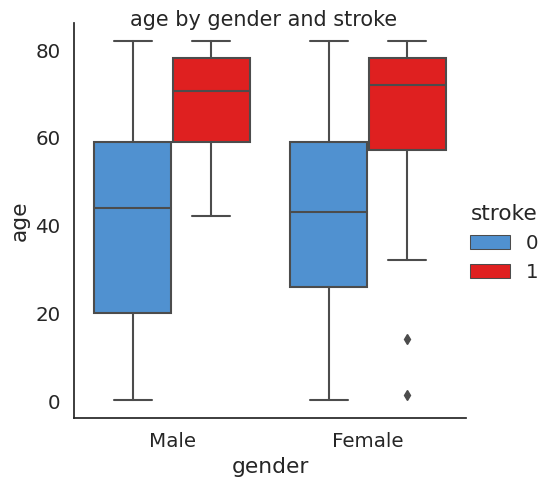

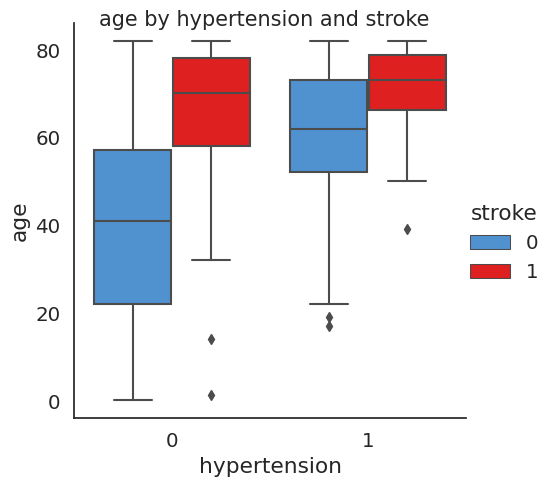

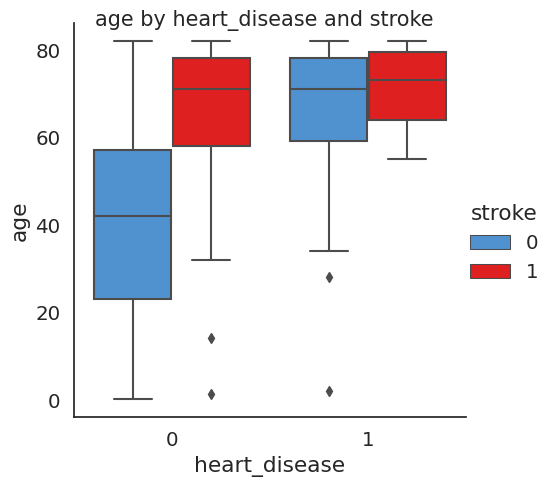

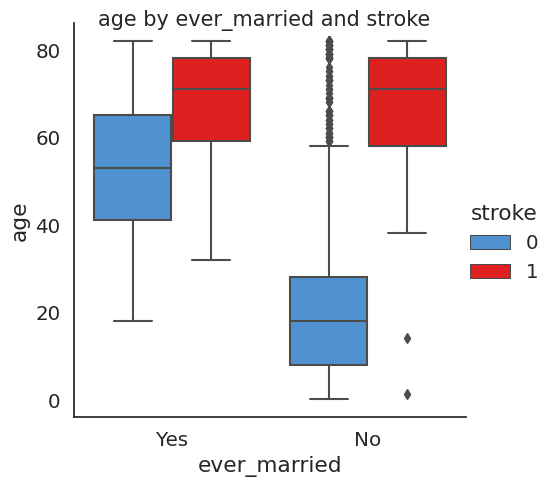

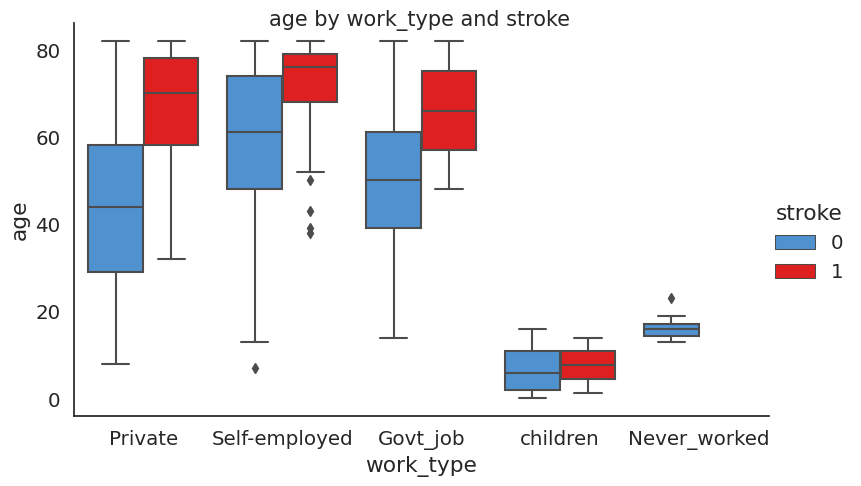

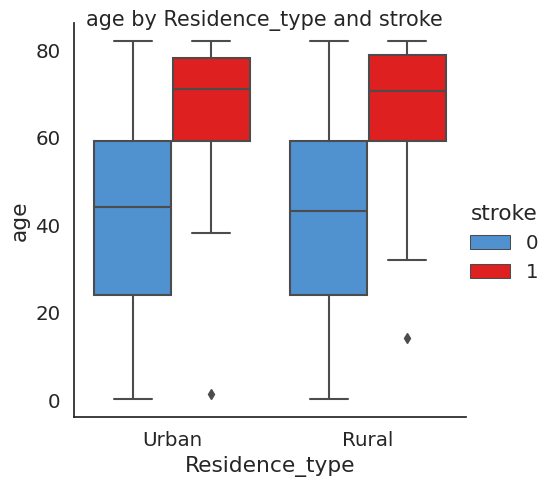

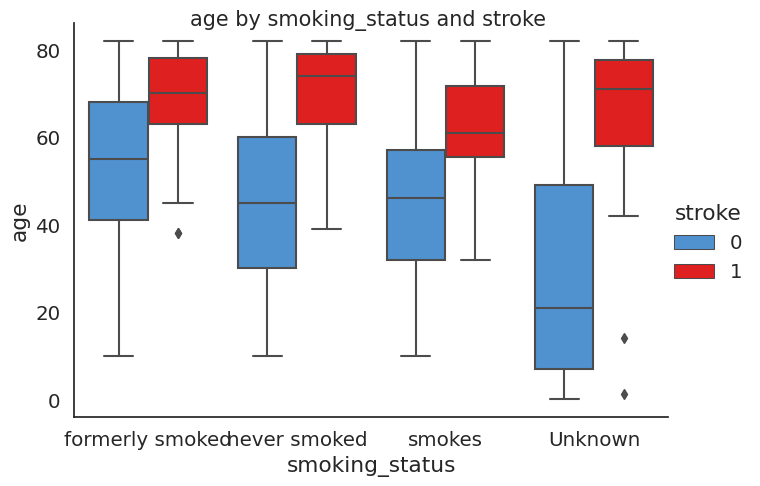

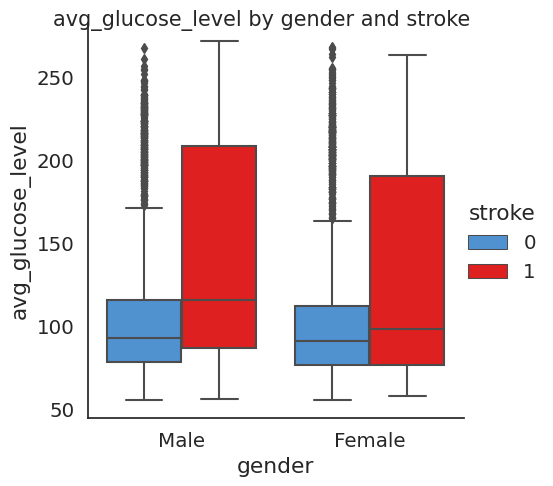

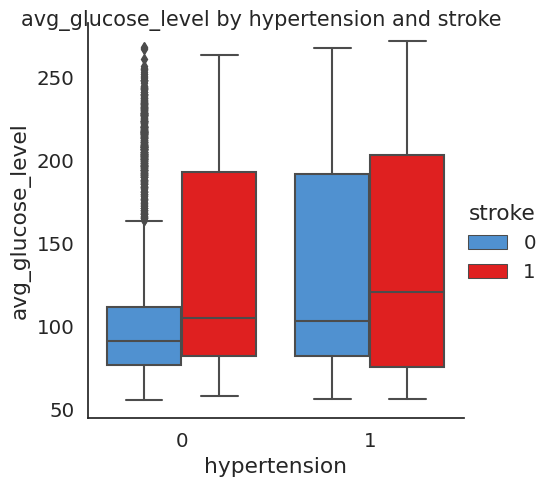

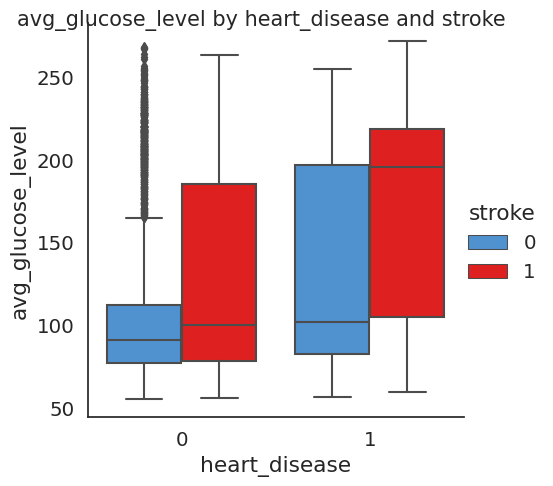

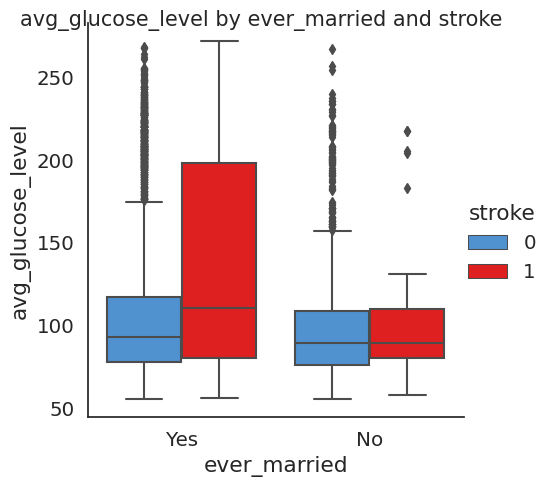

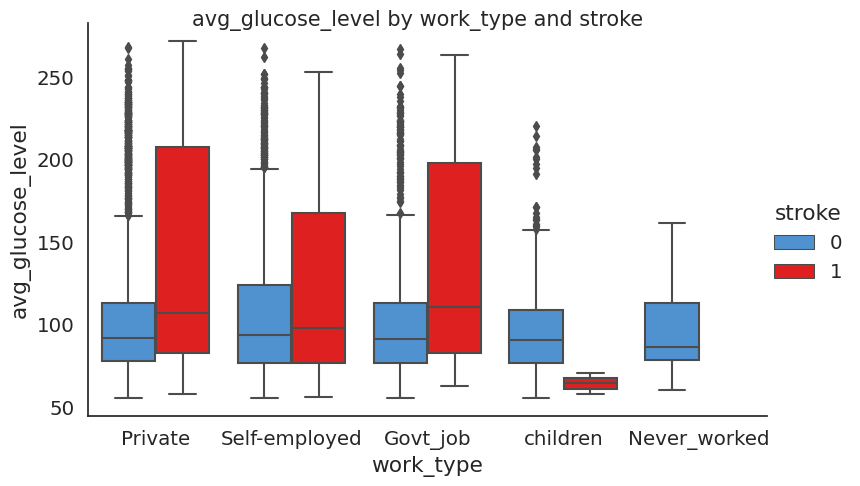

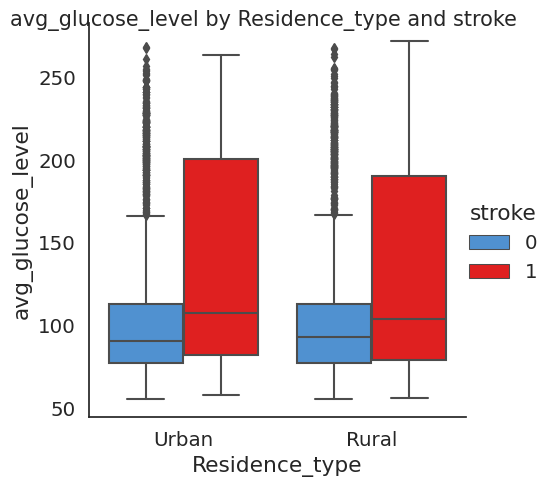

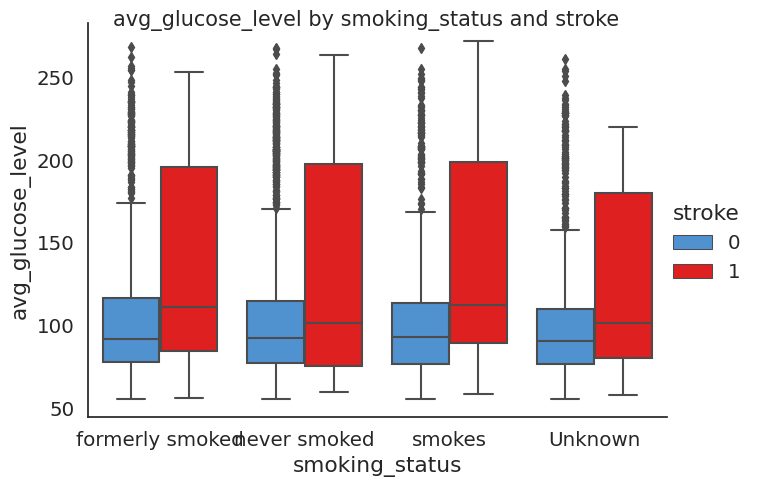

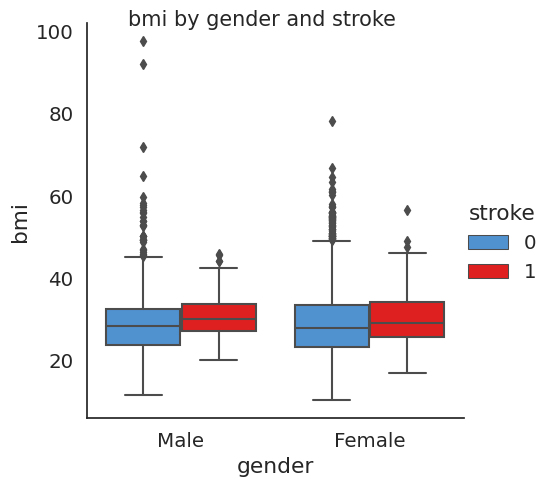

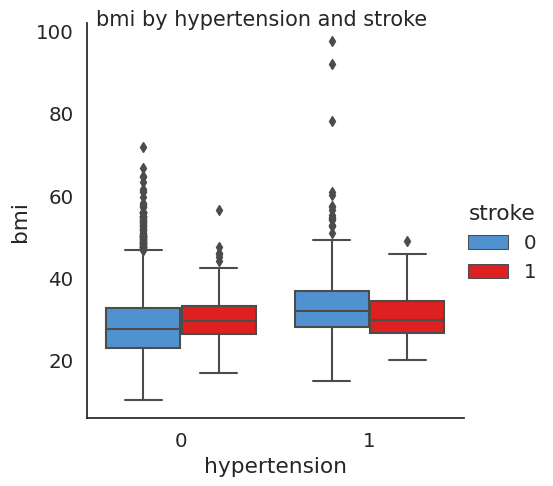

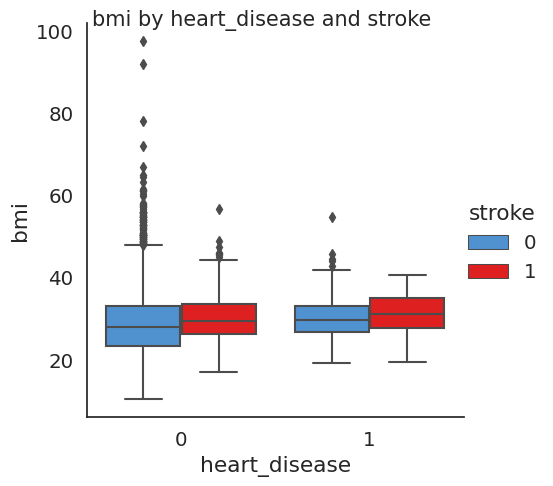

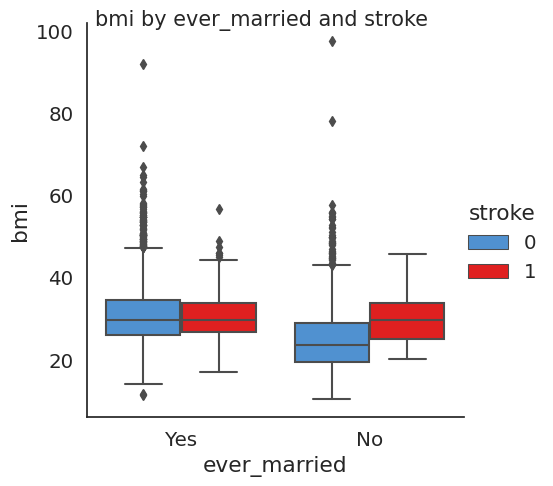

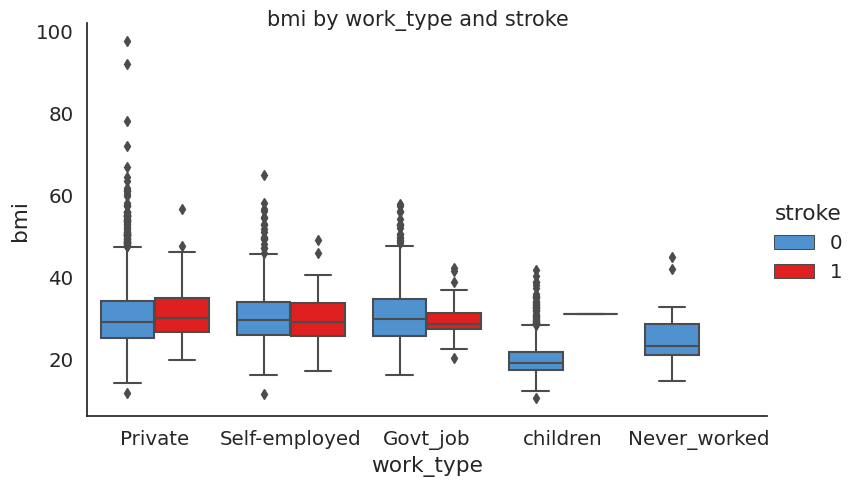

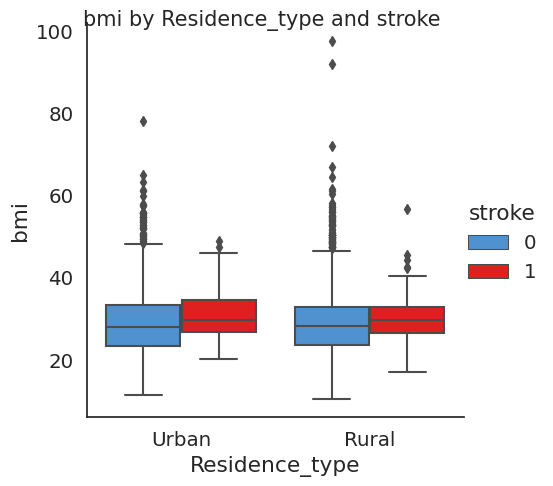

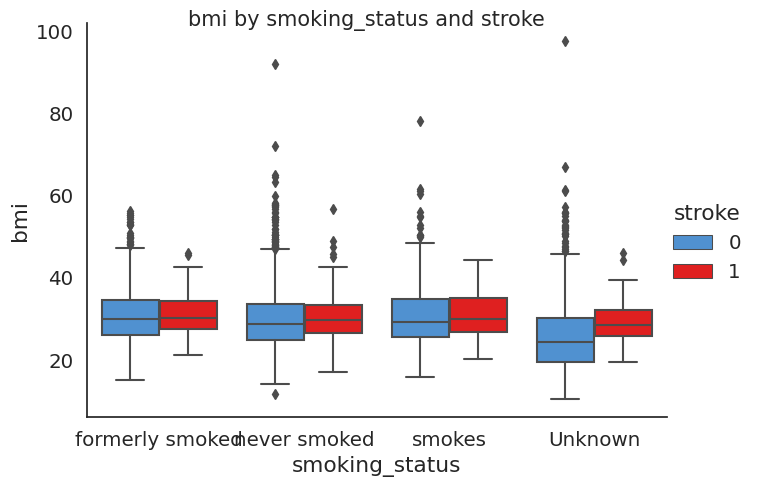

In [15]:
dispersions(contVars, catVars, "stroke")

<p style="font-size : 16px">The class "never worked" could be problematic, because there is no stroke at all. The models could perceive this information as a too strong argument against stroke. It is not really likely that people who have never worked do not get strokes. In addition, the information "never worked" is also causally related to age. </p>
    
<p style="font-size : 16px">It also seems that smokers have strokes at an younger age.</p>

<p style="font-size : 16px">Overall, most combinations show a strong difference between stroke or non-stroke. So. the chances for success of the endeavor are not bad at first glance.</p>

<font size="+3" color="grey"><b>4. Data Preparation </b></font><br><a id="4"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Often, statistical learning algorithms cannot be applied directly. Either data inadequacies must be eliminated or method-dependent requirements must be met.</p>

<font size="+1" color="grey"><b>4.1 Feature Engineering </b></font><br><a id="4.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">For many methods dummies must be created One_Hot. For this purpose we use the following function.</p>

In [16]:
 def dummies(df, feats: list, dropFirstAll=False) -> pd.DataFrame:
    """
    This function creates dummies from categorical features of type str.
    df=pd.DataFrame
    feats=list of feature names
    dropFirstAll=bool. If n-1 dummies for all features
    
    output: 
        Data Frame with dummies
    """
    df=df.copy()
    
    for f in feats:
        if len(df[f"{f}"].unique()) > 2:
            dropFirst = False
        else:
            dropFirst = True
            
        if dropFirstAll:
            dropFirst = True
            
        d = pd.get_dummies(df[f"{f}"], prefix=f, drop_first=dropFirst)
        df.drop(columns=[f], inplace=True)
        df[d.columns] = d
    return df

<p style="font-size : 16px">It was found that all models performed better with n-1 dummies.</p>

In [17]:
dataD = dummies(
    data, 
    ["gender", "work_type", "ever_married", "Residence_type", "smoking_status"],
    dropFirstAll=True
)
dataD.head(n=3)

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21   NaN       1   
2  80.0             0              1             105.92  32.5       1   

   gender_Male  work_type_Never_worked  work_type_Private  \
0            1                       0                  1   
1            0                       0                  0   
2            1                       0                  1   

   work_type_Self-employed  work_type_children  ever_married_Yes  \
0                        0                   0                 1   
1                        1                   0                 1   
2                        0                   0                 1   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0

<font size="+1" color="grey"><b>4.2 Cross Validation Strategy </b></font><br><a id="4.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">The model has to be balanced between too high prediction variance (overfitting) and too high prediction bias (underfitting). For this purpose, a 2-fold cross-validation is used. Why only two folds? This is mainly for performance reasons. The runtime of the code would go beyond the scope with more than two folds. However, two folds are adequate due to the relatively large data set. The advantage of a large validation data set in this case is that the evaluation metrics are very credible. With a large number of folds, on the other hand, the variance of the evaluation metrics could rise sharply in cross-comparison across the individual folds. In practice, a phenomenon often observed is that not only the training dataset but also the validation dataset is overfitted. This occurs because the hyperparameters are adjusted until the results meet the requirements. In Kaggle competitions, this phenomenon is called leadboard overfitting. To avoid falling into the same trap we will use two countermeasures.</p>

1. <p style="font-size : 16px">We frequently change the seed.</p>
2. <p style="font-size : 16px">We do not only use a training and validation dataset, but also keep a test dataset, on which no hyperparameters are tuned. This is only used at the very end of the final model to see how the model would react to unseen new data.</p>

In [18]:
test_holdout=0.985

CV_X, test_X, CV_y, test_y = train_test_split(
    dataD.drop(columns=["stroke"]), 
    dataD.stroke,
    train_size=test_holdout,
    random_state=seeds,
    shuffle=True,
    stratify=dataD.stroke
) 

dataD = pd.concat([CV_X, CV_y], axis=1)

In [19]:
X1, X2, y1, y2 = train_test_split(
    dataD.drop(columns=["stroke"]), 
    dataD.stroke,
    train_size=0.5,
    random_state=seeds,
    shuffle=True,
    stratify=dataD.stroke
) 

#folds for the crossvalidation grid search
folds=4

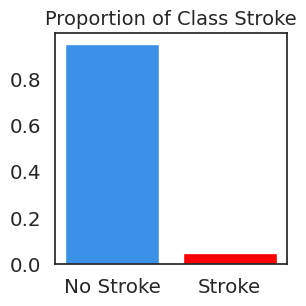

In [20]:
plt.figure(figsize=(3,3))
plt.title("Proportion of Class Stroke", fontsize = 14)
plt.bar(
    ["No Stroke", "Stroke"], 
    [1-y1.sum() / y1.shape[0], y1.sum() / y1.shape[0]],
    color=["#3a91e6", "red"]
)
plt.show()

<p style="font-size : 16px">As will be seen, the ratio of minority to majority class is so low that the algorithms predict few or even no strokes.</p>

<font size="+1" color="grey"><b>4.3 Imputation </b></font><br><a id="4.3"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Since, as shown in the analysis above, some BMI data are missing. Due to the minority class problem, it is probably a bigger issue to lose corresponding observations than to impute. To avoid data leakage, the target variable "strok" is omitted when imputing the missing BMI values.</p>

In [21]:
def bmiImputer(XOut, model):
    """
    Function to train imputer on training dataset and apply to another or the same one.
    """
    XOut=XOut.copy()
    
    model.fit(XOut)
    XOut[[i for i in XOut.columns if i != "stroke"]] = model.fit_transform(XOut)
    XOut["bmi"] = np.round(XOut.bmi.values, 1)
    XOut["bmi"] = XOut.bmi
    
    return XOut

In [22]:
imputer = KNNImputer(n_neighbors=10, weights="distance")
 
X1 = bmiImputer(X1,imputer)
X2 = bmiImputer(X2, imputer)
test_X = bmiImputer(test_X, imputer)

bmi = pd.concat([X1.bmi, X2.bmi, test_X.bmi])
data["bmi"] = bmi

<font size="+1" color="grey"><b>4.4 Synthetic Minority Oversampling TEchnique (SMOTE) </b></font><br><a id="4.4"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">This method connects the k-nearest neighbors by means of a linear straight line. Subtracting the initial vector <i>x<sub>1</sub></i> from the neighbor vector <i>x<sub>n</sub></i> yields the vector <i>x<sub>d</sub></i> that points from one in the direction of the other. This vector <i>x<sub>d</sub></i> is multiplied by a random number $ z \in [0,1] $ and added to <i>x<sub>1</sub></i> to obtain a new observation in the minority class cluster. [cf. Chawla et al, 2002, p. 329] </p>

$$ x_d = x_n - x_1 $$
$$ x_{synthetic} = x_1 + z \cdot x_d $$

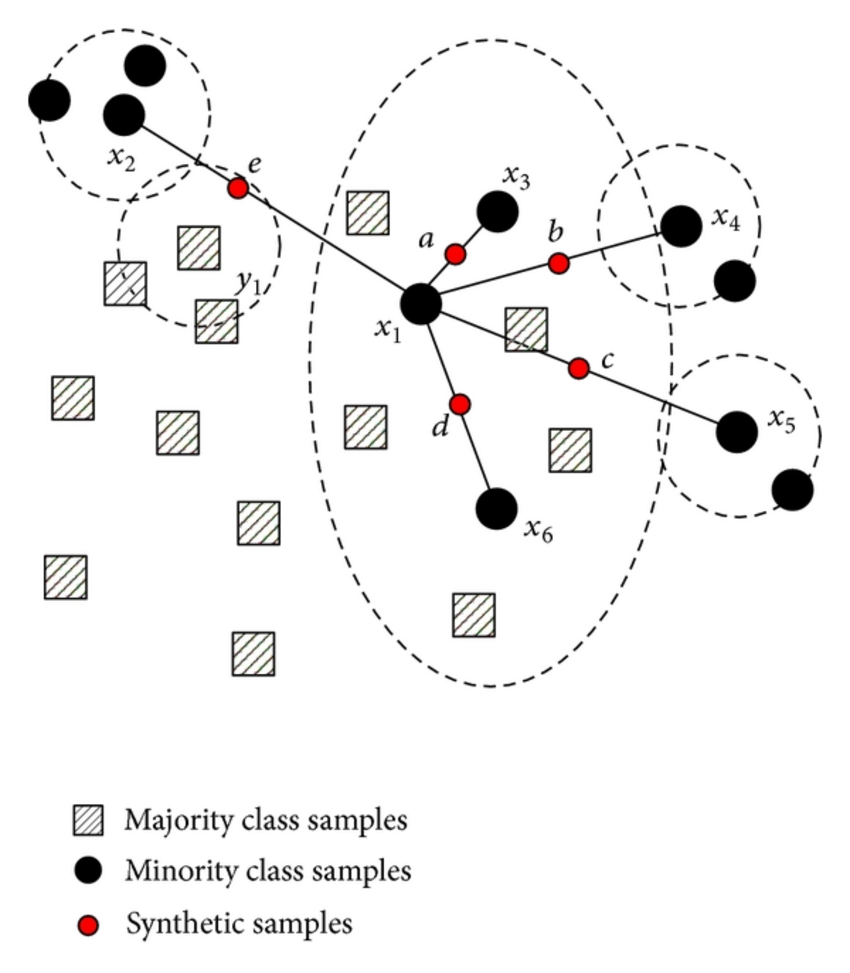<br>

<p style="font-size : 12px"> Image Source: A Novel Boundary Oversampling Algorithm Based on Neighborhood Rough Set Model: NRSBoundary-SMOTE, Mathematical Problems in Engineering 2013, Feng Hu, Hang Li, p. 3</p>

<p style="font-size : 16px"> We use only 2 nearest neighbor because, according to the visualizations shown above, there are many small clusters. If k is chosen too large, new observations may be formed even on very large distances, but they do not really represent the minority class - to be seen in the picture at the synthetic observation "e".</p>

In [23]:
SyntheticShare=1/3
neighbors=2

SMOTE = SMOTENC(
    k_neighbors=neighbors,
    random_state=seeds, 
    n_jobs=-1, 
    categorical_features=np.where([i not in contVars for i in X1.columns])[0],
    sampling_strategy=SyntheticShare
)
Xr1, yr1 = SMOTE.fit_resample(X1, y1)
Xr2, yr2 = SMOTE.fit_resample(X2, y2)

<p style="font-size : 16px">Synthetic observations should be used with care as they strongly influence the learning process. Therefore, we increase the minority class only to a ratio to the majority class of $ \frac{1}{3} $. </p>

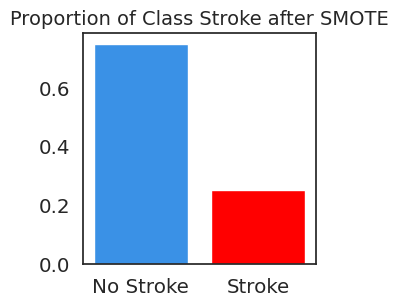

In [24]:
plt.figure(figsize=(3,3))
plt.title("Proportion of Class Stroke after SMOTE", fontsize = 14)
plt.bar(
    ["No Stroke", "Stroke"], 
    [1-yr1.sum() / yr1.shape[0], yr1.sum() / yr1.shape[0]],
    color=["#3a91e6", "red"]
)
plt.show()

<p style="font-size : 16px">Let's look at the initial scatterplots to see if the right places were filled.</p>

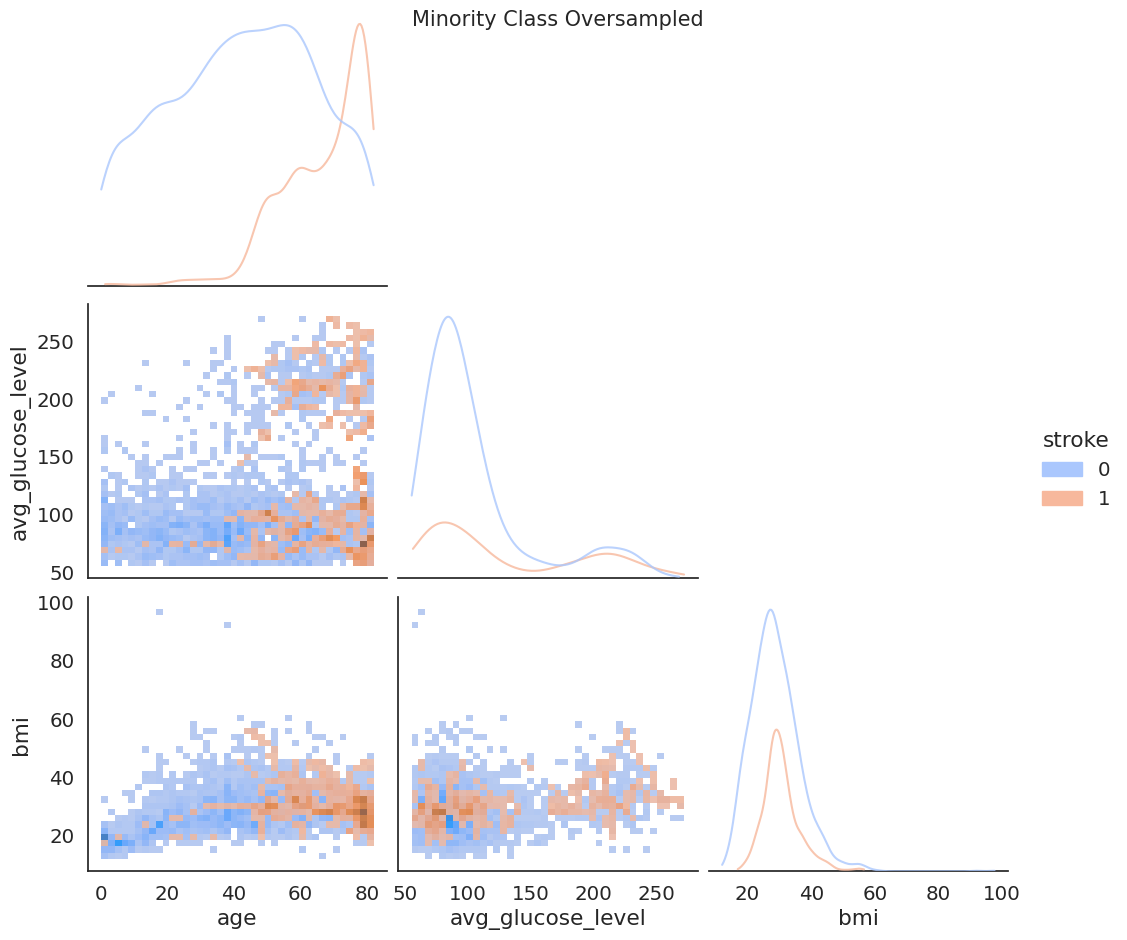

In [25]:
contVars.append("stroke")
corPlot(pd.concat([Xr1, yr1.astype(int)], axis=1)[contVars], "stroke", "Minority Class Oversampled")

<p style="font-size : 16px">Obviously, the red observations - already shown above - are now much more densely represented.</p>

In [26]:
contVars.pop(-1)

'stroke'

In [27]:
plot3d(
    pd.concat([Xr1, yr1.astype(int)], axis=1), 
    ["#3a91e6", "red"], "stroke",
    "age", "avg_glucose_level", "bmi", 
    "3D Plot of Age, Average Glucose Level, and BMI (SMOTE)"
)

<p style="font-size : 16px">The shape of the stroke = 1 cluster has not changed globally. Locally, however, serpentine patterns are now visible, which result from the filling of the space between neighboring observations presented above. To select the stroke class, just double-click on the corresponding class in the legend.</p>

<font size="+3" color="grey"><b>5. Modeling & Evaluation </b></font><br><a id="5"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">For training purpose, we use:</p>

<p style="font-size : 16px">1. Support Vector Machines. sklearn</p>
<p style="font-size : 16px">2. K-Nearest Neighbors. sklearn</p>
<p style="font-size : 16px">3. Random Forest. sklearn</p>
<p style="font-size : 16px">4. Naive Bayes Classifier. sklearn</p>
<p style="font-size : 16px">5. Logistic Regression. sklearn</p>
<p style="font-size : 16px">6. Categorical Boosting. Yandex</p>

<p style="font-size : 16px">Each algorithm is first tuned via a grid search using cross-validation. The GridSearchCV method separates the provided training dataset into k-folds and evaluates the performance for each combination of hyperparameters using k cross-validations. Once the best hyperparameter combination is found, the model is trained again with the entire training data set. Therefore, it has to be ensured that the option "refit" is not set to False. Subsequently, we will measure the performance of the best resulting hyperparameters of the corresponding model against the validation dataset. For this purpose, a confusion matrix is determined at a cut-off of 50 %. However, since the accuracy depends on this cut-off, the area under the receiver operating characteristic (ROC) curve AUC is also determined. In addition, we show where the cut-off of 50% is located on the ROC curve. If the ROC curve is very flat at the beginning and steeper later on, it might be that no strokes are predicted even if the cut-off criterion is small. In this case, it would not be sufficient to look only at the AUC, since it can be large regardless of the shape of the ROC.</p>

<p style="font-size : 16px">How do we decide if a model meets our requirements? This question is difficult to answer, because there are only two cases in which the answer would be clear - if the model does not classify anything correctly or if the model classifies everything correctly. Everything in between is discretionary. We are dealing with a minority problem in this case. Therefore, one could say that it is enough to be better than the share of the majority class. However, there are also reasons that can speak against it. Let us imagine a model that would be able to predict the time of severe volcanic eruptions. The dataset used for this would definitely have a minority class problem, too. However, one would never choose a model that is simply good because it has a high accuracy, since it does not predict any eruptions at all. One would probably rather choose a model that detects at least some volcanic eruptions at the expense of the accuracy. We will handle it similarly in this case. Because it is better to detect at least a few strokes rather than none at all.</p> 

<p style="font-size : 16px">Nevertheless, to define a target; we are talking about a credible model if we would manage to exceed an AUC of 80% where the ROC curve has a shape that rises steeply right at the beginning. If this is the case, it is probably possible to increase the cut-off criterion and even increase the accuracy.</p> 

<font size="+1" color="grey"><b>5.1 Support Vector Machines (SVM) </b></font><br><a id="5.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

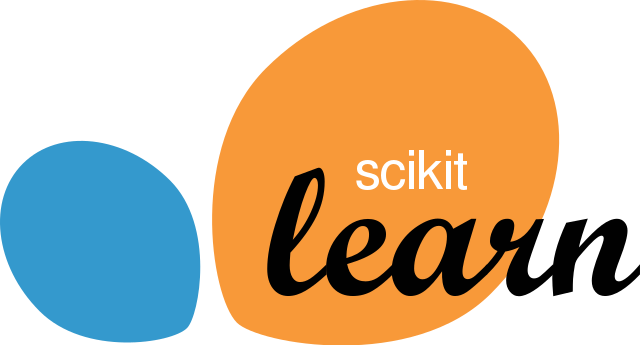<br><br><br><br>

<p style="font-size : 16px">Support Vector Machines have been developed for binary classification.<sup>2</sup> The computational complexity<sup>3</sup> for learning is approximately (depends also on the kernel)</p>
    
$$ O(n^2v+n^3) $$
<p style="font-size : 16px">and for prediction </p><br>
$$ O(sv\cdot v) $$

<p style="font-size : 16px">with n = # observations; v = # features; sv = # support vectors</p>

<p style="font-size : 16px">First we use the original data to assess the model performance. Afterwards, we look at the example of support vector machines to see whether synthetic oversampling leads to better performance or not.</p>

2 https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

3 https://www.thekerneltrip.com/machine/learning/computational-complexity-learning-algorithms/

In [28]:
SVM = make_pipeline(
    StandardScaler(),
    SVC(probability=True, random_state=seeds, kernel="rbf")
)

param_grid = {
    'svc__C': [0.1 ,1, 10, 50],
    'svc__gamma': [0.0001, 0.001, 0.01]
}

<p style="font-size : 16px">During the study, it became apparent that winsorizing leads to more plausible results than excluding outliers from training data. When winsorizing, outliers are set to a certain value, in this case to 56.6 which is the highest BMI of the stroke cases. Since the outliers in the BMI range do not include any cases of stroke, ignoring the outliers creates problems with the learned model hypothesis resulting from the training process.</p>

In [29]:
def CrossVal(model, grid, X: list, y: list, WisorBMI=56.6, **kwargs):
    """
    Function to perform a cross validation wit a grid search.
    We use winsorizing for bmi > 56.6. Default=56.6 is highest BMI stroke case.
    """
    for i in [0,1]:
        val = X[i]
        val["bmi"] = val.bmi.map(lambda x: WisorBMI if x > WisorBMI else x)
        globals()[f"grid{i+1}"] = GridSearchCV(model, grid, n_jobs=-1, cv=folds, scoring="roc_auc")
        eval(f"grid{i+1}").fit(val, y[i], **kwargs)

In [30]:
CrossVal(SVM, param_grid, [X1[contVars], X2[contVars]], [y1, y2])

In [31]:
def makeModelAndPred(g: list, m: str, X: list):
    """
    This function uses the best estimator from grid search to predict on validation set.
    """
    for i in [0,1]:
        globals()[f"best_params_model{m}{i+1}"] = g[i].best_params_
        globals()[f"model{m}{i+1}"] = g[i].best_estimator_
        globals()[f"y_hat{i+1}"] = eval(f"model{m}{i+1}").predict(X[i])
        
    return globals()[f"best_params_model{m}1"], globals()[f"best_params_model{m}2"]

<p style="font-size : 16px">Below we look at the hyperparameters resulting from the grid search.</p>

In [32]:
makeModelAndPred([grid1, grid2], "SVM", [X2[contVars], X1[contVars]])

({'svc__C': 50, 'svc__gamma': 0.01}, {'svc__C': 10, 'svc__gamma': 0.01})

<font size="+1" color="grey"><b>5.1.1 Evaluation without SMOTE </b></font><br><a id="5.1.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

In [33]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2393
           1       0.00      0.00      0.00       123

    accuracy                           0.95      2516
   macro avg       0.48      0.50      0.49      2516
weighted avg       0.90      0.95      0.93      2516

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2394
           1       0.00      0.00      0.00       122

    accuracy                           0.95      2516
   macro avg       0.48      0.50      0.49      2516
weighted avg       0.91      0.95      0.93      2516



In [34]:
def confMat(df, y: list, preds: list, target: str):
    """
    Function to print confusion matrix. 
    The matrix corresponds to a cut-off criterion of 50%. 
    This statement must be relativised for methods such as support vector machines, 
    since a hyperplane is used here and not a probability.
    """
    fig, p = plt.subplots(nrows=1, ncols=2, figsize=(7,8))
    for i in [0,1]:
        mat = confusion_matrix(y[i], preds[i])
        sns.heatmap(
            mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=np.sort(df[f"{target}"].unique()),
            yticklabels=np.sort(df[f"{target}"].unique()),
            cmap="coolwarm",
            ax=p[i]
        )
        p[i].set_xlabel('true label')
        p[i].set_ylabel('predicted label')
        p[i].set_title(f'Confusion Matrix Fold {i+1}')
    plt.tight_layout(pad=1)
    plt.show()

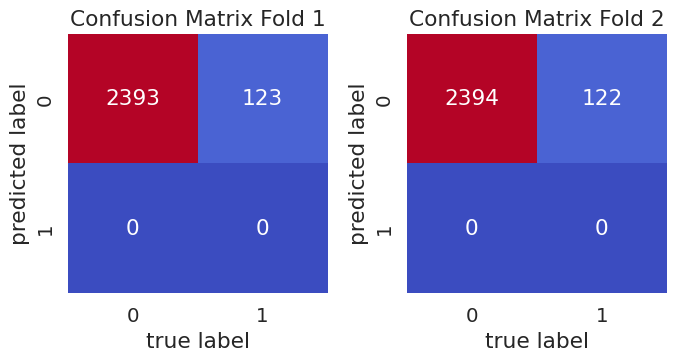

In [35]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

<p style="font-size : 16px">Support vector machines are not probabilistic models. They merely separate two classes with a hyperplane. The determination of probabilities is carried out in a distance-oriented manner in retrospect. However, since this is possible, it makes sense to increase the classification performance by adjusting the cut-off criterion based on probability. Therefore, it is worth taking a closer look. The receiver operating characteristic curve is the most important evaluation tool, as we want to determine a probability/risk very accurately.</p>

In [36]:
def roc(yt: list, ph: list, title: str, di=False, cut=0.5):
    """
    Function for calculating the receiver operating characteristic curve. 
    In addition, the point that lies at a cut-off criterion of 50% is marked to make comparison easier. 
    
    Output: List of AUCs by fold, list of standard deviation of the prediction errors by fold
    """
    
    fig, p = plt.subplots(nrows=1, ncols=2, figsize=(16,7))
    
    auc=[]
    s=[]
    
    for i in [0,1]:
        fpr, tpr, thresholds = roc_curve(yt[i], ph[i], drop_intermediate=di)
        p[i].plot([0, 1], [0, 1], 'k--')
        p[i].plot(fpr, tpr)
        cutOff = np.where(np.min((thresholds - cut)**2) == (thresholds - cut)**2)[0][0]
        p[i].plot([fpr[cutOff], fpr[cutOff]], [0,1], "darkred")
        p[i].text(fpr[cutOff]+0.01, 0, s=f"cutoff {cut*100}%", c="darkred")
        p[i].set_xlabel("False Positive Rate")
        p[i].set_ylabel("True Positive Rate")
        
        auc.append(roc_auc_score(yt[i], ph[i]))
        p[i].set_title("ROC Curve for {} with AUC of {}% for Fold {}".format(
            title, 
            round(auc[i]*100, 1),
            i+1
            )
        )
        
        s.append(np.std(yt[i] - ph[i]))
        
    auc.append(f"{title}")
    s.append(f"{title}")
    plt.show()   
    
    return auc, s

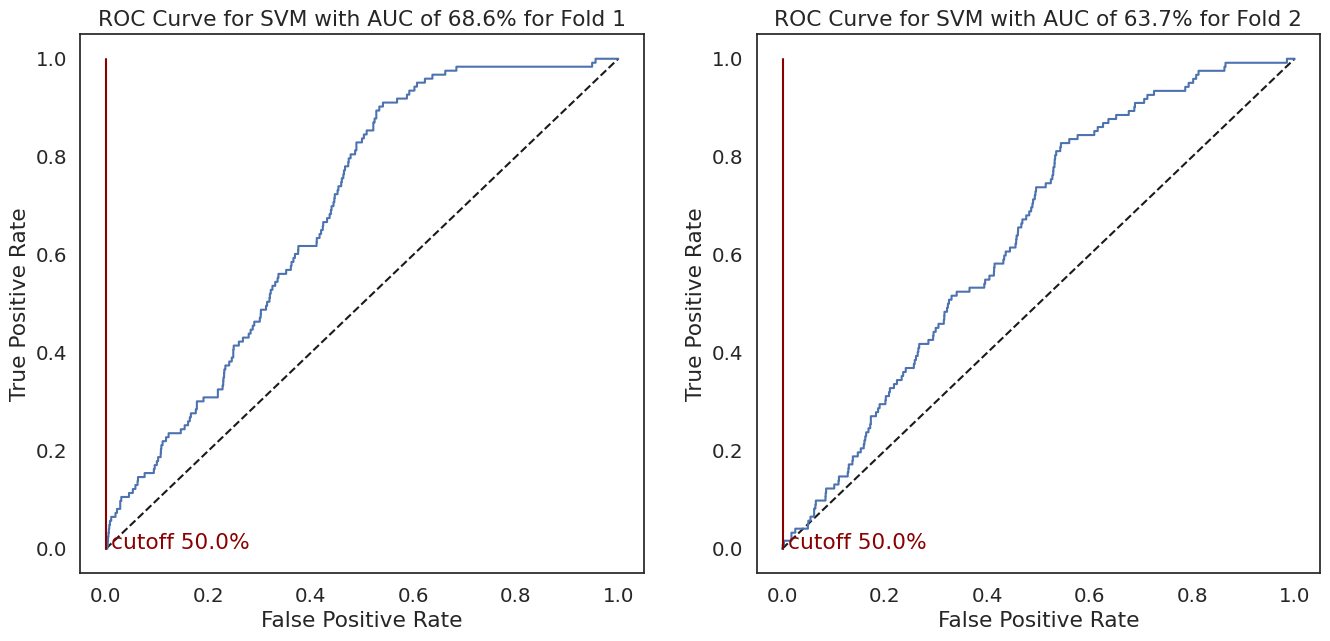

In [37]:
aucSVM, std_SVM = roc(
    [y2, y1], 
    [modelSVM1.predict_proba(X2[contVars])[:, 1], modelSVM2.predict_proba(X1[contVars])[:, 1]], 
    "SVM"
)

<p style="font-size : 16px">Fold one doesn't really work, but fold two works better. Lowering the cut-off criterion would not help much with fold 1.</p>

<font size="+1" color="grey"><b>5.1.2 Evaluation Using SMOTE </b></font><br><a id="5.1.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Now we test with the oversampled dataset.</p>

In [38]:
CrossVal(SVM, param_grid, [Xr1[contVars], Xr2[contVars]], [yr1, yr2])

In [39]:
makeModelAndPred([grid1, grid2], "SVM", [X2[contVars], X1[contVars]])

({'svc__C': 10, 'svc__gamma': 0.01}, {'svc__C': 50, 'svc__gamma': 0.01})

In [40]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2393
           1       0.20      0.23      0.21       123

    accuracy                           0.92      2516
   macro avg       0.58      0.59      0.58      2516
weighted avg       0.92      0.92      0.92      2516

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      2394
           1       0.19      0.52      0.28       122

    accuracy                           0.87      2516
   macro avg       0.58      0.70      0.60      2516
weighted avg       0.94      0.87      0.89      2516



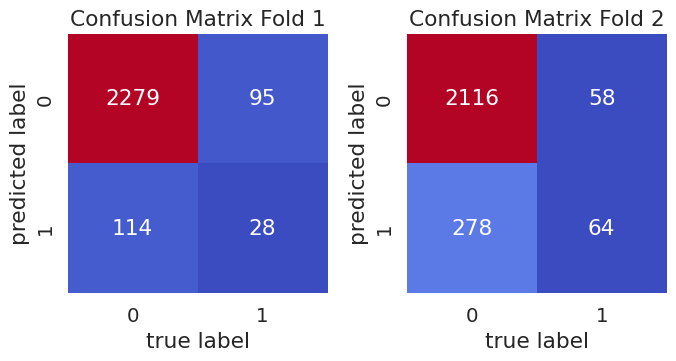

In [41]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

<p style="font-size : 16px">The additional synthetic observations significantly improve the classification performance.</p>

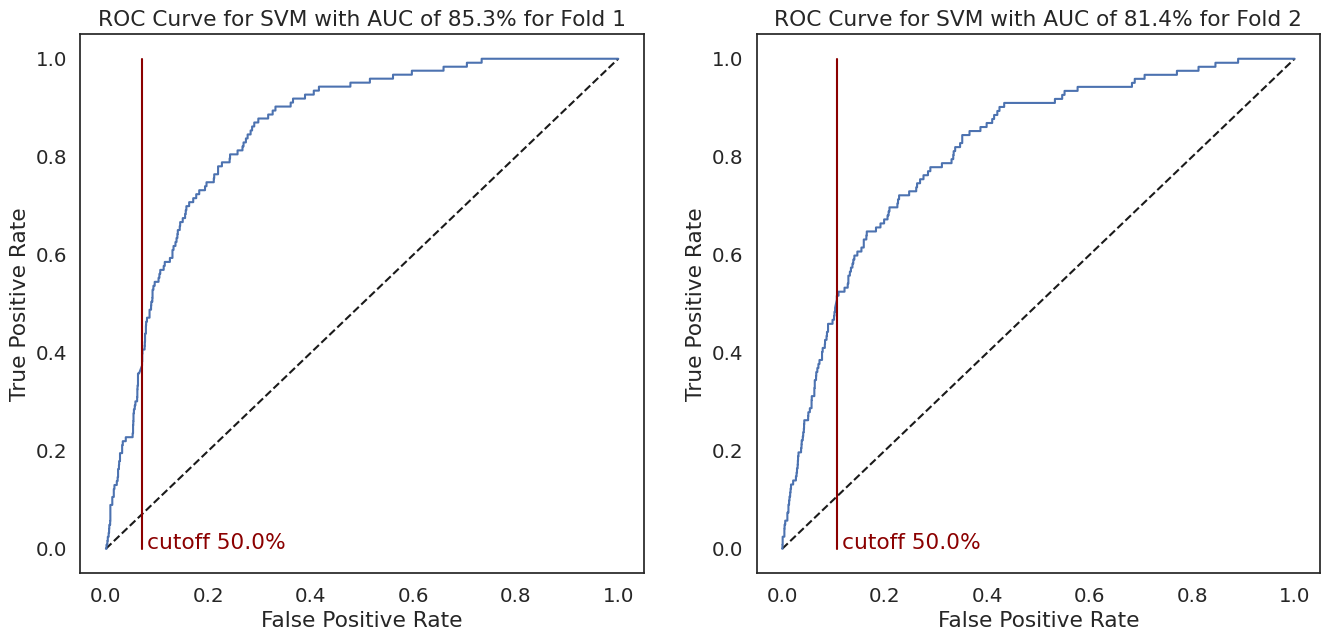

In [42]:
aucSVM, std_SVM = roc(
    [y2, y1], 
    [modelSVM1.predict_proba(X2[contVars])[:, 1], modelSVM2.predict_proba(X1[contVars])[:, 1]], 
    "SVM"
)

<p style="font-size : 16px">SMOTE creates a much more powerful overall performance profile. <b>From now on, we will use SMOTE directly for all subsequent models.</b></p>
    
<p style="font-size : 16px">For the implementation, we need the learned model hypotheses to make them available in the app. Therefore, we save them on disc first and transfer them into a cloud storage later.</p>

In [43]:
def save(m: list, name: str):
    """
    Function to save the learned hypothesis in working directory for implementation purpose.
    """
    for i, M in enumerate(m):
        hyp = f"{name}{i+1}.pkl"
        joblib.dump(M, hyp)

In [44]:
save([modelSVM1, modelSVM2], "svm")

<font size="+1" color="grey"><b>5.2 k Nearest Neighbors (kNN) </b></font><br><a id="5.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

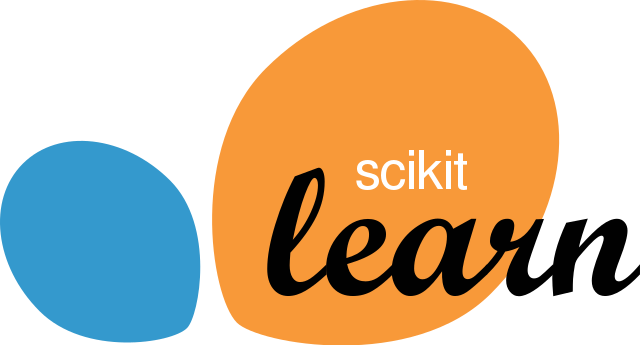<br><br><br><br>

<p style="font-size : 16px">KNN can theoretically be used natively for any number of classes. The computational complexity is not present for training, as the validation/test observations are simply inserted directly into the training dataset. Therefore, the computational complexity for testing is: </p>

$$ O(nv) $$

In [45]:
KNN = make_pipeline(
    StandardScaler(),
    knn()
)

param_grid = {
    'kneighborsclassifier__n_neighbors': [5, 10, 50, 100, 200],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

In [46]:
CrossVal(KNN, param_grid, [Xr1[contVars], Xr2[contVars]], [yr1, yr2])

In [47]:
makeModelAndPred([grid1, grid2], "KNN", [X2[contVars], X1[contVars]])

({'kneighborsclassifier__n_neighbors': 10,
  'kneighborsclassifier__weights': 'distance'},
 {'kneighborsclassifier__n_neighbors': 10,
  'kneighborsclassifier__weights': 'distance'})

In [48]:
save([modelKNN1, modelKNN2], "knn")

In [49]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2393
           1       0.14      0.38      0.20       123

    accuracy                           0.85      2516
   macro avg       0.55      0.63      0.56      2516
weighted avg       0.92      0.85      0.88      2516

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2394
           1       0.15      0.42      0.22       122

    accuracy                           0.85      2516
   macro avg       0.56      0.65      0.57      2516
weighted avg       0.93      0.85      0.89      2516



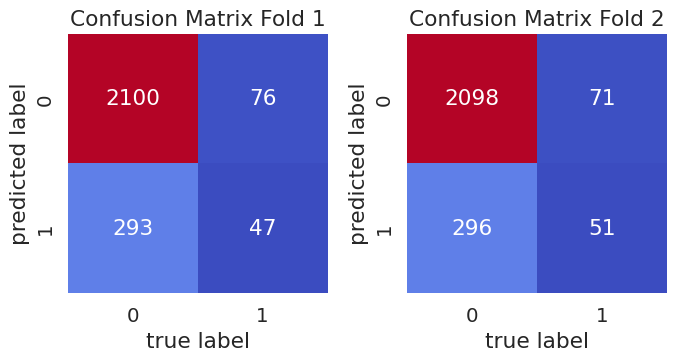

In [50]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

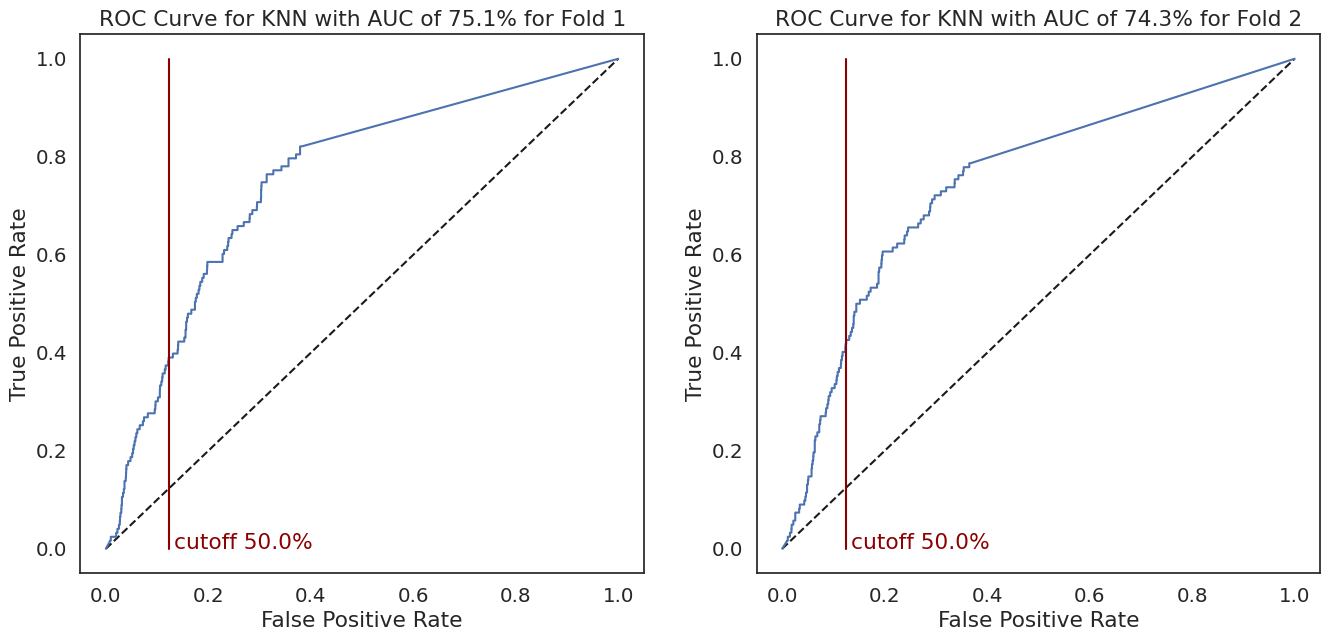

In [51]:
aucKNN, std_KNN = roc(
    [y2, y1], 
    [modelKNN1.predict_proba(X2[contVars])[:, 1], modelKNN2.predict_proba(X1[contVars])[:, 1]], 
    "KNN"
)

<font size="+1" color="grey"><b>5.3 Random Forest (RF)</b></font><br><a id="5.3"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

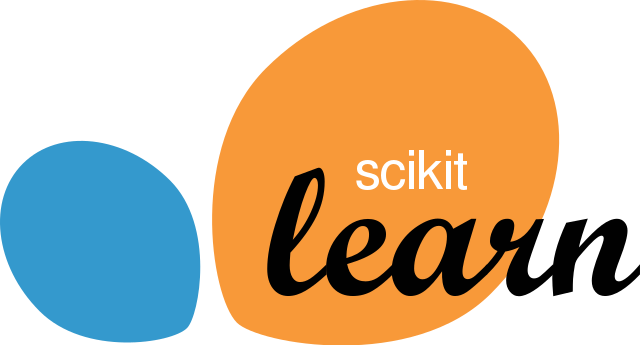<br><br><br><br>

<p style="font-size : 16px">Random forests usually consist of classification and regression trees (CART) [see. Breiman 2001 pp. 10-11]. A single CART tends to overfit. When many CARTs are combined into a forest, the ensemble can contain much more information compared to a single tree. However, the ensemble does not necessarily perform better than a single tree as long as the correlation between the individual trees is very high. To lower the correlation, both observations and features are randomly sampled per tree. The computational complexity is approximately:</p>

$$ O(n^2\sqrt{v\cdot trees}) $$
<p style="font-size : 16px"> for learning and </p><br>
$$ O(v\cdot trees) $$ 
<p style="font-size : 16px">for application.</p>

<p style="font-size : 16px">With trees = # trees </p>

In [52]:
RF = RandomForestClassifier(random_state=seeds)

param_gridRF = {
    'n_estimators': [150, 180],
    'max_depth': [15, 18, 20],
    'max_features': [0.6, 0.75, 0.9],
    'max_samples': [0.6, 0.75, 0.9],
    'min_samples_leaf': [1, 2],
    'ccp_alpha': [0, 0.0001]#Pruning
}

In [53]:
CrossVal(RF, param_gridRF, [Xr1, Xr2], [yr1, yr2])

In [54]:
makeModelAndPred([grid1, grid2], "RF", [X2, X1])

({'ccp_alpha': 0,
  'max_depth': 20,
  'max_features': 0.6,
  'max_samples': 0.9,
  'min_samples_leaf': 1,
  'n_estimators': 180},
 {'ccp_alpha': 0,
  'max_depth': 20,
  'max_features': 0.6,
  'max_samples': 0.9,
  'min_samples_leaf': 1,
  'n_estimators': 180})

In [55]:
save([modelRF1, modelRF2], "rf")

In [56]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2393
           1       0.21      0.18      0.19       123

    accuracy                           0.93      2516
   macro avg       0.58      0.57      0.58      2516
weighted avg       0.92      0.93      0.92      2516

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2394
           1       0.18      0.23      0.20       122

    accuracy                           0.91      2516
   macro avg       0.57      0.59      0.58      2516
weighted avg       0.92      0.91      0.92      2516



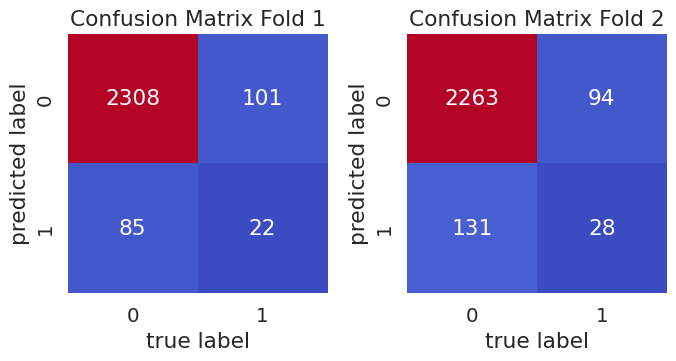

In [57]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

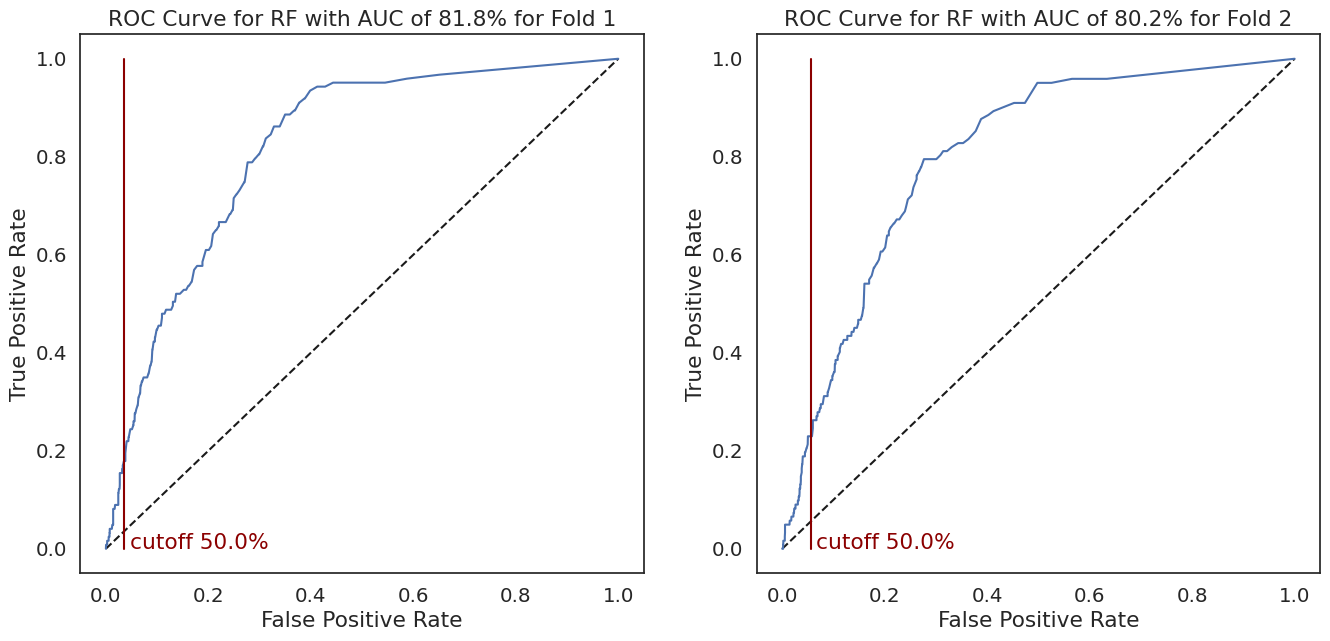

In [58]:
aucRF, std_RF = roc(
    [y2, y1], 
    [modelRF1.predict_proba(X2)[:, 1], modelRF2.predict_proba(X1)[:, 1]], 
    "RF"
)

<font size="+1" color="grey"><b>5.4 Naive Bayes Classifier (NBC)</b></font><br><a id="5.4"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

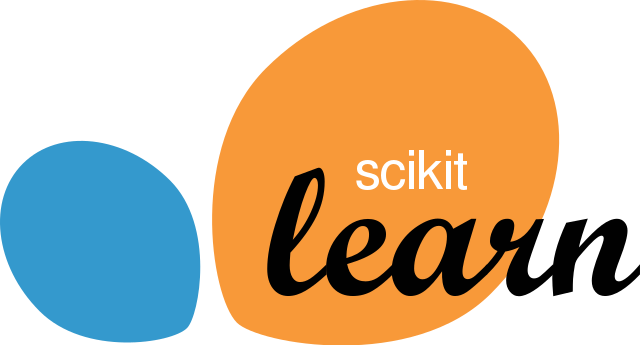<br><br><br><br>

<p style="font-size : 16px">The Naive Bayes classifier requires conditional independence by assumption. But in the case of a slight violation of the independence assumption the classifier performs well [see. Domingos, Pazzani, 1997, pp. 103–130]. The computational complexity is </p>
    
$$ O(nv) $$
<p style="font-size : 16px">for learning and </p><br>
$$ O(p) $$
<p style="font-size : 16px">for application.</p> 

In [59]:
NBC = make_pipeline(
    StandardScaler(),
    GaussianNB()
)

param_grid = {
    'gaussiannb__var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07]
}

In [60]:
CrossVal(NBC, param_grid, [Xr1[contVars], Xr2[contVars]], [yr1, yr2])

In [61]:
makeModelAndPred([grid1, grid2], "NBC", [X2[contVars], X1[contVars]])

({'gaussiannb__var_smoothing': 1e-10}, {'gaussiannb__var_smoothing': 1e-10})

In [62]:
save([modelNBC1, modelNBC2], "nbc")

In [63]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2393
           1       0.16      0.54      0.25       123

    accuracy                           0.84      2516
   macro avg       0.57      0.70      0.58      2516
weighted avg       0.93      0.84      0.88      2516

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2394
           1       0.15      0.57      0.23       122

    accuracy                           0.82      2516
   macro avg       0.56      0.70      0.57      2516
weighted avg       0.93      0.82      0.86      2516



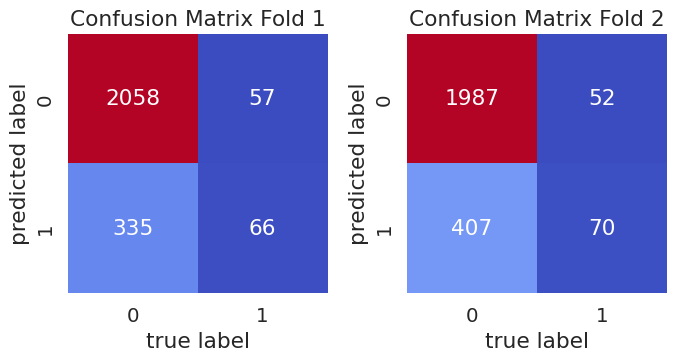

In [64]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

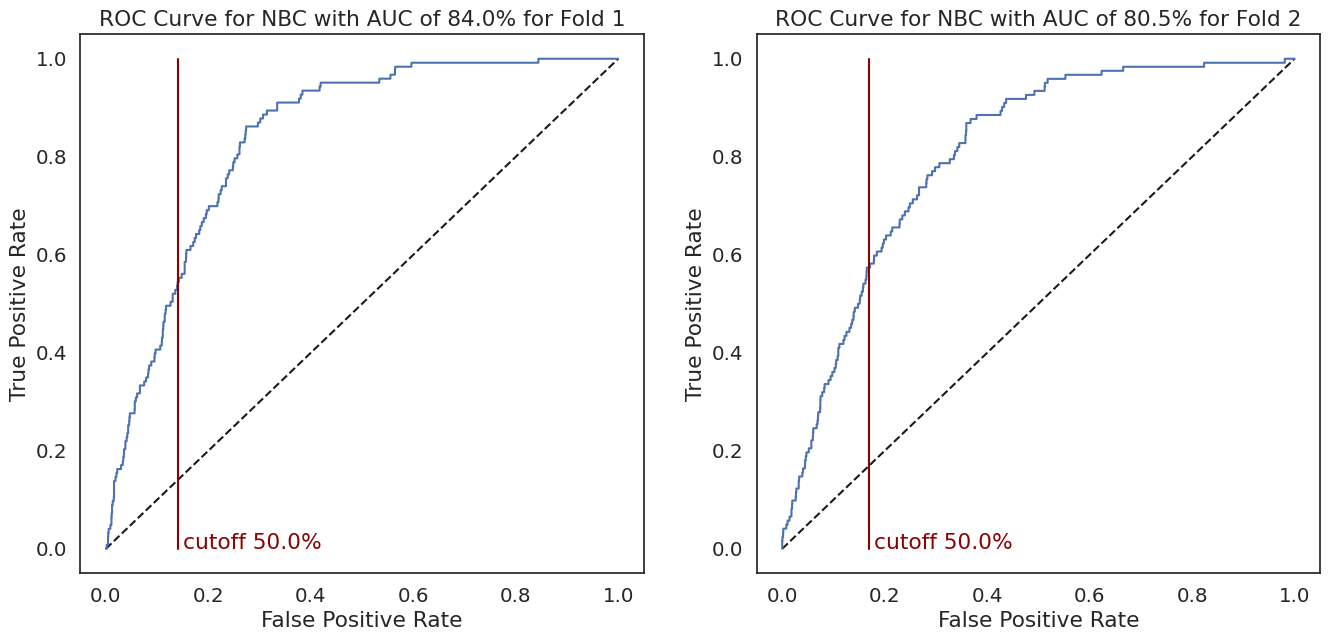

In [65]:
aucNBC, std_NBC = roc(
    [y2, y1], 
    [modelNBC1.predict_proba(X2[contVars])[:, 1], modelNBC2.predict_proba(X1[contVars])[:, 1]], 
    "NBC"
)

<font size="+1" color="grey"><b>5.5 Logistic Regression (Logit)</b></font><br><a id="5.5"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

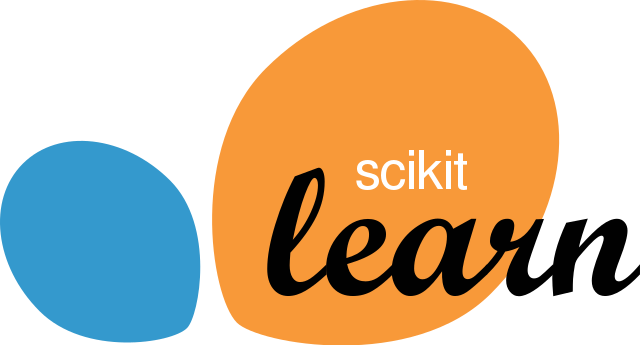<br><br><br><br>

<p style="font-size : 16px">In Logistic Regression, a threshold is used to turn it into a classifier. The optimization is based on a log likelihood function that is optimized iteratively. The computational complexity<sup>4</sup> is for the learning</p>

$$ O(nv) $$

<p style="font-size : 16px">and for the application</p>

$$ O(v) $$

<p style="font-size : 16px">Logistic regression is cited in most publications as the best method for this data set.</p>

4 https://medium.com/analytics-vidhya/computational-complexity-of-ml-algorithms-1bdc88af1c7a

In [66]:
Logit = LogisticRegression(random_state=seeds, solver='liblinear')

param_grid = {
    'penalty': ["l1", "l2"],
    'C': np.linspace(0, 500, 26)
}

In [67]:
CrossVal(Logit, param_grid, [Xr1, Xr2], [yr1, yr2])

In [68]:
parmsLogit1, parmsLogit2 = makeModelAndPred([grid1, grid2], "Logit", [X2, X1])
print(parmsLogit1, parmsLogit2)

{'C': 40.0, 'penalty': 'l2'} {'C': 200.0, 'penalty': 'l2'}


In [69]:
save([modelLogit1, modelLogit2], "logit")

In [70]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2393
           1       0.18      0.41      0.25       123

    accuracy                           0.88      2516
   macro avg       0.57      0.66      0.59      2516
weighted avg       0.93      0.88      0.90      2516

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2394
           1       0.19      0.50      0.28       122

    accuracy                           0.87      2516
   macro avg       0.58      0.70      0.60      2516
weighted avg       0.93      0.87      0.90      2516



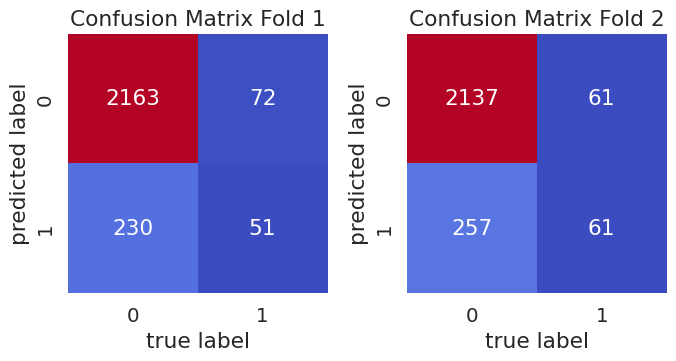

In [71]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

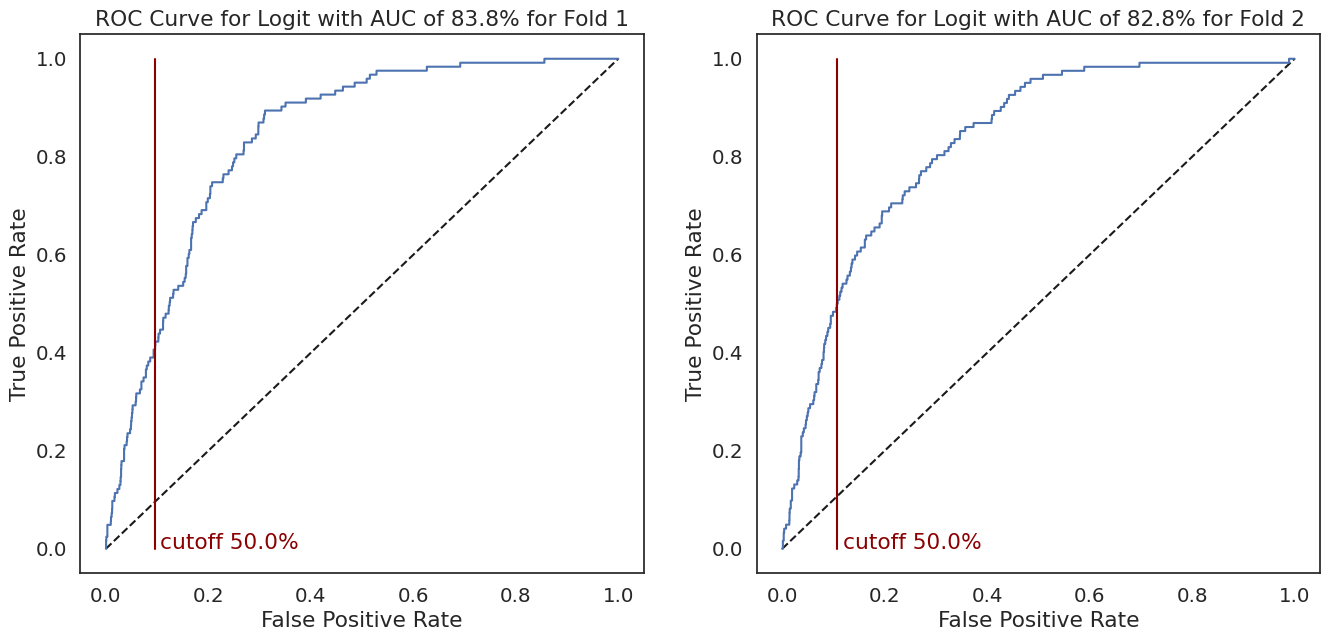

In [72]:
aucLogit, std_Logit = roc(
    [y2, y1], 
    [modelLogit1.predict_proba(X2)[:, 1], modelLogit2.predict_proba(X1)[:, 1]], 
    "Logit"
)

<font size="+1" color="grey"><b>5.6 CatBoost (CB)</b></font><br><a id="5.6"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

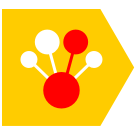<br><br><br><br>

<p style="font-size : 16px">Gradient Boosting Trees leran from the mistakes/errors of previous iterations. Weak learners, the individual trees, are to become strong ones. Thus, it is a sequence of trees in the end. The computational complexity is approximately:</p>

$$ O(nv\cdot trees) $$ 
<p style="font-size : 16px"> for learning and </p><br>
$$ O(v\cdot trees) $$ 
<p style="font-size : 16px">for application.</p>

<p style="font-size : 16px">The CatBoost classifier from Yandex is, similar to XGBoost or LightGBM, a gradient boosting tree method. This method has two advantages besides the characteristics of the GBM already shown. </p>

1. <p style="font-size : 16px">Categorical features are not necessarily encoded via one-hot. The problem with one-hot is that the complexity of the method can become very large due to the dimensionality. Single decision trees become thereby partially very broad. The method that the CatBoost uses here is similar to a target encoding. The percentage of the respective class is mapped as a number, whereby the categorical feature becomes a continuous one [see Prokhorenkova et al, 2019, p. 3]. </p>
2. <p style="font-size : 16px">The default settings are already very well chosen.</p>

In [73]:
data = dummies(
    data, 
    ["gender", "ever_married", "Residence_type"],
    dropFirstAll=True
)

In [74]:
CV_XC, test_XC, CV_yC, test_yC = train_test_split(
    data.drop(columns=["stroke"]), 
    data.stroke,
    train_size=test_holdout,
    random_state=seeds,
    shuffle=True,
    stratify=data.stroke
) 

dataC = pd.concat([CV_XC, CV_yC], axis=1)

In [75]:
X1C, X2C, y1C, y2C = train_test_split(
    dataC.drop(columns=["stroke"]), 
    dataC.stroke,
    train_size=0.5,
    random_state=seeds,
    shuffle=True,
    stratify=dataC.stroke
) 

In [76]:
SMOTE = SMOTENC(
    k_neighbors=neighbors,
    random_state=seeds, 
    n_jobs=-1, 
    categorical_features=np.where([i not in contVars for i in X1C.columns])[0],
    sampling_strategy=SyntheticShare
)
Xr1C, yr1C = SMOTE.fit_resample(X1C, y1C)
Xr2C, yr2C = SMOTE.fit_resample(X2C, y2C)

In [77]:
CB = CatBoostClassifier(
    loss_function='Logloss',
    verbose=False,
    random_seed=seeds,
    task_type="CPU",
    #Controls the depth of the tree by an alternative categorical encoding method 
    #from a one hot column count of two - thus binary.    
    one_hot_max_size=2 
)

param_grid = {
    'learning_rate': [0.04, 0.05],
    'iterations': [50, 80],
    'depth': [4, 5],
    'rsm': [0.9, 0.95, 1],
    'l2_leaf_reg': [0, 0.01],
    'subsample': [0.9, 0.95, 1],
    'random_strength': [0, 0.1],
    'max_leaves': [29, 31]
}

In [78]:
CrossVal(CB, param_grid, [Xr1C, Xr2C], [yr1C, yr2C], **{"cat_features": ["smoking_status", "work_type"]})

In [79]:
makeModelAndPred([grid1, grid2], "CB", [X2C, X1C])

({'depth': 5,
  'iterations': 80,
  'l2_leaf_reg': 0,
  'learning_rate': 0.05,
  'max_leaves': 31,
  'random_strength': 0,
  'rsm': 1,
  'subsample': 1},
 {'depth': 5,
  'iterations': 80,
  'l2_leaf_reg': 0,
  'learning_rate': 0.05,
  'max_leaves': 31,
  'random_strength': 0.1,
  'rsm': 0.95,
  'subsample': 1})

In [80]:
for i in [1, 2]:
    globals()[f"modelCB{i}"].save_model(f"cb{i}", format="cbm")

In [81]:
for i in [1, 2]:
    print(classification_report(globals()[f"y{1 if i == 2 else 2}"], globals()[f"y_hat{i}"]))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2393
           1       0.19      0.30      0.24       123

    accuracy                           0.91      2516
   macro avg       0.58      0.62      0.59      2516
weighted avg       0.93      0.91      0.91      2516

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2394
           1       0.18      0.40      0.25       122

    accuracy                           0.88      2516
   macro avg       0.58      0.66      0.59      2516
weighted avg       0.93      0.88      0.90      2516



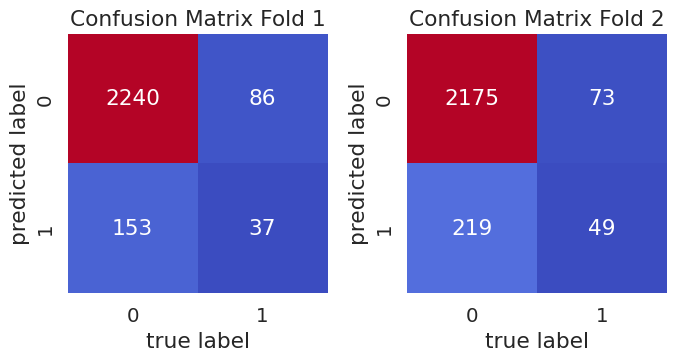

In [82]:
confMat(data, [y2, y1], [y_hat1, y_hat2], "stroke")

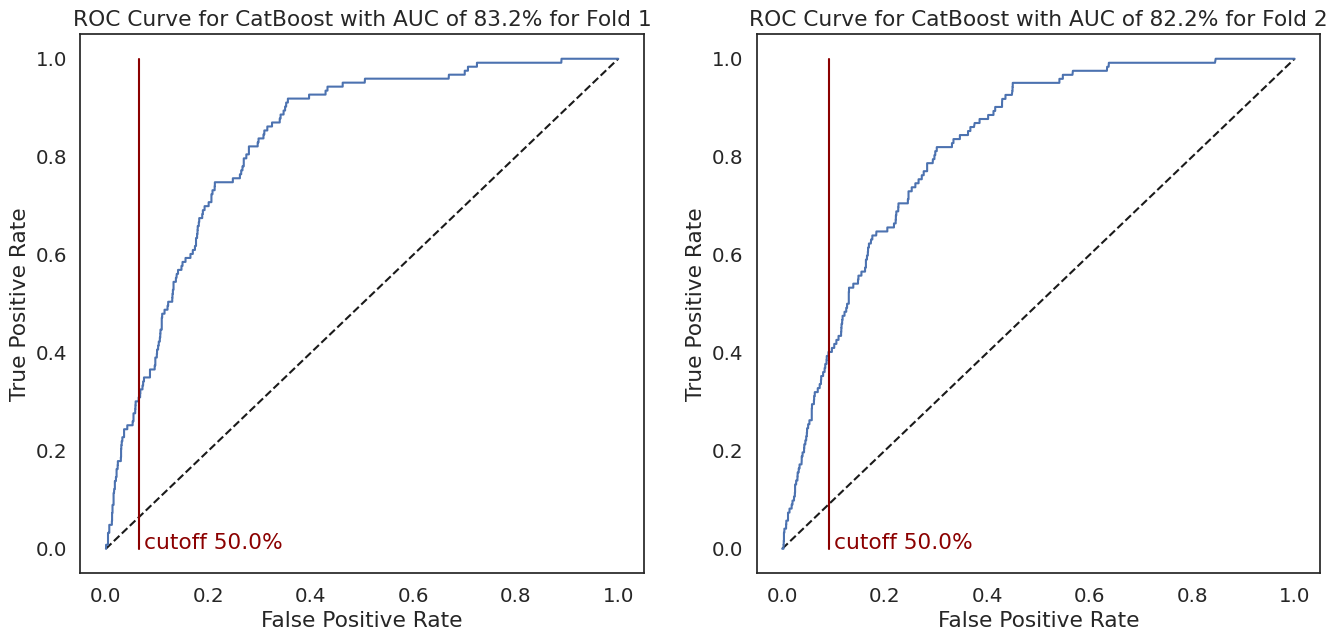

In [83]:
aucCB, std_CB = roc(
    [y2, y1], 
    [modelCB1.predict_proba(X2C)[:, 1], modelCB2.predict_proba(X1C)[:, 1]], 
    "CatBoost"
)

<font size="+1" color="grey"><b>5.7 Assessment of the Different Algorithms </b></font><br><a id="5.7"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">The ROC curves show that the classifications work and are not driven by coincidence. All in all, the performance is acceptable. Due to the strong minority class, it is nevertheless difficult to separate strokes from non-strokes. The SMOTE method works but has its weaknesses. To clarify again, without SMOTE the classification performs much worse.</p>

<p style="font-size : 16px">Sorted by worst fold measured by AUC, the order is as follows:</p>

1. <p style="font-size : 16px">Logit</p>
2. <p style="font-size : 16px">CatBoost </p>
3. <p style="font-size : 16px">Support Vector Machines</p>
4. <p style="font-size : 16px">Random Forest</p>
5. <p style="font-size : 16px">Naive Bayes</p>
6. <p style="font-size : 16px">k-Nearest Neighbors</p>

<font size="+1" color="grey"><b>5.8 Decision Boundaries/Areas</b></font><br><a id="5.8"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Let us first define a function that is capable of plotting a two-dimensional decision area by probability. It should be noted that the models actually use significantly more variables. Nevertheless, it is worth looking at the decision boundaries to gain a better understanding of the corresponding methods applied to this very specific data set. The plots show the actual observations on a contourplot, which shows the probability for(<font color="red">red</font>) and against (<font color="blue">blue</font>) a stroke. Under the heading, the highest and lowest probability calculated in the meshgrid is given in parentheses. The colour scale of the contour plot, on the other hand, is chosen between zero and one to highlight differences. If the highest measured probability is e.g. 70%, then the darkest possible red colouring would not be visible. The division of the probability colour is rather not continuous, but discrete, so that it remains better understandable for the viewer.</p>

In [84]:
def decision_boundary(trainDF, testDF, y_tr, y_te, m, 
                      f1: list, f2: list, title: str, pg: dict, seed,
                      resolution = 200, catboost = False, 
                      cv_folds=3, subset=[0.1, 0.9], nlevels=5) -> "plt":
    
    """
    Function to plot two 2D decision boundaries.
    This function tunes a model by grid search and applies the model to test data.
    
    trainDF = training pd.DataFrame
    testDF = testing pd.DataFrame
    y_tr = training target pd.Series
    y_te = testing target pd.Series
    m = model
    f1 = list of names of features to plot on x axis
    f2 = list of names of features to plot on x axis
    title = additional title of the plot. Predetermined is 'Decision Boundary'
    pg = parameter grid dict
    seed = seed
    resolution = resolution of the boundary
    catboost = bool whether a catboost is used or not
    cv_folds = folds for cross validation in grid search
    subset = subset of the scatterplot by category
    nlevels=No. of levels for the contour plot
    
    output: two decision boundary plots
    
    """
    
    fig, p = plt.subplots(
        nrows=1, 
        ncols=2, 
        figsize=(14, 7)
    )
    
    for j in [0,1]:
        
        #calculating max and min for axis limits
        one_min = testDF[f"{f1[j]}"].min()
        one_max = testDF[f"{f1[j]}"].max()

        two_min = testDF[f"{f2[j]}"].min()
        two_max = testDF[f"{f2[j]}"].max()

        one = np.linspace(one_min, one_max, resolution)
        two = np.linspace(two_min, two_max, resolution)

        feature_1, feature_2 = np.meshgrid(
            one,
            two
        )

        grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

        g = GridSearchCV(m, pg, n_jobs=-2, cv=cv_folds, scoring="roc_auc")
        g.fit(trainDF[[f"{f1[j]}", f"{f2[j]}"]], y_tr)
        
        """
        CatBoost cannot use g.best_estimator_, therefore it must be fitted
        with the best paramerters. A fitted model cannot change parameters,
        so we use m1 and m2 instead ot m.
        
        """
        if catboost:
            globals()[f"m{j}"] = m.copy()
            globals()[f"m{j}"].set_params(**g.best_params_)
            globals()[f"m{j}"].fit(X=trainDF[[f"{f1[j]}", f"{f2[j]}"]], y=y_tr)
            k=j
        else:
            m = g.best_estimator_

        y_pred = np.reshape(
            globals()[f"m{k}"].predict_proba(grid)[:, 1] if catboost else m.predict_proba(grid)[:, 1], 
            feature_1.shape
        )
        
        pMinMax = [round(np.min(y_pred), 2), round(np.max(y_pred), 2)]
        p[j].contourf(
            feature_1, feature_2, y_pred, 
            alpha=0.3, cmap="coolwarm", 
            levels=np.linspace(0, 1, nlevels)
        )
        
        colors = ('blue', 'red')
        edgecolors = ('lightblue', '#ff9e81')
        markers = ('o', 'o')
        
        """
        X- and YMax and -Min are to adjust the axis limits. The contout is based on the entire
        testDF. The scatterplots are based on a subset (default).
        """
        XMax=[]
        XMin=[]
        YMax=[]
        YMin=[]

        for i, yh in enumerate(np.unique(y_te)):
            
            X=testDF.sample(frac=subset[i], random_state=seed).loc[y_te == yh, f"{f1[j]}"]
            Y=testDF.sample(frac=subset[i], random_state=seed).loc[y_te == yh, f"{f2[j]}"]
            
            XMax.append(X.max())
            XMin.append(X.min())
            YMax.append(Y.max())
            YMin.append(Y.min())
            
            p[j].scatter(
                x=X, 
                y=Y,
                alpha=0.5, 
                c=colors[i],
                marker=markers[i], 
                s=80,
                label=round(yh), 
                edgecolor=edgecolors[i],
                )
            if j == 1:
                p[j].legend(bbox_to_anchor =(1.2, 0.6), title="Stroke")
            p[j].set_title(
                "Decision Areas {0}\n ({1} < Probability < {2})".format(title, pMinMax[0], pMinMax[1])
            )
            p[j].set_xlabel(f"{f1[j]}")
            p[j].set_ylabel(f"{f2[j]}")
            
            if i == 1:
                p[j].set_ylim(np.min(YMin), np.max(YMax))
                p[j].set_xlim(np.min(XMin), np.max(XMax))
               
    plt.show()

<p style="font-size : 16px">According to correlation matrices of pandas profiling, age is strongly correlated with stroke, therefore we take age as abscissa for all decision boundaries.</p>

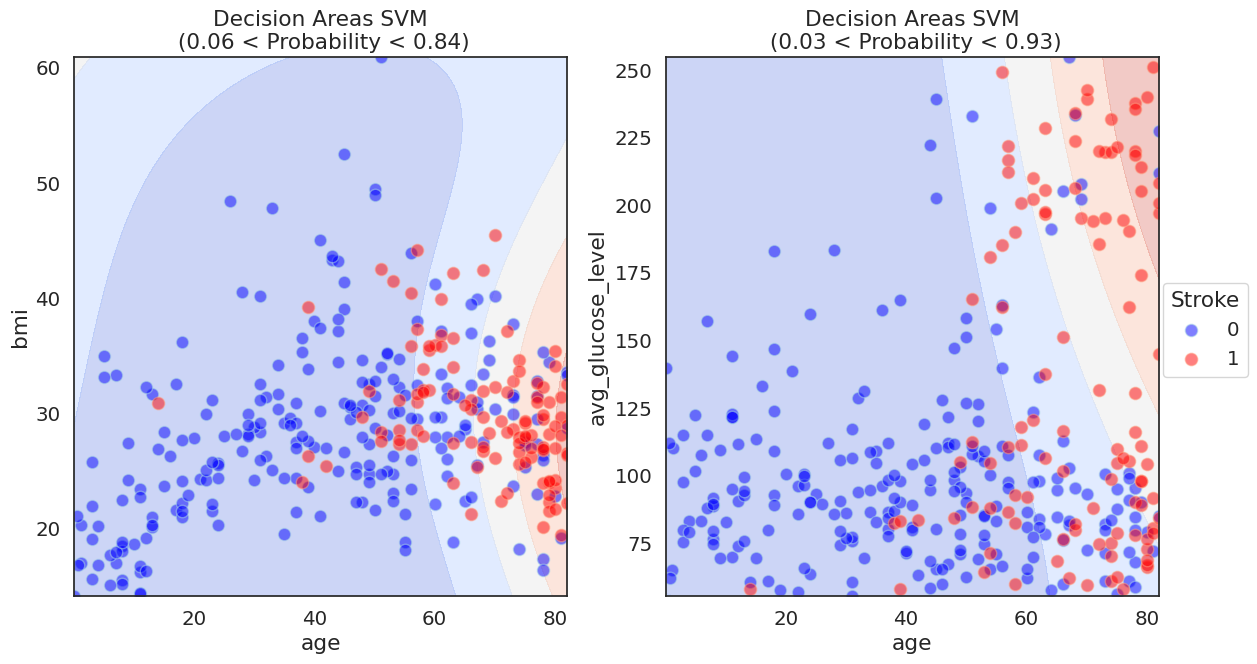

In [85]:
decision_boundary(
    Xr1, X2, yr1, y2, 
    SVM, ["age", "age"], ["bmi", "avg_glucose_level"], "SVM", 
    {
        'svc__C': [0.1 ,1, 10],
        'svc__gamma': [0.05, 0.1]
    }, seeds,
    resolution=500,
    nlevels=6
)

<p style="font-size : 16px">The soft lines are typical for support vector machines. The areas that are classified fit quite well with the validation data. Since the model was trained with only two variables, this differs from the actual more sophisticated model. Nevertheless, in the cross-comparison of the methods it becomes clear that the methods have their strengths and weaknesses in generalisation, which is caused by the method itself. Both with increasing BMI and age, the likelihood of stroke increases. </p>

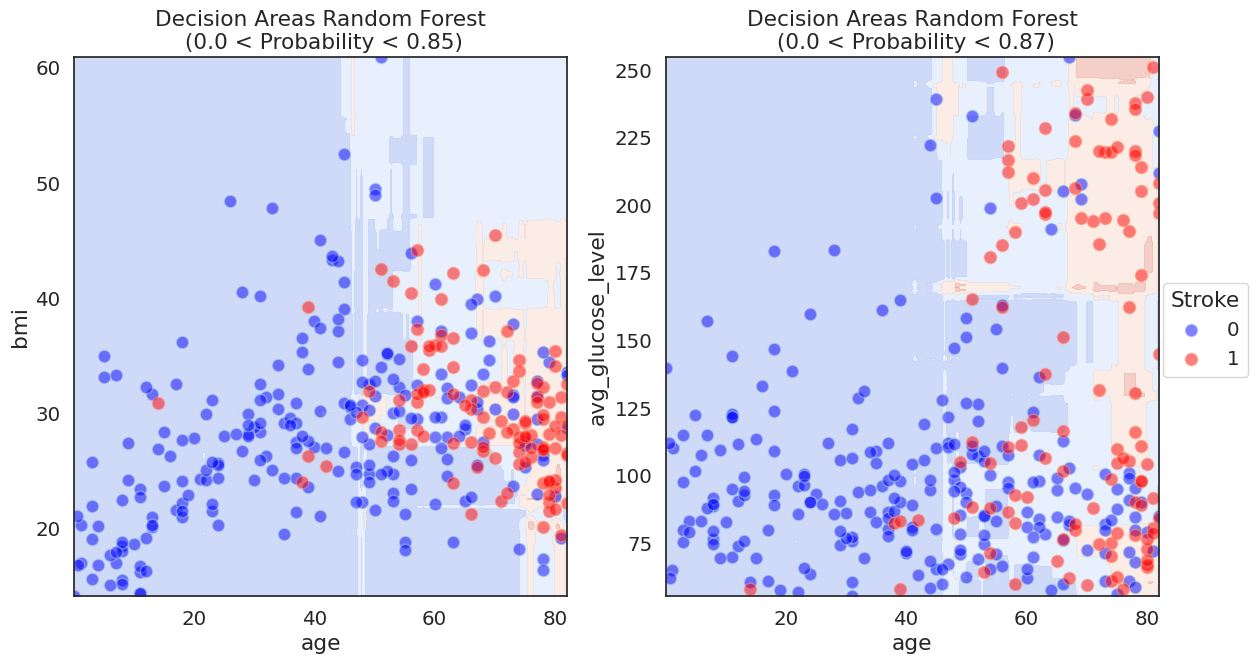

In [86]:
decision_boundary(
    Xr1, X2, yr1, y2, 
    RF, ["age", "age"], ["bmi", "avg_glucose_level"], "Random Forest", 
    {
        'n_estimators': [10, 15],
        'max_depth': [5, 6],
        'min_samples_leaf': [1, 2]
    }, seeds
)

<p style="font-size : 16px">Random Forest delimits a smaller area that would be classified as a stroke. However, the typical staircase structure of decision trees is also recognizable, which appears much more complex than in the support vector machines.</p>

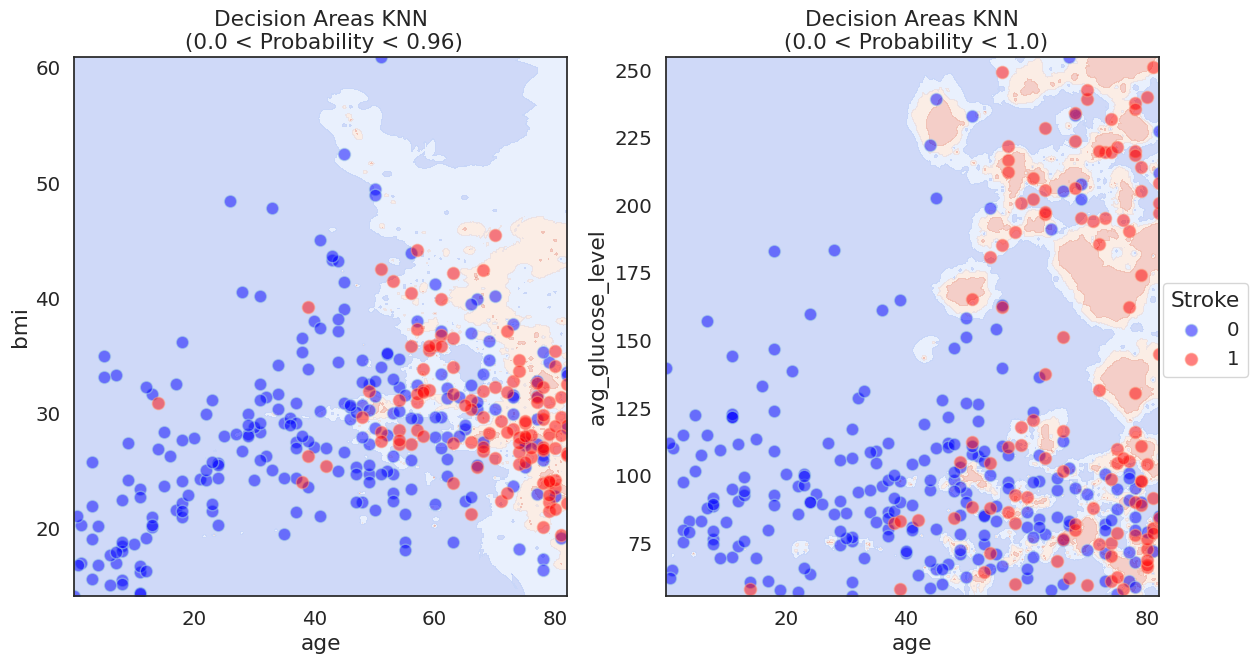

In [87]:
decision_boundary(
    Xr1, X2, yr1, y2, 
    KNN, ["age", "age"], ["bmi", "avg_glucose_level"], "KNN", 
    {
        'kneighborsclassifier__n_neighbors': [5, 10, 50, 100, 200],
        'kneighborsclassifier__weights': ['uniform', 'distance']
    }, seeds,
    resolution=500
)

<p style="font-size : 16px">k-nearest neighbors looks quite complex in the two-dimensional domain. No stroke is predicted in the upper BMI range.</p>

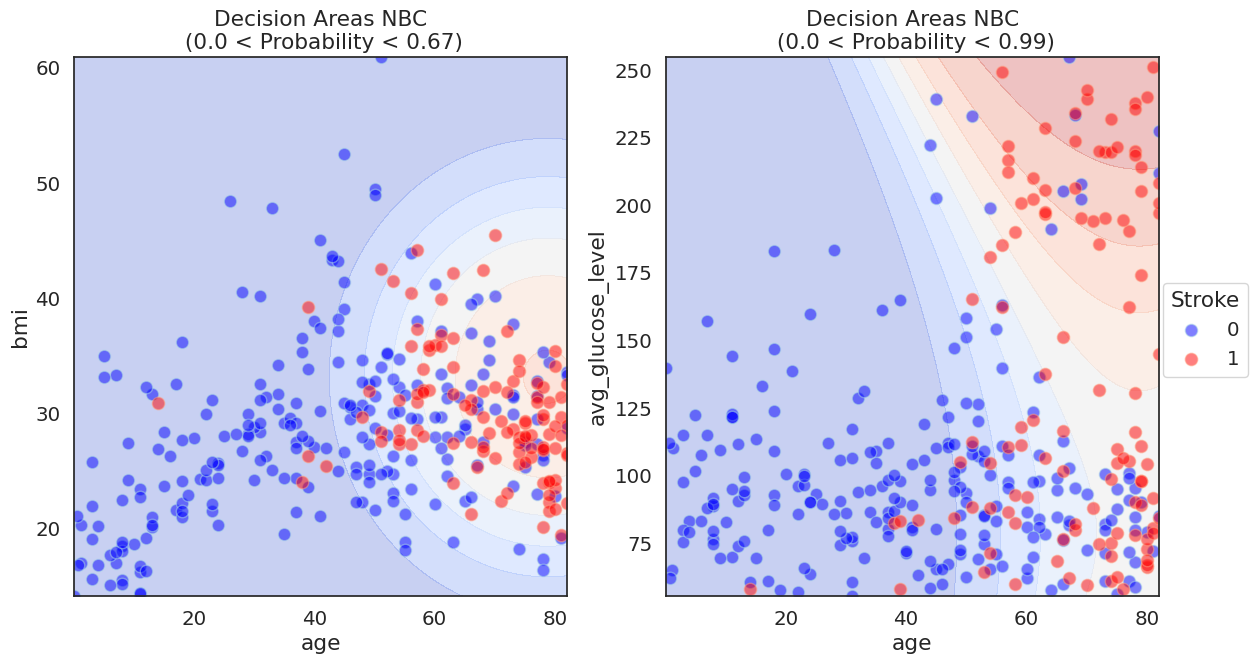

In [88]:
decision_boundary(
    Xr1, X2, yr1, y2, 
    NBC, ["age", "age"], ["bmi", "avg_glucose_level"], "NBC", 
    {
        'gaussiannb__var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06]
    }, seeds,
    resolution=500,
    nlevels=10
)

<p style="font-size : 16px">The naive bayes classifier bounds a fairly accurate range at age and bmi. Overall, the decision bounds are similarly soft to support vector machines although the shape is different. A very high BMI would not come within the range of a stroke risk.</p>

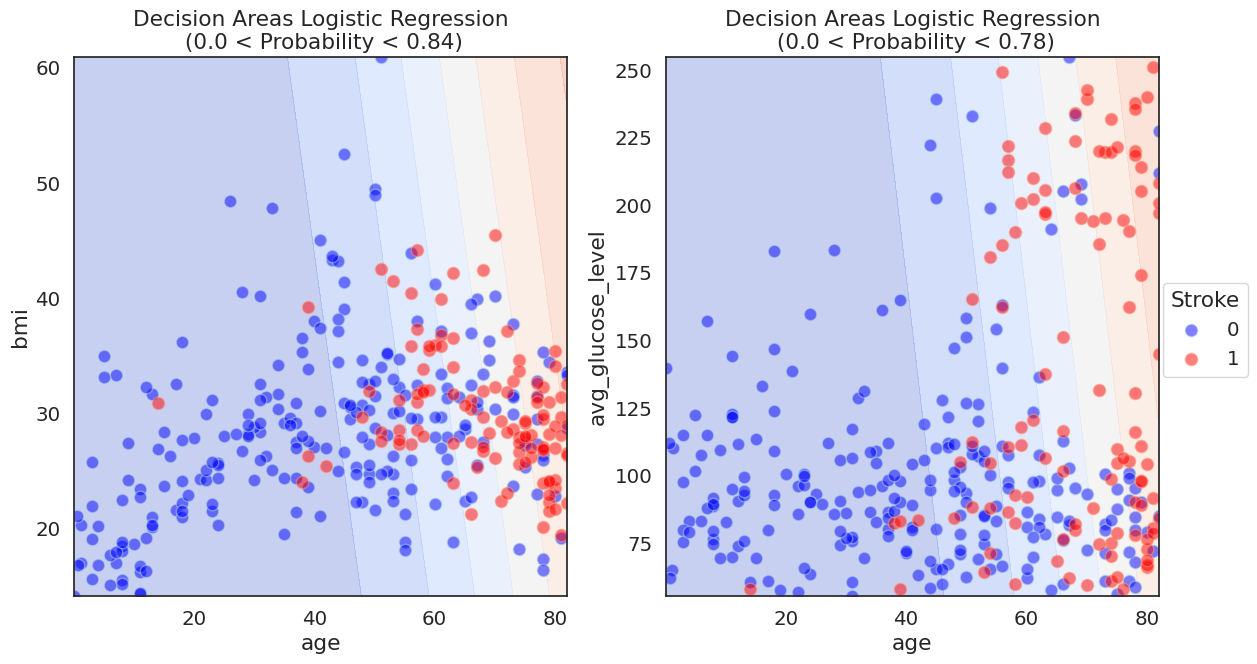

In [89]:
decision_boundary(
    Xr1, X2, yr1, y2, 
    Logit, ["age", "age"], ["bmi", "avg_glucose_level"], "Logistic Regression", 
    {
        'penalty': ["l1", "l2"],
        'C': np.linspace(0, 100, 5)
    }, seeds,
    resolution=500,
    nlevels=10
)

<p style="font-size : 16px">The Logistic Regression is a linear model. Therefore, the shape of the hypothesis. With this method, by contrast, the higher the BMI, the higher the risk of stroke.</p>

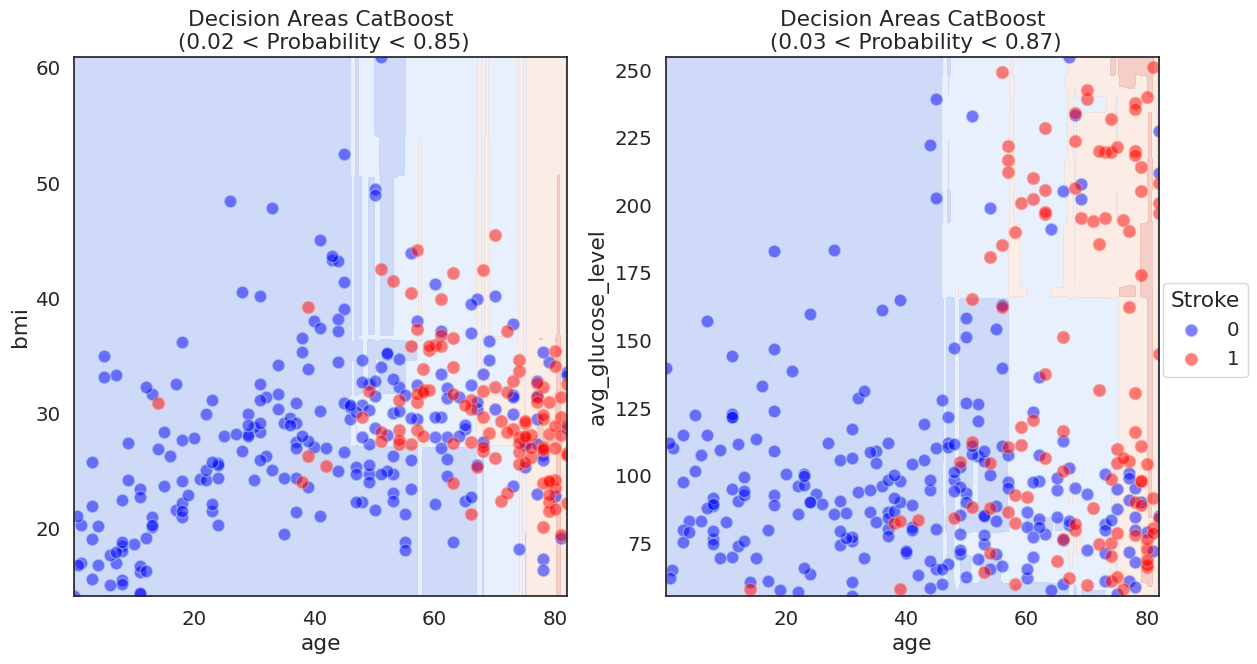

In [90]:
decision_boundary(
    Xr1, X2, yr1, y2, 
    CatBoostClassifier(
        loss_function='Logloss',
        verbose=False,
        random_seed=seeds
    ), ["age", "age"], ["bmi", "avg_glucose_level"], "CatBoost", 
    {
        'learning_rate': [0.05, 0.01],
        'iterations': [80, 120],
        'depth': [3,4],
        'random_strength': [0, 1]
    }, seeds,
    catboost=True
)

<p style="font-size : 16px">Like the Random Forest, the CatBoost classifier appears quite complex. The ranges in which strokes are predicted are rather large. At a higher age, the risk increases with exceeding a certain BMI level.</p>


<p style="font-size : 16px">Overall, the methods find very similar areas that are considered at risk of stroke. It is always a higher age, and a higher average glucose level. For BMI, it is often the middle around 30 that is more affected. </p>
    
<p style="font-size : 16px"><b>Since k-NN do not reach an AUC over 80% in any fold, it is not considered further in the following analysis. k-NN additionally looks more over-fitted than any other method</b> - which is probably the reason.</p>

<font size="+1" color="grey"><b>5.9 SHapley Additive exPlanations (SHAP)</b></font><br><a id="5.9"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">In order to decode the black box of the model a little bit, we make use of SHAP Values. It should be noted at this point that prediction models are not explanatory models in the statistical sense. Therefore, implausible results may well occur as soon as an attempt is made to decode a prediction model. Due to multicollinearity, the mathematical signs of coefficients can be reversed. This means that there is not only one possible model, but several possibilities to assign the "coefficients" (respectively the properties) of a predictive model and still obtain a comparable performance [cf. Farrar, Glauber 1967, p. 107]. For the following analysis, this means that models that have implausible influences on the model result can also be taken into account or considered usable.</p>

<p style="font-size : 16px">To determine unimportant variables in the model, we define a function that measures the variance of the respective shap values. If a certain tolerance value is undershot, the name of the feature is saved.</p>

In [91]:
def findLowVar(df, sv, tol=0.0001) -> list:
    """
    Function to find unimportant features
    df is for the order of the SHAP values
    """
    shap_std = []
    for i in range(sv.shape[1]-1):
        shap_std.append(np.std(sv[:,i]))
    shap_std = np.where(np.array(shap_std) <= tol)[0]
    shap_std = df.columns[shap_std]
    return list(shap_std)

<p style="font-size : 16px">Since we have two folds, we calculate the SHAP values in each case. We define a function that contains all the explainers used. The output is a list of the SHAP values.</p>

In [92]:
def SHAP_Folds(m: list, train: list, test: list, s, s_samp=100, explainer="kernel", **kwargs):
    """
    Function to calculate SHAP-values over 2 cross validation folds.
    
    m = list of models. Elements must be names as strings
    train = list of pd.DaraFrames
    train = list of pd.DaraFrames
    s = seed
    s_samp = Number of samples
    explainer=one of "kernel", "linear", or "tree"
    
    output list of SHAP values for 2 folds
    """
    sv = []
    try:
        for i, M in enumerate(m):
            gc.collect()
            if explainer == "kernel":
                exp = shap.KernelExplainer(
                    eval(M).predict_proba, 
                    train[i].sample(n=s_samp, random_state=s)
                )
            elif explainer == "linear":
                exp = shap.LinearExplainer(eval(M), train[i])
            elif explainer == "tree":
                exp = shap.TreeExplainer(eval(M))
            else:
                print("Use explainer= one of 'kernel', 'linear', or 'tree'")

            sv.append(exp.shap_values(test[1 if i == 0 else 0], **kwargs))
    except Exception as e:
        print("Use help()")
        print(e)

    return sv

<font size="+1" color="grey"><b>5.9.1 Support Vector Machines </b></font><br><a id="5.9.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

In [93]:
shap_values_SVC = SHAP_Folds(
    ["modelSVM1", "modelSVM2"], 
    [Xr1[contVars], Xr2[contVars]], 
    [X1[contVars], X2[contVars]],
    seeds, **{"nsamples": 100}
)

  0%|          | 0/2516 [00:00<?, ?it/s]

  0%|          | 0/2516 [00:00<?, ?it/s]

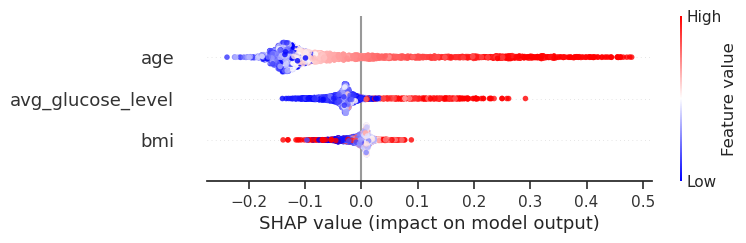

In [94]:
shap.summary_plot(shap_values_SVC[0][1], X2[contVars], max_display=X2.shape[1], 
                  cmap="bwr", title="SHAP SVM", alpha=0.8)

<p style="font-size : 16px">With increasing age or rising glucose level, the likelihood of stroke increases as well. In this plot, however, you don't really see the relationship with BMI. Therefore, let's take a closer look at the relation between model output and the continous variables.</p>

In [95]:
def SHAP_dependence(sv, df, variables: list, center_title: str, ii: list):
    
    try:
        if len(variables) > 3:
            print("Not more than three variables possible!")
            return
        if len(variables) == 1:
            shap.dependence_plot(
                variables[0], sv, df, 
                interaction_index = ii[0], cmap = plt.cm.RdGy, show=False, 
                alpha=0.8, title = title
            )
            plt.ylabel(f"Impact for {variables[0]}")
            plt.show()
        else:
            fig, p = plt.subplots(
                nrows=1, 
                ncols=len(variables), 
                figsize=(18*len(variables)/3,4)
            )

            for i, c in enumerate(variables):
                shap.dependence_plot(
                    c, sv, df, 
                    interaction_index = ii[i], cmap = plt.cm.RdGy, ax=p[i], show=False, 
                    alpha=0.8, title = "\n\n"
                )
                if i == 1:
                    p[i].set_title(center_title) 
                p[i].set_ylabel(f"Impact for {c}")
            plt.show()
        
    except Exception as e:
        print(e)

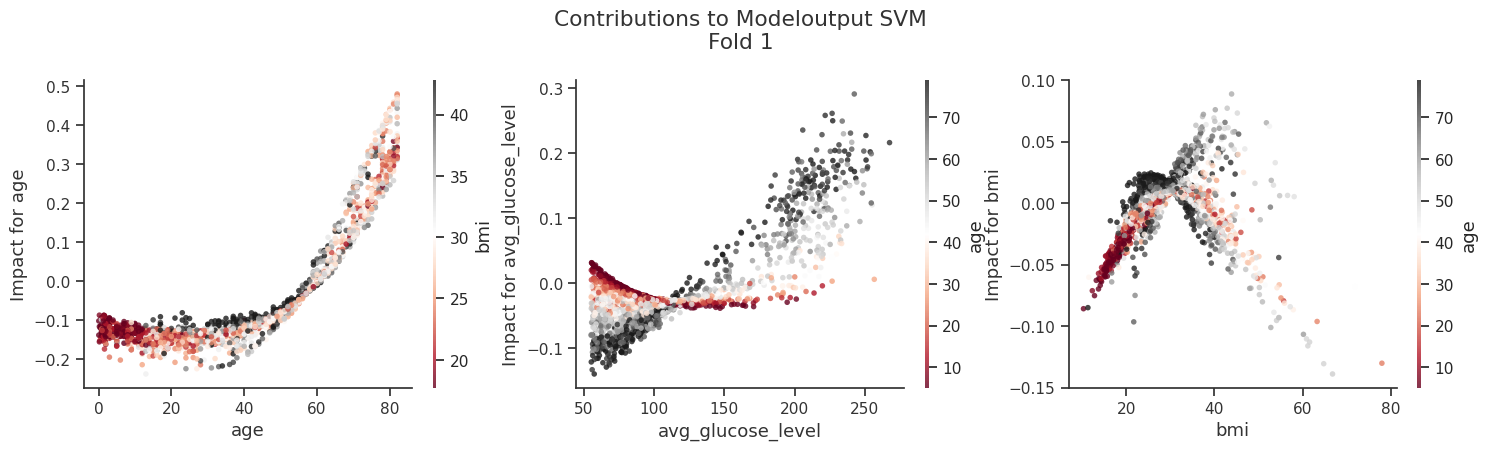

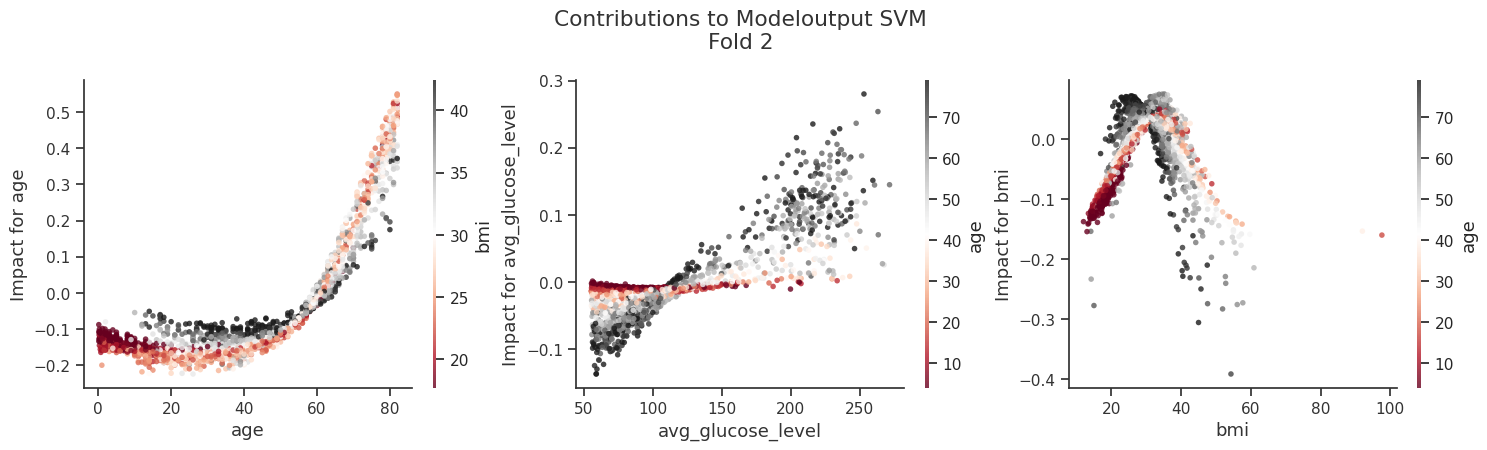

In [96]:
for i, f in enumerate([X2[contVars], X1[contVars]]):
    SHAP_dependence(
        shap_values_SVC[i][1], 
        f, 
        contVars, 
        "Contributions to Modeloutput SVM\nFold %s\n" % (i+1),
        ["bmi", "age", "age"]
    )

<p style="font-size : 16px">Here we see that the top plot (summary_plot) cannot quite correctly represent the impact on the model output because colouring to indicate the direction of the effect is not sufficient in this case. As for age, a positive contribution to probability is measured only from about 60. The average glucose level increases the model output significantly at older ages. If age is low, an increase in the average glucose level is less problematic. This makes sense. It's going to be interesting with the BMI. Around 30 is a range where the contribution to model output is almost exclusively positive. Below and above that, most contributions are either positive or negative - depending on age. In fact, this functional shape is not unusual. That the relationship between BMI and stroke is not linear is often discussed in the literature. There is talk of a J-curve relationship [Yun-Mi<sup>5</sup> et al. 2004, pp. 831 - 836 or Hyun-Jung et al. 2017 p. 8].</p>

<p style="font-size : 16px"><i>"Although obesity is an established risk factor for coronary heart disease, its role as a risk factor for stroke remains controversial." Kurth et al. 2002 p. 2557</i></p>
    
<p style="font-size : 16px">At least we cannot say that the model is wrong at this point. However, the probability exists and should be verified by adding further data.</p>

<p style="font-size : 16px">Let's take a look at what the data from the validation dataset has to say about this. For this we use a parallel coordinate plot. Each axis can be moved individually to the left or right by mouse click. by holding down the left mouse button, data points can be captured on each axis. </p>

5 https://www.ahajournals.org/doi/10.1161/01.STR.0000119386.22691.1C

In [97]:
def parcoord(df: str, color: str, ranges: dict):
    """
    Function to plot parallel coordinates.
    
    df=pd.DataFrame
    color=Column to determine colorscale
    ranges=Lines that are to be highlighted in a certain dimension in a certain range
    """
    parCo = go.Figure(
        data = go.Parcoords(
            line = dict(
                color = eval(f"{df}['{color}']"),
                colorscale = 'Bluered_r',
                showscale = True,
                reversescale = True
                ),
            dimensions = list(          
                    [{"label": "%s" % (c), "values": eval("%s['%s']" % (f"{df}", c))} \
                     if c not in ranges else \
                     {"constraintrange": ranges[c], "label": "%s" % (c), \
                      "values": eval("%s['%s']" % (f"{df}", c))} \
                     for c in eval(f"{df}.columns")
                    ]
                ),
            )
        )
    parCo.update_layout(
        width=800,
        font=dict(size=18)
    )

    parCo.show()

<p style="font-size : 16px">On the left we see the binary variable stroke, in the center the continuous variables, and on the right the prediction applied to the test data set. The observations are coloured according to the predictions. Premarked is stroke = 1. Double-click on the stroke axis to reset the colours.</p>

In [98]:
testX2 = pd.concat([y2, X2[contVars]], axis=1)
testX2["preds"] = modelSVM1.predict_proba(X2[contVars])[:,1].round(2)
parcoord(
    "testX2",
    "preds",
    {
        "stroke": [0.99, 1]
    }
)

<p style="font-size : 16px">Here we actually see that most strokes occur around a bmi of 30. This shows that the model is quite accurate at this point. Since we cannot be sure whether the data is representative at this point, the choices in the app regarding the BMI level should be limited. If doctors or even patients see that much higher BMI values make a significant risk-reducing contribution, this could lead to wrong decisions. As the topic is still being discussed in the scientific community, the app could lose credibility if it takes too strong a stance on this point.</p>

<font size="+1" color="grey"><b>5.9.2 Random Forest </b></font><br><a id="5.9.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

In [99]:
shap_values_RF = SHAP_Folds(
    ["modelRF1", "modelRF2"], 
    [Xr1, Xr2], 
    [X1, X2],
    seeds, explainer="tree"
)

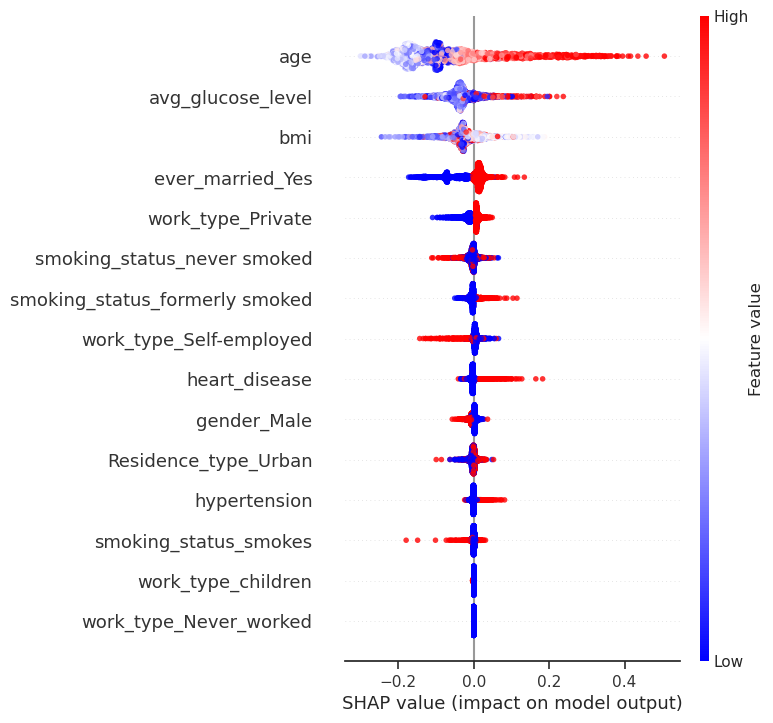

In [100]:
shap.summary_plot(shap_values_RF[0][1], X2, max_display=X2.shape[1], 
                  cmap="bwr", title="SHAP RF", alpha=0.8)

<p style="font-size : 16px"><b>Age</b>, <b>average glucose level</b> and <b>BMI</b> look similar to SVM.</p>

<p style="font-size : 16px"><b>Marriage seems to increase the risk of stroke</b>. However, this may also be related to age, because there is a real causality. no one is born married. Therefore, the probability of ever having been married increases with age.</p>

<p style="font-size : 16px">Working in the <b>private sector</b>, as opposed to the alternatives available here, is probably more stressful and can therefore <b>increase the risk of stroke</b>. That would be plausible. <b>Self-employment</b> has a primarily <b>positive effect on risk</b>. This is difficult to assess because self-employment is a very heterogeneous spectrum. <b>Working</b> or having worked <b>with children rather reduces the likelihood of stroke</b>. Jobs with children are more likely to be taken by people who really want to do this kind of job, people who find satisfaction in it. So not implausible.</p>

<p style="font-size : 16px">Some recent studies conclude that <b>men have a slightly lower risk of stroke</b>. Although there are also regional differences [Rexrode et al. 2022 p. 512]. <b>Other studies conclude that it is the other way round</b> and that men have a higher age-specific risk [Reeves et al. 2008 p. 915].</p>

<p style="font-size : 16px"><b>Smoking status "smokes"</b> in general looks as if the impact on model output would be <b>rather non-linear</b>. Interactions between features could play a role. Overall, however, the influences on the output do not seem completely implausible for smoking status dummies. The fact that someone smokes says nothing about how long this has been the case. If, on the other hand, you state that you used to smoke, then you will probably not state this if it was only for a very short time. </p>

<p style="font-size : 16px"><b>People who live in the city have an increased risk of stroke</b>. This is probably due to stress when compared to life in the country. Another reason could be air pollution. All in all, however, this seems plausible.</p>

<p style="font-size : 16px"><b>For high blood pressure, a positive and also a negative effect would be conceivable</b>. The data set does not include medication of patients. Those who suffer from recognised high blood pressure are treated and may not suffer a stroke as a result. On the other hand, those who claim not to have high blood pressure but do have it nevertheless may of course suffer a stroke. </p>

<p style="font-size : 16px">The <b>same applies to heart disease</b>. If the Effect decreases the risk of stroke, it can be assumed that it is not the heart disease, but the accompanying medical monitoring and medication that triggers the positive effect. Heart medication that lowers cholesterol, such as statins, also reduces the risk of stroke. Conversely, one would actually expect that heart disease should rather increase the risk.</p>

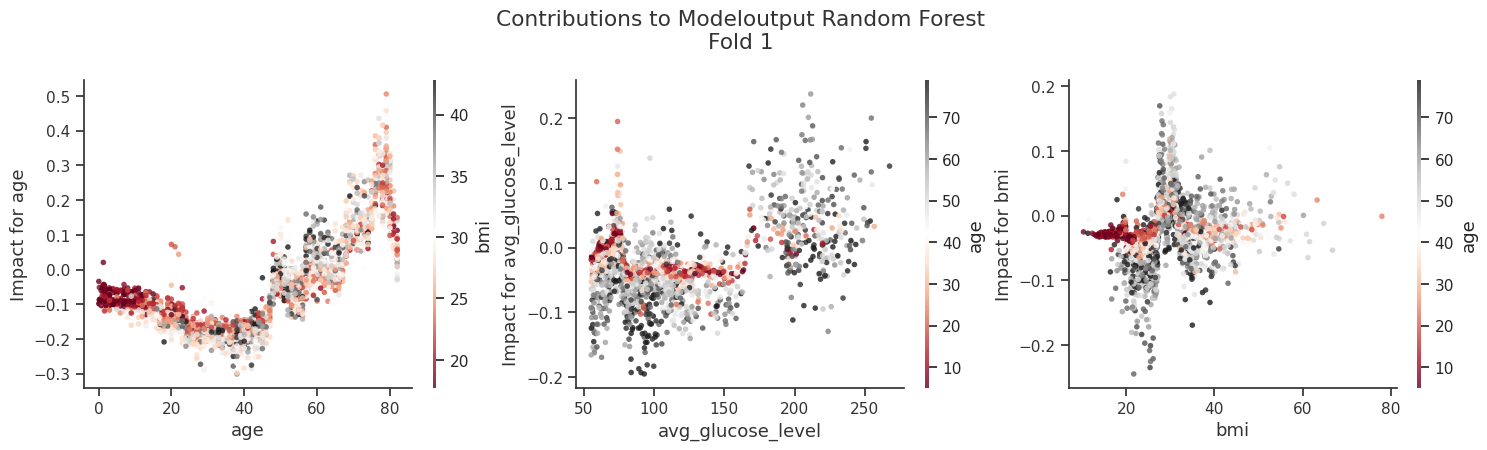

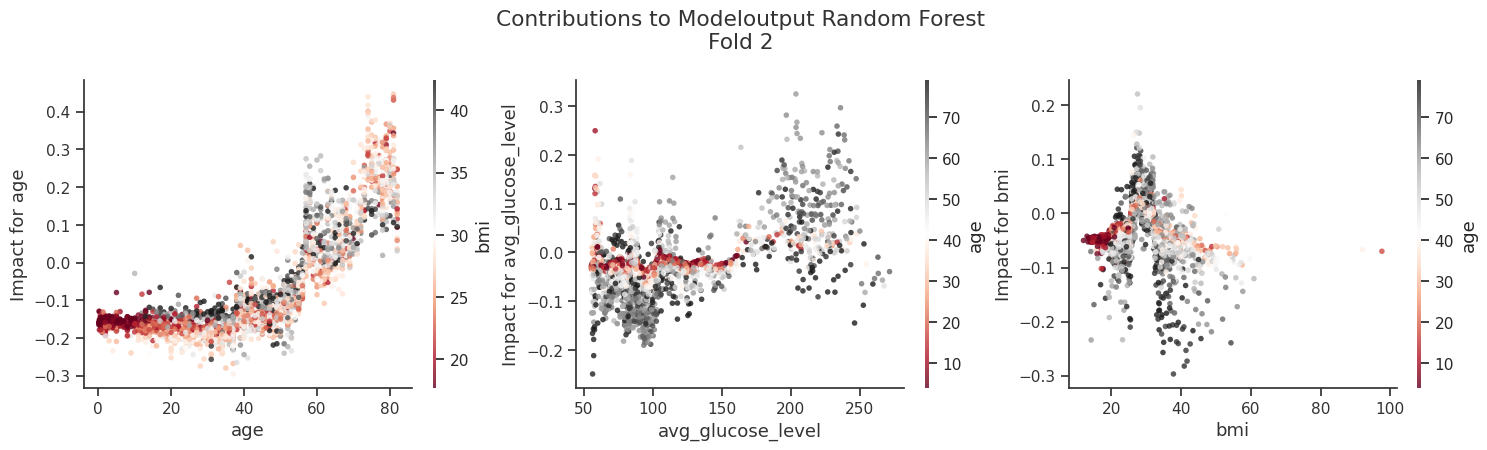

In [101]:
for i, f in enumerate([X2, X1]):
    SHAP_dependence(
        shap_values_RF[i][1], 
        f, 
        contVars, 
        "Contributions to Modeloutput Random Forest\nFold %s\n" % (i+1),
        ["bmi", "age", "age"]
    )

<p style="font-size : 16px">Basically, the connections are very similar to suppurt vector machines. A peak is also visible at a BMI of 30.</p>

In [102]:
for i, d in enumerate([shap_values_RF[0][1], shap_values_RF[1][1]]):
    globals()[f"rf_drop_{i+1}"] = findLowVar(Xr1, d)
    print(globals()[f"rf_drop_{i+1}"])

['work_type_Never_worked']
['work_type_Never_worked']


<font size="+1" color="grey"><b>5.9.3 Naive Bayes Classifier </b></font><br><a id="5.9.3"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

  0%|          | 0/2516 [00:00<?, ?it/s]

  0%|          | 0/2516 [00:00<?, ?it/s]

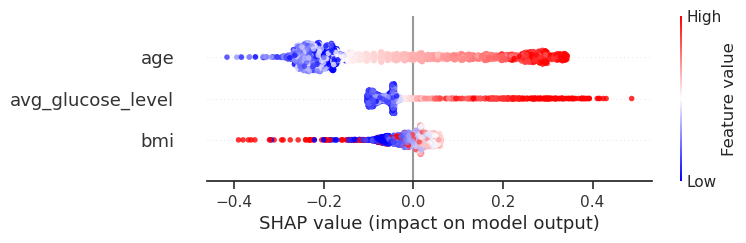

In [103]:
shap_values_NBC = SHAP_Folds(
    ["modelNBC1", "modelNBC2"], 
    [Xr1[contVars], Xr2[contVars]], 
    [X1[contVars], X2[contVars]],
    seeds, **{"nsamples": 100}
)

shap.summary_plot(shap_values_NBC[0][1], X2[contVars], max_display=X2.shape[1], 
                  cmap="bwr", title="SHAP NBC", alpha=0.8)

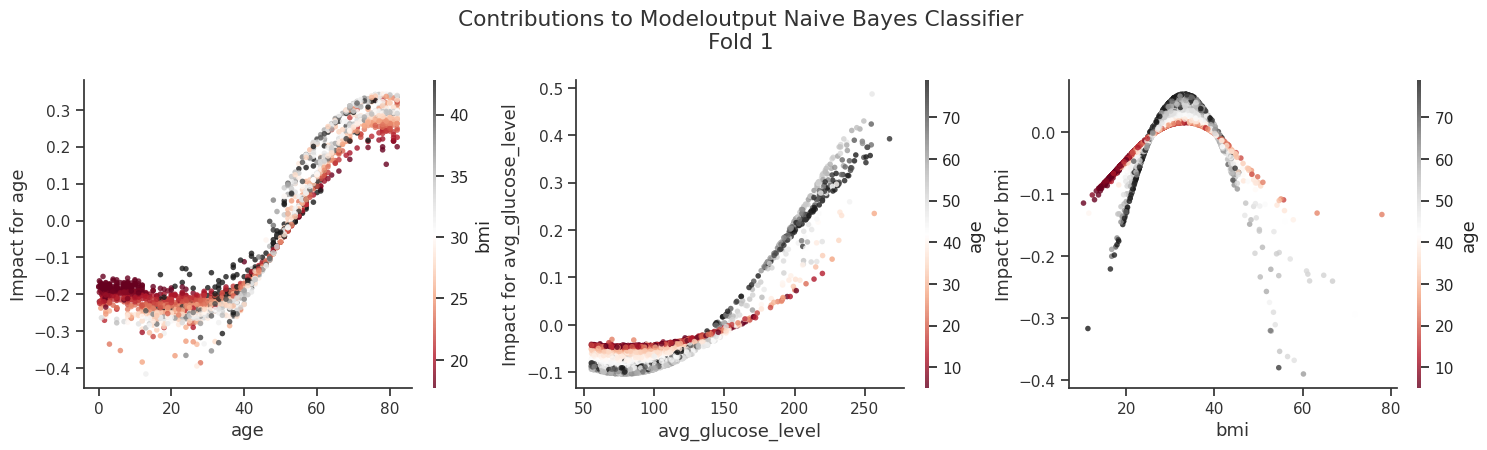

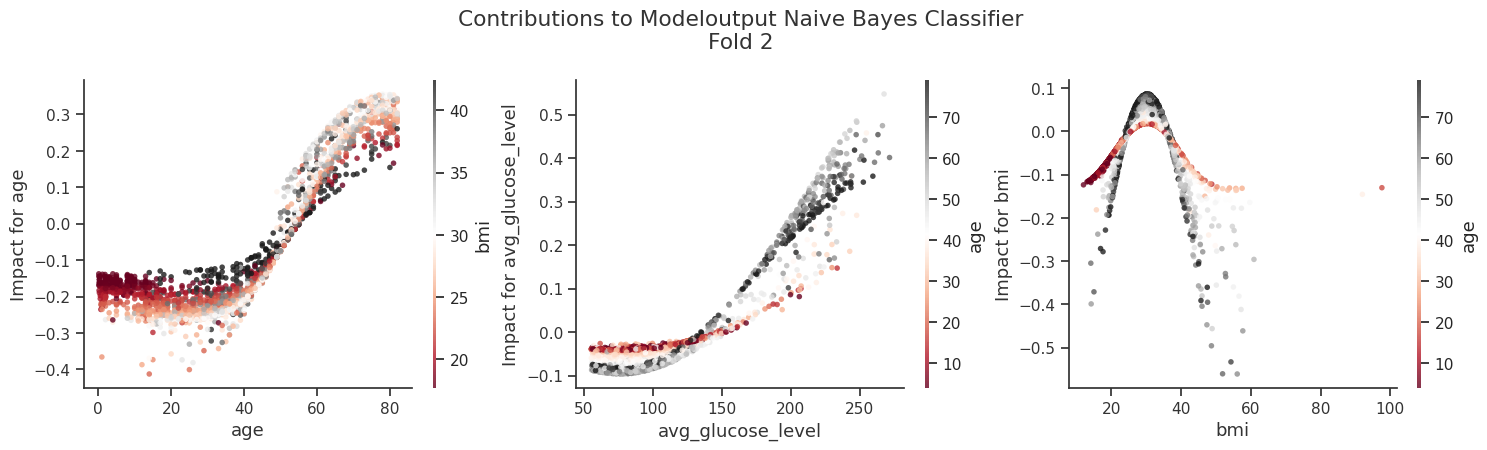

In [104]:
for i, f in enumerate([X2[contVars], X1[contVars]]):
    SHAP_dependence(
        shap_values_NBC[i][1], 
        f, 
        contVars, 
        "Contributions to Modeloutput Naive Bayes Classifier\nFold %s\n" % (i+1),
        ["bmi", "age", "age"]
    )

<p style="font-size : 16px">This method also shows a similar picture. We see a peak at a BMI of about 35. It quickly becomes clear that this method involves the normal distribution assumption.</p>

<font size="+1" color="grey"><b>5.9.4 Logistic Regression </b></font><br><a id="5.9.4"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Since logit is a linear model, the linear explainer should actually be taken. However, the same problem arises here as with the catboost below. The model contributions are too high for "age". However, we can still see the importance and the direction of the effects</p>

In [105]:
shap_values_Logit = SHAP_Folds(
    ["modelLogit1", "modelLogit2"], 
    [Xr1, Xr2], 
    [X1, X2],
    seeds, explainer="linear"
)

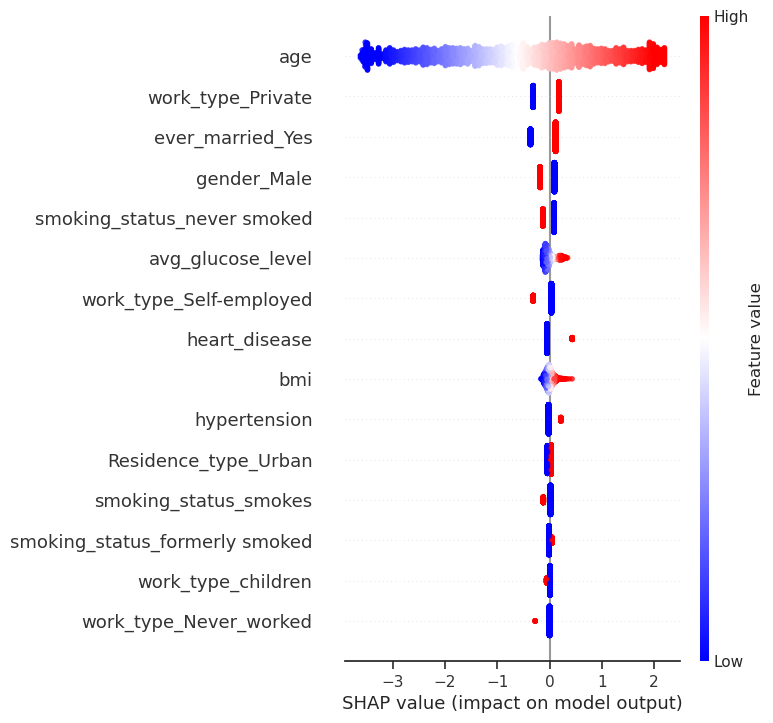

In [106]:
shap.summary_plot(shap_values_Logit[0], X2, max_display=X2.shape[1], 
                  cmap="bwr", title="SHAP Logit", alpha=0.8)

<p style="font-size : 16px">Since the model is linear, the dependence plots make no sense. </p>
    
<p style="font-size : 16px">The Logistic Regression is not necessarily considered a black-box model, since there are coefficients. We now look at the coefficient signs to examine them for plausibility and compare them with the SHAP values. We hide the absolute magnitude of the coefficients because the data were not normalised beforehand and thus the scale would show a distorted picture.</p>

In [107]:
pd.Series(index=Xr1.columns, data=modelLogit1.coef_[0]).map(lambda x: "+" if x > 0 else "-")

age                               +
hypertension                      +
heart_disease                     +
avg_glucose_level                 +
bmi                               +
gender_Male                       -
work_type_Never_worked            -
work_type_Private                 +
work_type_Self-employed           -
work_type_children                -
ever_married_Yes                  +
Residence_type_Urban              +
smoking_status_formerly smoked    +
smoking_status_never smoked       -
smoking_status_smokes             -
dtype: object

In [108]:
pd.Series(index=Xr2.columns, data=modelLogit2.coef_[0]).map(lambda x: "+" if x > 0 else "-")

age                               +
hypertension                      +
heart_disease                     -
avg_glucose_level                 +
bmi                               -
gender_Male                       +
work_type_Never_worked            -
work_type_Private                 -
work_type_Self-employed           -
work_type_children                -
ever_married_Yes                  +
Residence_type_Urban              +
smoking_status_formerly smoked    -
smoking_status_never smoked       -
smoking_status_smokes             -
dtype: object

<p style="font-size : 16px">Except the "smoking status" dummies, both SHAP Values and the coefficients make sense in terms of mathematical sign for fold 1. For fold 2, there is also a negative sign for BMI.</p>

In [109]:
for i, d in enumerate([shap_values_Logit[0], shap_values_Logit[1]]):
    globals()[f"logit_drop_{i+1}"] = findLowVar(Xr1, d)
    print(globals()[f"logit_drop_{i+1}"])

[]
[]


<font size="+1" color="grey"><b>5.9.5 CatBoost </b></font><br><a id="5.9.5"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">CatBoost provides the SHAP values directly:</p>

In [110]:
shap_values_CB = []
for i in [1,2]:
    shap_values_CB.append(eval(f"modelCB{i}").get_feature_importance(
        Pool(
            eval(f"X{2 if i == 1 else 1}C"), 
            label=eval(f"y{2 if i == 1 else 1}C"),
            cat_features=["smoking_status", "work_type"]
        ), 
        type="ShapValues"
    ))

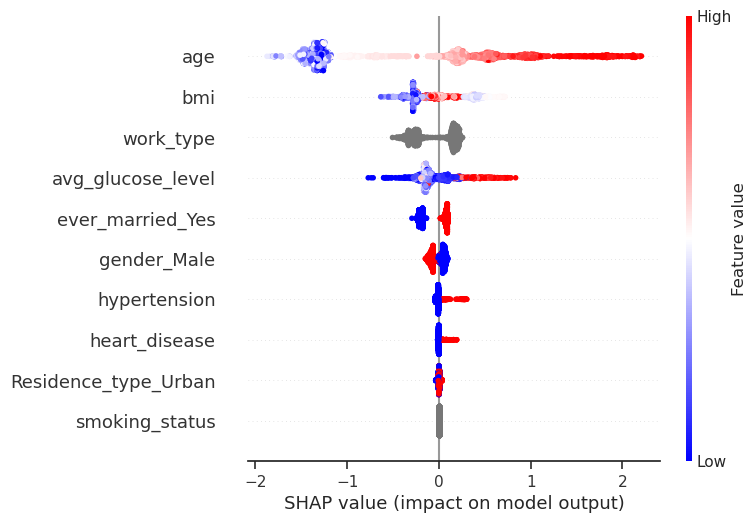

In [111]:
shap.summary_plot(shap_values_CB[0][:,:-1], X2C, max_display=X2C.shape[1], 
                  cmap="bwr", title="SHAP CatBoost")

<p style="font-size : 16px">As alternative methods are used for categorical encoding with more than two catrgories, these are greyed out. Overall, the direction of impact of the contributions to the model output seems plausible.</p>

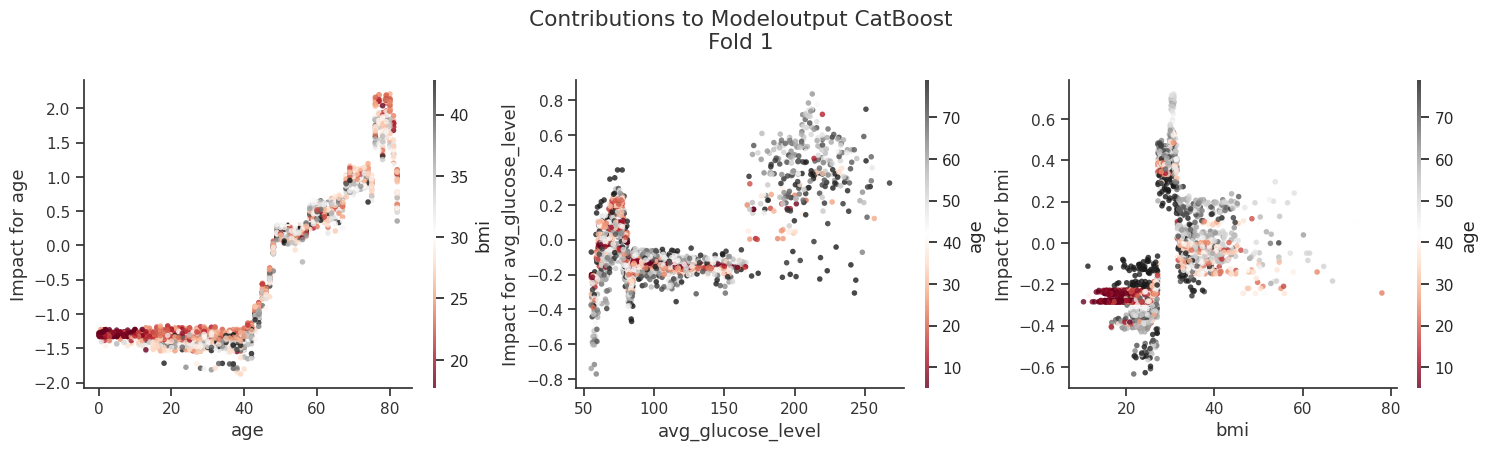

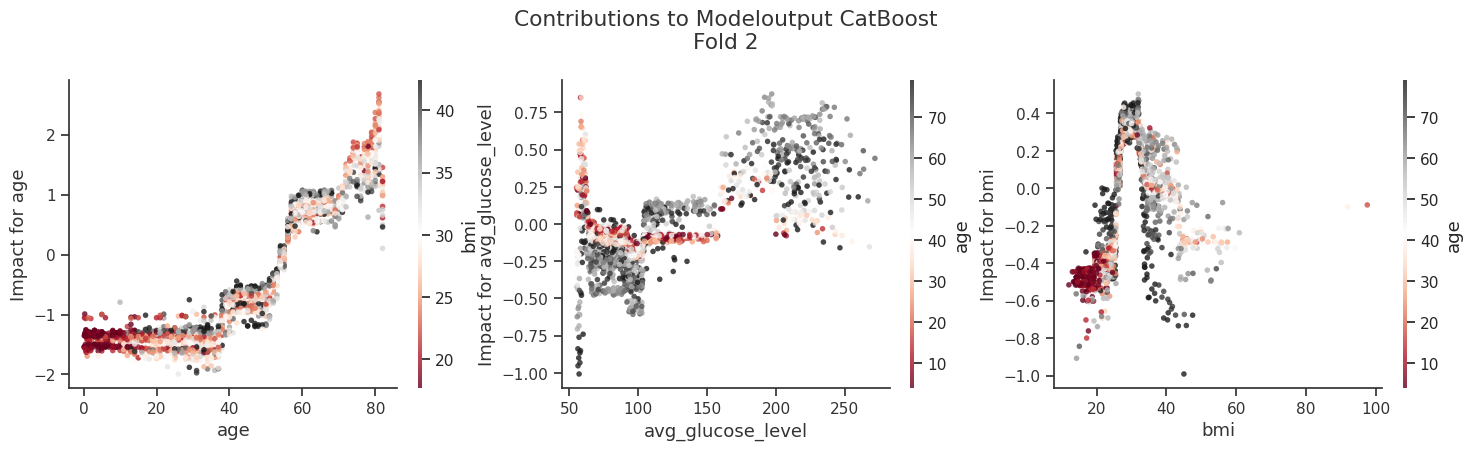

In [112]:
for i, f in enumerate([X2C, X1C]):
    SHAP_dependence(
        shap_values_CB[i][:,:-1], 
        f, 
        contVars, 
        "Contributions to Modeloutput CatBoost\nFold %s\n" % (i+1),
        ["bmi", "age", "age"]
    )

<p style="font-size : 16px">The jumps in "age" are interesting. At an age of around 40, 50 (fold 2) and 70, the risk increases abruptly. For the  glucose level there might be an optimal range between 80 and 160 (fold 1) and between 70 and 100 (fold 2). It can be seen that the contributions to the model output tend to become positive with increasing BMI in fold 1 and with a peak at 30 in fold 2. In fold 1, when exceeding a BMI of 30, the contributions to the model output are rather positive, which seems plausible at first glance. This characteristic of the CatBoost in fold 1 is also evident in the decision boundaries through the elongated lines.</p>

In [113]:
for i, d in enumerate([shap_values_CB[0][:,:-1], shap_values_CB[1][:,:-1]]):
    globals()[f"cb_drop_{i+1}"] = findLowVar(Xr1C, d)
    print(globals()[f"cb_drop_{i+1}"])

['smoking_status']
['work_type', 'smoking_status']


<font size="+1" color="grey"><b>5.10 Error Analysis </b></font><br><a id="5.10"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">In the following section, a so-called error analysis is performed. This brings prediction errors into connection with the features in order to be able to assess how reliable the predictions/risk assesments are over the various possible combinations of variables. Only selected features and folds are considered.</p>

In [114]:
def errors(x: list, y: list, m: list, titleSupplements: list, var: str):
    
    x=x.copy()
    
    fig, p = plt.subplots(nrows=3, ncols=2, figsize=(10,14))
    
    r=0
    c=0
    for i, M in enumerate(m):
        X=x[i].copy()
        X["preds"] = M.predict_proba(X)[:,1]
        X["err"] = y[i] - X.preds
        
        p[r,c].scatter(x=X[var], y=X["err"], c=y[i].astype("int"), cmap="coolwarm", alpha=0.5)
        p[r,c].set_title("Error of %s for model %s" % (var, titleSupplements[i]))
        p[r,c].set_ylim([-1, 1])
        p[r,c].set_xlabel(var)
        
        if c == 0:
            p[r,c].set_ylabel("Prediction Error")
        
        if c == 1:
            c=0
            r+=1
        else:
            c+=1

    plt.tight_layout(pad=3)
    plt.delaxes(p[2,1])
    plt.show()

<p style="font-size : 16px">First, we look at the relationship between forecast error and age.</p>

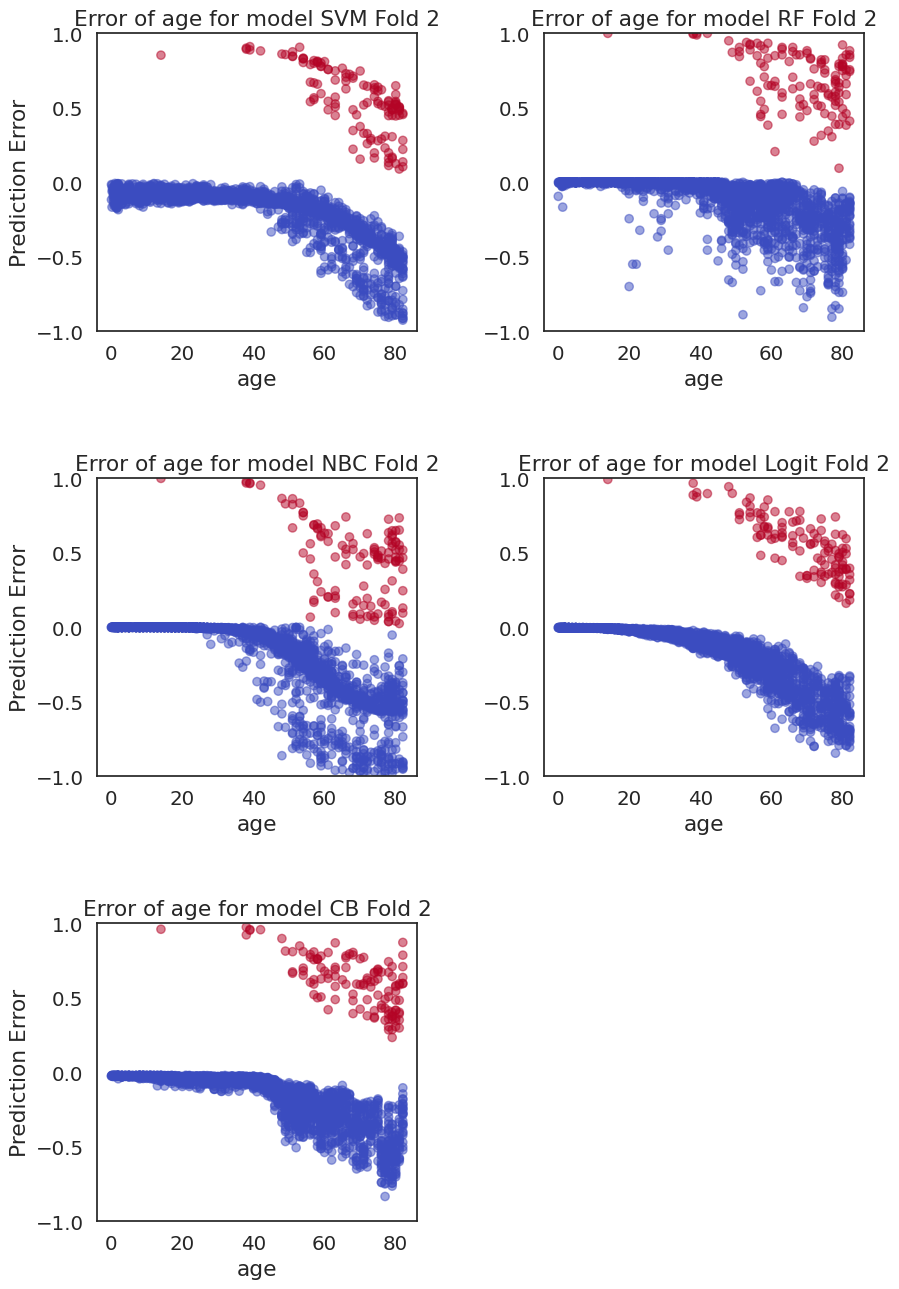

In [115]:
errors(
    [X2[contVars], X2, X2[contVars], X2, X2C], [y2, y2, y2, y2, y2C], 
    [modelSVM1, modelRF1, modelNBC1, modelLogit1, modelCB1], 
    [
        "SVM Fold 2",
        "RF Fold 2",
        "NBC Fold 2",
        "Logit Fold 2", 
        "CB Fold 2"
    ], 
    "age"
)

<p style="font-size : 16px">With increasing age, the forecast deviations become larger. This applies to all models in a similar manner. Support vector machines seem to be slightly better for strokes. Naive Bayes in particular has very small errors in the age range up to about 30.</p>

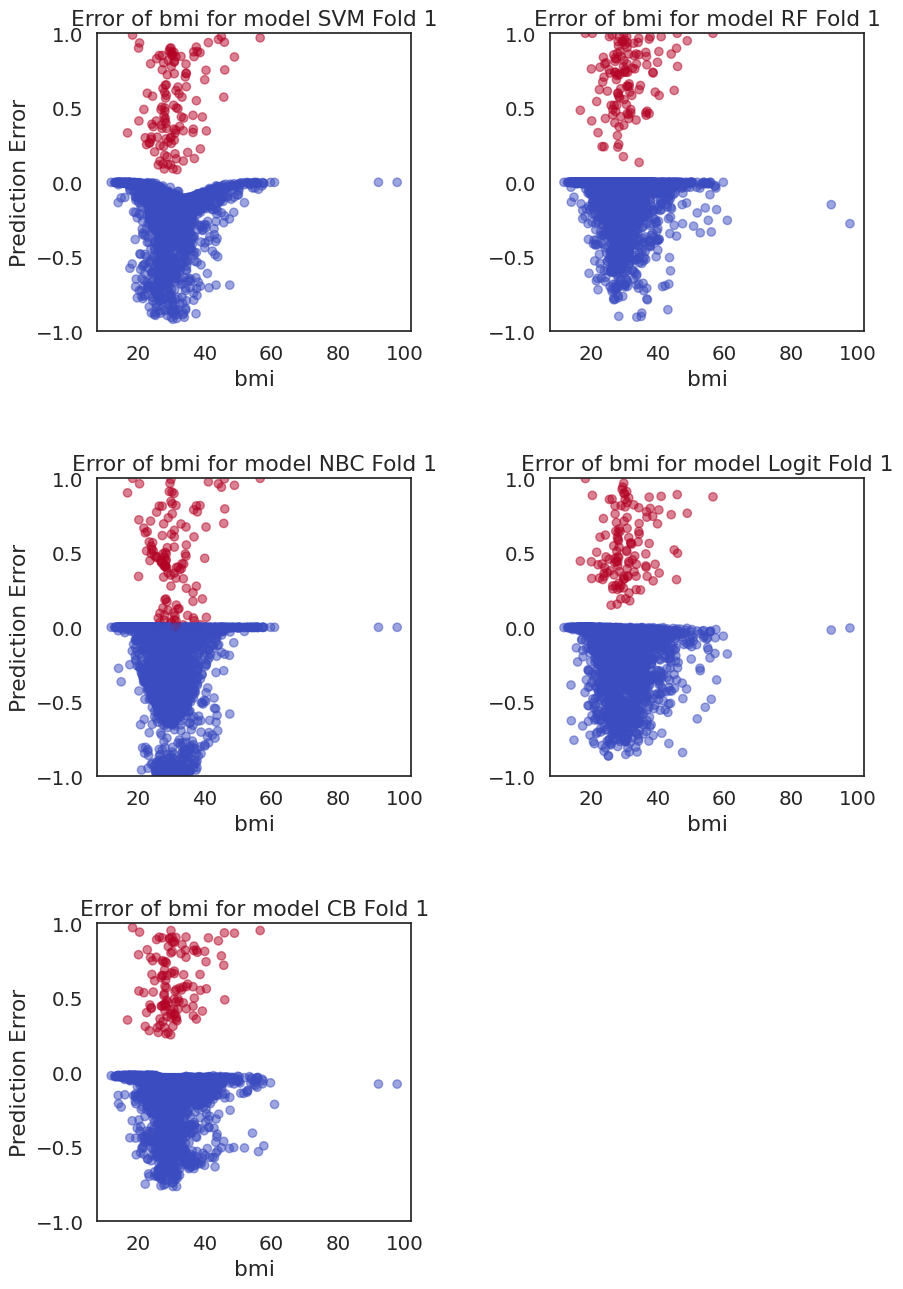

In [116]:
errors(
    [X1[contVars], X1, X1[contVars], X1, X1C], [y1, y1, y1, y1, y1C], 
    [modelSVM2, modelRF2, modelNBC2, modelLogit2, modelCB2], 
    [
        "SVM Fold 1",
        "RF Fold 1",
        "NBC Fold 1",
        "Logit Fold 1", 
        "CB Fold 1"
    ], 
    "bmi"
)

<p style="font-size : 16px">For both fold 1 and fold 2, the errors look very similar. Therefore, not all folds are shown. It is noticeable with the BMI that the models make similar errors. Catboost seems to be good for non-strokes and Naive Bayes for strokes. </p>

<p style="font-size : 16px">This uncertainty in prediction should not be hidden. In the following, we train a model that can roughly estimate the <b>absolute error</b>. For this purpose, we use a gradient boosting tree regressor, since decision trees do not extrapolate. This means that only observed values are predictable. So between zero and one. If possible, we would like to have all features included. Therefore no use of sampling and no regularization. One minus the predicted absolute error is assumed to be the confidence in the risk assessment and is provided with each individual risk assessment in the app. This makes it clear to the user that different risk assessments are not equally certain - especially in the case of unrealistic constellations.</p>

In [117]:
testX2 = pd.concat([y2, X2], axis=1)
# We use SVM1 becaus of the good performance
testX2["preds"] = modelSVM1.predict_proba(X2[contVars])[:,1]
testX2["err"] = np.abs(testX2.stroke - testX2.preds)
errGBR = GBR(loss="absolute_error", max_depth=6, n_estimators=100)
errGBR.fit(testX2.drop(columns=["preds", "err", "stroke"]), testX2["err"])
from sklearn.metrics import mean_absolute_error
print("Mean absolute Error:", round(mean_absolute_error(y1, errGBR.predict(X1)), 4))
#And we save the learned model hypothesis
joblib.dump(errGBR, "errGBR.pkl");

Mean absolute Error: 0.2089


<p style="font-size : 16px">The regression model, as mentioned, does not have to perform really well, but only roughly reflect the extent to which the model can be trusted.</p>

<font size="+1" color="grey"><b>5.11 Reducing Complexity </b></font><br><a id="5.11"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">For Random Forest we drop the unused feature to balance the "bias variance tradeoff" a little bit better. With Logit or CatBoost, removing features that don't have a big impact on model output wasn't worth it.</p>

In [118]:
CrossVal(RF, param_gridRF, [Xr1.drop(columns=rf_drop_1), Xr2.drop(columns=rf_drop_2)], [yr1, yr2])
makeModelAndPred([grid1, grid2], "RF", [X2.drop(columns=rf_drop_1), X1.drop(columns=rf_drop_2)])

({'ccp_alpha': 0,
  'max_depth': 20,
  'max_features': 0.6,
  'max_samples': 0.9,
  'min_samples_leaf': 1,
  'n_estimators': 180},
 {'ccp_alpha': 0.0001,
  'max_depth': 18,
  'max_features': 0.6,
  'max_samples': 0.9,
  'min_samples_leaf': 1,
  'n_estimators': 150})

In [119]:
save([modelRF1, modelRF2], "rf")

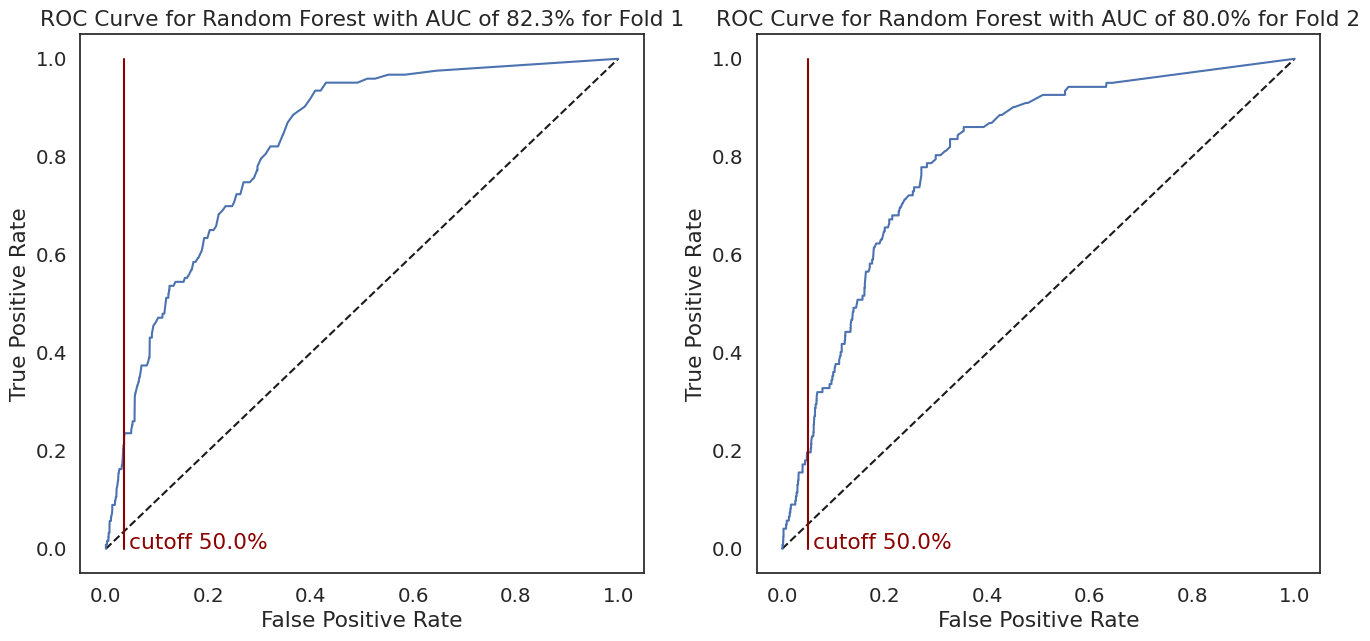

In [120]:
aucRF, std_RF = roc(
    [y2, y1], 
    [
        modelRF1.predict_proba(X2.drop(columns=rf_drop_1))[:, 1], 
        modelRF2.predict_proba(X1.drop(columns=rf_drop_2))[:, 1]
    ], 
    "Random Forest"
)

<p style="font-size : 16px">Throwing out the aforementioned features actually brought an improvement in the AUC in fold 1 and a slight decrease in AUC in fold 2.</p>

<font size="+1" color="grey"><b>5.12 Ensemble </b></font><br><a id="5.12"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">We now assemble an ensemble of the models with the best performance. The results are (weighted) averaged. The weighting is dependend on the basis of the AUC performance. Higher performance should lead to a disproportionate weighting, since with a more linear weighting the differences to the individual models would only be marginal. For m models we use as weight for model j:</p>

$$ w_j= \frac{AUC_j^{exp}}{\sum_{i=1}^{m} AUC_i^{exp}} $$ 

<p style="font-size : 16px">The larger the exponent (exp), the stronger the weighting towards the methods with better measured AUC. One could consider optimizing this process by testing for many exponents per fold and taking the set with the best combination at the end. However, this is exactly where the danger of "leadboard overfitting" described above exists.  Therefore, only rough tuning is done by hand. Anyway, we still have the test data set. First we apply on the validation data set.</p>

In [121]:
exp=80
for i in [1,2]:
    ssa=aucSVM[i-1]**exp+aucRF[i-1]**exp+aucLogit[i-1]**exp+aucCB[i-1]**exp+aucNBC[i-1]**exp
    
    svmp = eval(f"modelSVM{i}").predict_proba(eval(f"X{2 if i == 1 else 1}[contVars]"))[:, 1]\
        * aucSVM[i-1]**exp/ssa
    print("Weight Support Vector Machines fold %i" % i, ":", round(aucSVM[i-1]**exp/ssa, 2))
    rfp = eval(f"modelRF{i}").predict_proba(eval(f"X{2 if i == 1 else 1}").drop(columns=eval(f"rf_drop_{i}")))[:, 1]\
        * aucRF[i-1]**exp/ssa
    print("Weight Random Forest fold %i" % i, ":", round(aucRF[i-1]**exp/ssa, 2))    
    logp = eval(f"modelLogit{i}").predict_proba(eval(f"X{2 if i == 1 else 1}"))[:, 1]\
        * aucLogit[i-1]**exp/ssa
    print("Weight Logit fold %i" % i, ":", round(aucLogit[i-1]**exp/ssa, 2))    
    cbp = eval(f"modelCB{i}").predict(eval(f"X{2 if i == 1 else 1}C"), prediction_type='Probability')[:, 1]\
        * aucCB[i-1]**exp/ssa
    print("Weight CatBoost fold %i" % i, ":", round(aucCB[i-1]**exp/ssa, 2))    
    nbcp = eval(f"modelNBC{i}").predict_proba(eval(f"X{2 if i == 1 else 1}[contVars]"))[:, 1]\
        * aucNBC[i-1]**exp/ssa
    print("Weight Naive Bayes Classifier fold %i" % i, ":", round(aucNBC[i-1]**exp/ssa, 2))
    print("")    

    globals()[f"p{i}"] = svmp + rfp + logp + cbp + nbcp 
    

Weight Support Vector Machines fold 1 : 0.58
Weight Random Forest fold 1 : 0.03
Weight Logit fold 1 : 0.14
Weight CatBoost fold 1 : 0.08
Weight Naive Bayes Classifier fold 1 : 0.16

Weight Support Vector Machines fold 2 : 0.13
Weight Random Forest fold 2 : 0.03
Weight Logit fold 2 : 0.52
Weight CatBoost fold 2 : 0.27
Weight Naive Bayes Classifier fold 2 : 0.05



<p style="font-size : 16px">Each model is included. Now let's look at the performance of the ensemble. Thereby we use a cut-off criterion, which at least keeps the accuracy on the share of the majority class and at the same time identifies not only the majority class.</p>

In [122]:
for i, k in zip([1, 2], [0.79, 0.79]):
    print(classification_report(
        globals()[f"y{1 if i == 2 else 2}"], 
        [1 if i >= k else 0 for i in globals()[f"p{i}"]]
    ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2393
           1       0.40      0.08      0.14       123

    accuracy                           0.95      2516
   macro avg       0.68      0.54      0.55      2516
weighted avg       0.93      0.95      0.93      2516

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2394
           1       0.67      0.02      0.03       122

    accuracy                           0.95      2516
   macro avg       0.81      0.51      0.50      2516
weighted avg       0.94      0.95      0.93      2516



<p style="font-size : 16px">At 79%, we can find a cut-off criterion for which the accuracy is equal to the proportion of the majority class. Nevertheless, both classes are identified. We can therefore assume that this ensemble also performs well in the area of risk assessment (in percentage terms).</p>

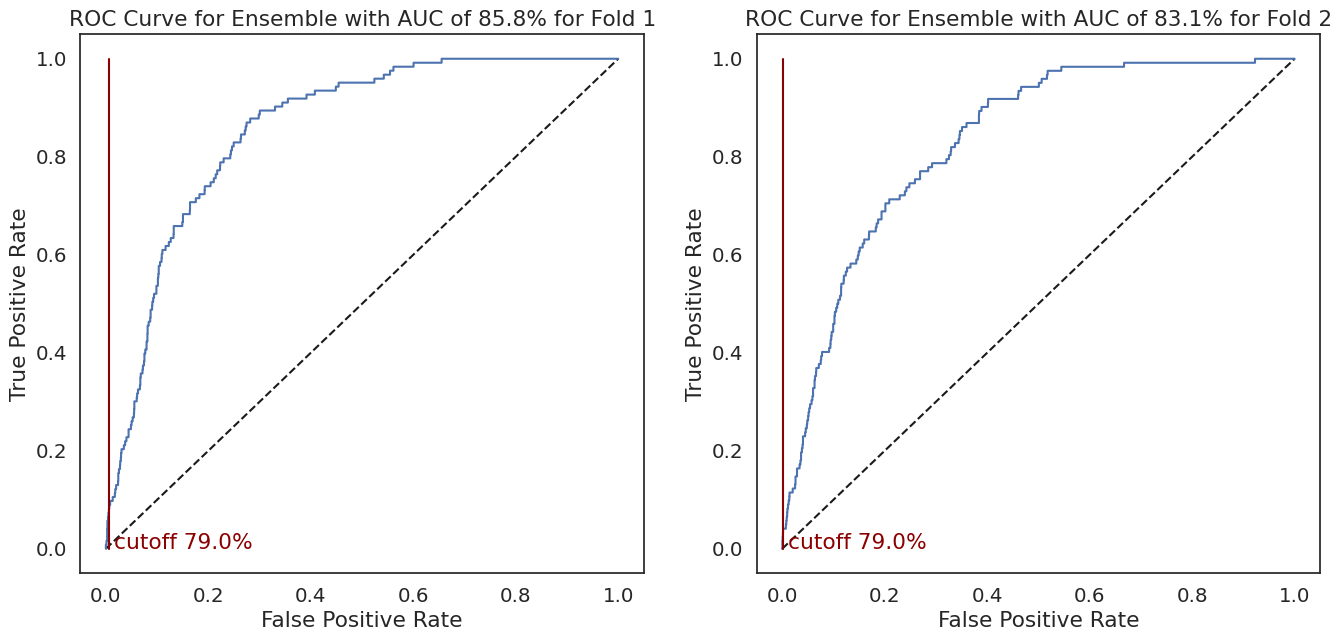

In [123]:
aucEnsemble, std_Ensemble = roc(
    [y2, y1], 
    [
        p1, 
        p2
    ], 
    "Ensemble",
    cut=0.79
)

<p style="font-size : 16px">The requirement of AUC equal to 80% is exceeded. In addition, the classification performance indicates that the model has a certain, albeit low, sensitivity/recall despite the minority class problem. So how does the ensemble perform compared to all the other models?</p>

<font size="+1" color="grey"><b>5.12.1 Cross Comparison </b></font><br><a id="5.12.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">At this point we take another look at the metrics in cross-comparison. First the AUC and then the standard deviation of the prediction error, which should show how the individual models are generalised, are compared.</p>

In [124]:
def tempDf(inp: list, colnames: list, by: str, i: str, j: str, name:str):
    """
    Function to create a dataframe to compare model metrics.
    """
    tmp = pd.DataFrame(
        inp,
        columns=colnames,
    )
    tmp["id"] = tmp.index
    
    tmp = pd.wide_to_long(tmp, by, i=i, j=j)
    tmp.reset_index(inplace=True)
    tmp.rename(columns={by: name, j: by}, inplace=True)
    
    return tmp

In [125]:
Std_dev = tempDf([
    std_SVM, 
    std_KNN, 
    std_NBC, 
    std_RF, 
    std_Logit, 
    std_CB, 
    std_Ensemble
    ], ["Fold 1", "Fold 2", "Method"], "Fold ", "id", "partition", "Standard Deviation")

In [126]:
model_AUC = tempDf([
    aucSVM, 
    aucKNN, 
    aucNBC, 
    aucRF, 
    aucLogit, 
    aucCB, 
    aucEnsemble
    ], ["Fold 1", "Fold 2", "Method"], "Fold ", "id", "partition", "AUC")

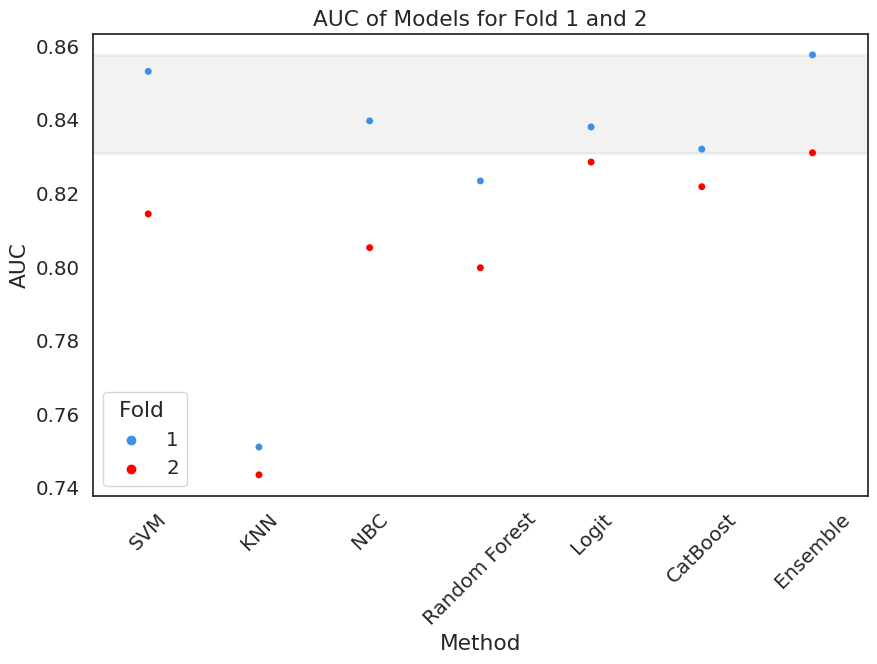

In [127]:
plt.figure(figsize=(10,6))
plt.title("AUC of Models for Fold 1 and 2")

p=sns.swarmplot(
    data=model_AUC[["AUC", "Method", "Fold "]], 
    x="Method", 
    y="AUC", 
    hue="Fold ",
    palette=["#3a91e6", "red"]
)
rect=mpatches.Rectangle(
    (-1,aucEnsemble[1]),8,aucEnsemble[0]-aucEnsemble[1], 
    fill = True,
    color = "grey",
    alpha=0.1,
    linewidth = 2
)
plt.gca().add_patch(rect)
p.set_ylabel("AUC")
p.tick_params(axis='x', rotation=45)
plt.show()

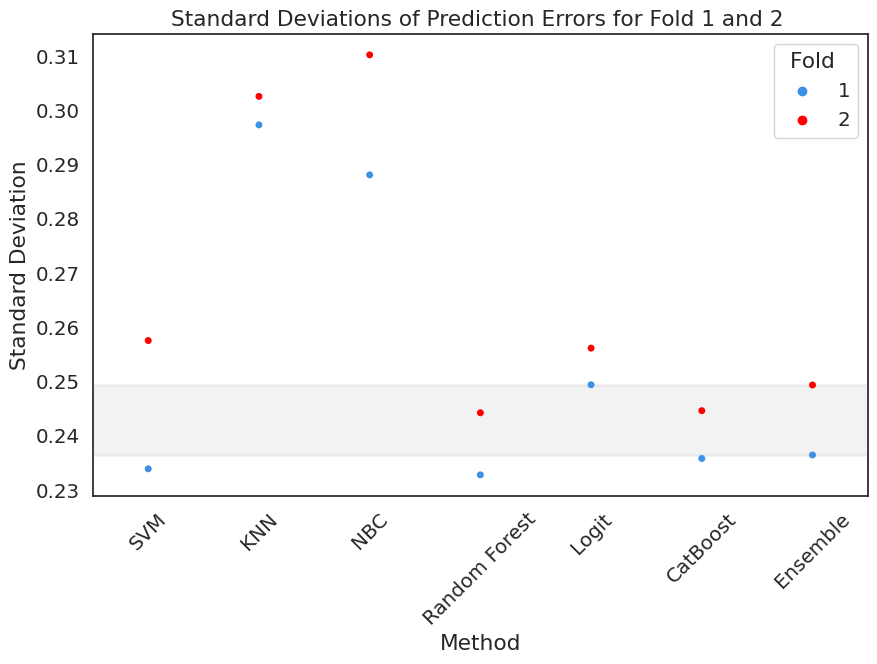

In [128]:
plt.figure(figsize=(10,6))
plt.title("Standard Deviations of Prediction Errors for Fold 1 and 2 ")

p=sns.swarmplot(
    data=Std_dev[["Standard Deviation", "Method", "Fold "]], 
    x="Method", 
    y="Standard Deviation", 
    hue="Fold ",
    palette=["#3a91e6", "red"]
)
rect=mpatches.Rectangle(
    (-1,std_Ensemble[1]),8,std_Ensemble[0]-std_Ensemble[1], 
    fill = True,
    color = "grey",
    alpha=0.1,
    linewidth = 2
)
plt.gca().add_patch(rect)
p.set_ylabel("Standard Deviation")
p.tick_params(axis='x', rotation=45)
plt.show()

<p style="font-size : 16px">The ensemble shows the best performance for the AUC by fold. For the standard deviation of the prediction error, the ensemble is in a range that is only undercut for fold 1 by SVM, Random Forest, and CatBoost. Fold 2, on the other hand, is undercut merely by Random Forest and CatBoost. Nevertheless, the ensemble shows the most balanced overall performance. </p>

<font size="+1" color="grey"><b>5.12.2 Unseen Test Data </b></font><br><a id="5.12.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Now we test for the completely unseen data, which has not even been subjected to hyperparameter tuning. In the following, both ensembles are applied to the same test data set.</p>

In [129]:
print("In total, there are", test_yC.sum() ,"observations of the stroke class in the data set.")

In total, there are 4 observations of the stroke class in the data set.


In [130]:
for i in [1,2]:
    ssa=aucSVM[i-1]**exp+aucRF[i-1]**exp+aucLogit[i-1]**exp+aucCB[i-1]**exp+aucNBC[i-1]**exp
    
    svmp = eval(f"modelSVM{i}").predict_proba(test_X[contVars])[:, 1]\
        * aucSVM[i-1]**exp/ssa
    rfp = eval(f"modelRF{i}").predict_proba(test_X.drop(columns=eval(f"rf_drop_{i}")))[:, 1]\
        * aucRF[i-1]**exp/ssa
    logp = eval(f"modelLogit{i}").predict_proba(test_X)[:, 1]\
        * aucLogit[i-1]**exp/ssa
    cbp = eval(f"modelCB{i}").predict(test_XC, prediction_type='Probability')[:, 1]\
        * aucCB[i-1]**exp/ssa
    nbcp = eval(f"modelNBC{i}").predict_proba(test_X[contVars])[:, 1]\
        * aucNBC[i-1]**exp/ssa

    globals()[f"p{i}"] = svmp + rfp + logp + cbp + nbcp 

In [131]:
for i, k in zip([1, 2], [0.79, 0.79]):
    print(classification_report(
        test_y, 
        [1 if i >= k else 0 for i in globals()[f"p{i}"]]
    ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.00      0.00      0.00         4

    accuracy                           0.94        77
   macro avg       0.47      0.49      0.48        77
weighted avg       0.90      0.94      0.92        77

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       0.00      0.00      0.00         4

    accuracy                           0.95        77
   macro avg       0.47      0.50      0.49        77
weighted avg       0.90      0.95      0.92        77



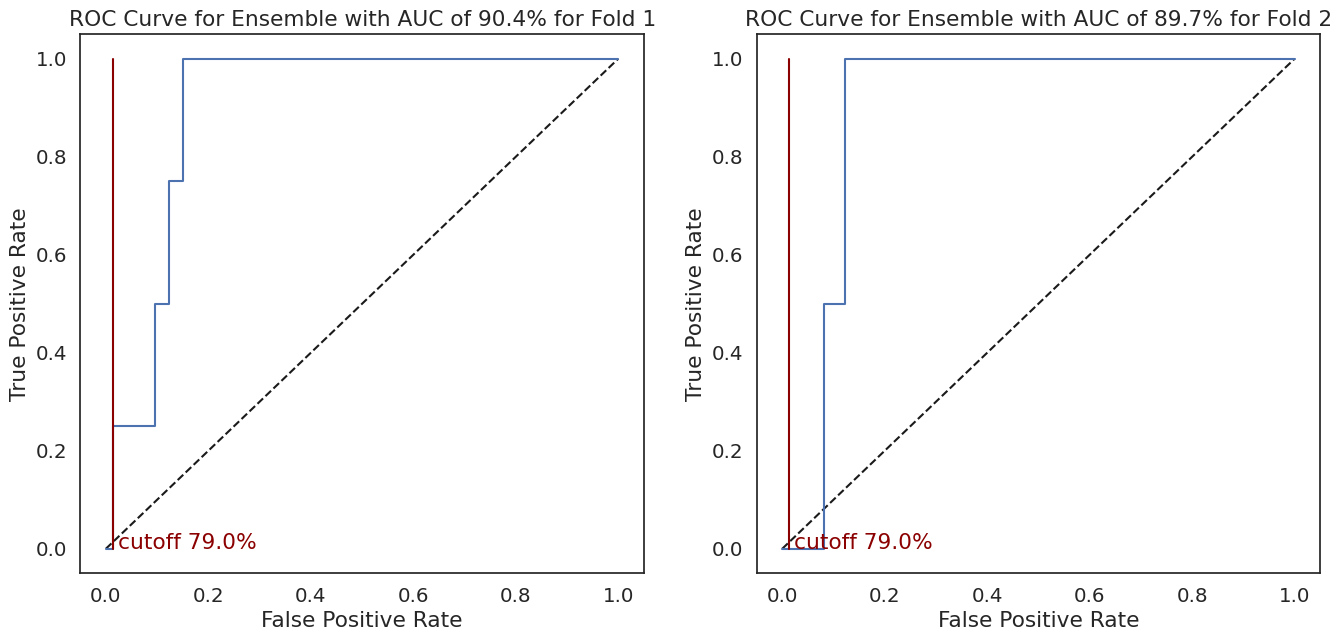

In [132]:
_, _ = roc(
    [test_y, test_y], 
    [
        p1, 
        p2
    ], 
    "Ensemble",
    cut=0.79
)

<p style="font-size : 16px">If a classification should take place, the cut-off criterion should be examined more closely. Because of the fairly low sensitivity of the model at a cut-off criterion of 79%, no case of stroke is identified in the test dataset. However, for our purposes the cut-off criterion is only used to get a better idea of classification performance to evaluate the overall quality of the model.</p>

<font size="+3" color="grey"><b>6. Key Insights and Value Added </b></font><br><a id="6"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">The performance of the models is generally satisfactory. It has been shown that the data contain strong non-linearities. These are difficult or impossible to detect with human perception. There are several combinations of life situations that lead to very different results. The resulting model can provide added value in making people aware that they are in a risk situation. As the results show, this is not necessarily immediately obvious in every constellation. The final model can help people orient themselves in a healthier direction.</p>

<font size="+1" color="grey"><b>6.1 Critical assessment </b></font><br><a id="6.1"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">Despite the good results, there are several points of criticism. It is not entirely clear how the data was collected. Specifically, there could be systematic biases. For example, it could be that the association between BMI and stroke decreases that strongly at a BMI exceeding 30 because patients with a very high BMI die earlier for other reasons. Therefore there might be too few cases in the dataset to be able to make a statistically sound statement. Conversely, the prognosis for recovery is often significantly better for overweight patients than for normal-weight patients. This effect is called the "obesity paradox" [cf. Forlivesi, Chappellari, Bonetti, 2020 p. 417]. The dataset used for learning should therefore urgently be enriched with further data (observations). This brings us to the next problem. The developed app must be constantly checked and updated as soon as new data is available. It is not enough to simply relearn. Every algorithm must be validated in the same way according to scientific findings - as was done above. In order to refine the model considerably, further variables should be added, such as sporting activity, alcohol consumption, further blood values, medication, or dietary habits. The possibility of making a prognosis from the life status of a person has the advantage that the data is easily available. The main difficulty lies in the average glucose level, which is more likely to be present in diabetics. However, the addition of medication data would increase accuracy. For example, it was not possible to test for the use of statins, which have a positive effect on strokes.</p>
    
<p style="font-size : 16px">Furthermore, it might be worthwhile to increase the folds in the cross-validation in order to give the training data set more systematics and thus greater comparability in the cross-comparison. </p>

<font size="+1" color="grey"><b>6.2 Outlook</b></font><br><a id="6.2"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">In conclusion, it can be said that if the algorithms were fed with enough data, the prediction would hit with a high probability. Doctors could feed the data directly into the app and get a quick assessment of the situation. However, in order to be able to make a treatment decision based on the algorithms, the performance of the ensemble still needs to improve considerably. For the time being, however, the ensemble could serve as a support tool to back up the doctor's assessment or to provide new food for thought.</p>

<font size="+3" color="grey"><b>7. Deployment </b></font><br><a id="7"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

<p style="font-size : 16px">A suitable IT infrastructure is required to deploy a model. The trained model must be maintainable. This means that it must be readjusted as more data is received, as this can significantly increase performance. First, a web interface could be created that can be used, for example, by hospitals to enter patient data. For this, data protection regulations must be observed. This means that the model can probably only be re-trained based on the data collected by the respective customer. The data collection takes place in separate areas in a cloud system created for the respective customer. This step was skipped for this examination task. The developed ensemble is used to caclulate the risk of a stroke. A probability/risk has an advantage in that a certain degree of uncertainty is generated. It must be made clear to the user that in the end the individual case must always be assessed by a physician. The app is meant as a support system.</p>

<img src=" 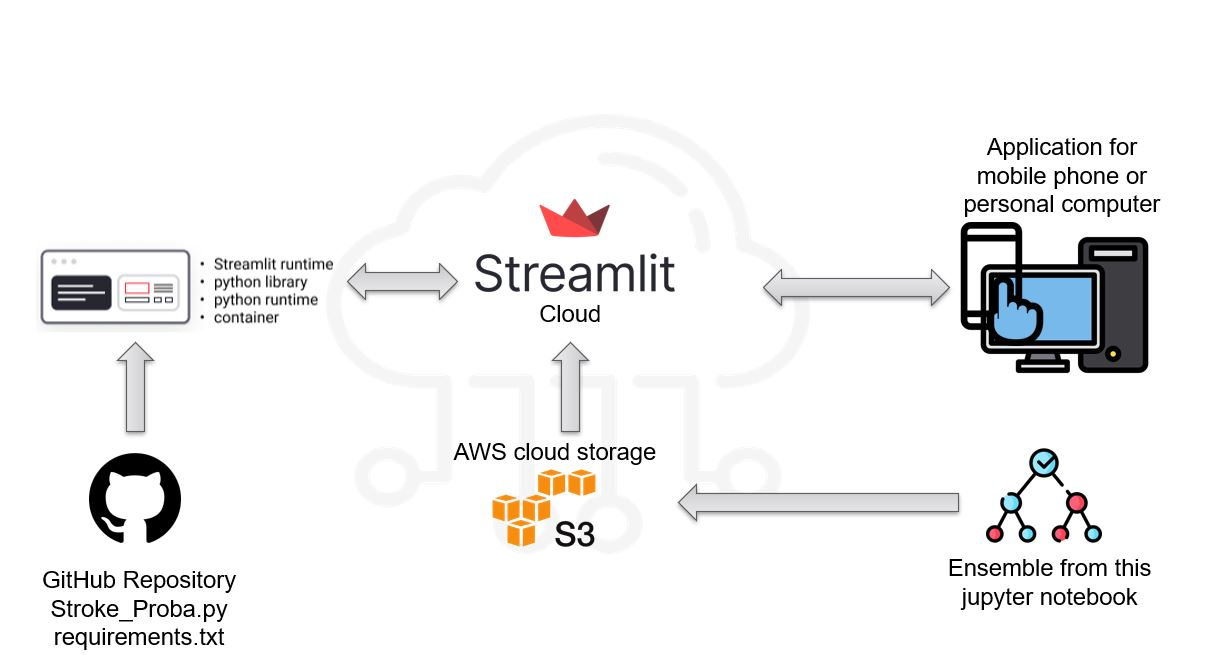" style="float: center" />

<p style="font-size : 16px">How exactly does the deployment work? </p>

<p style="font-size : 16px">First, the learned model hypotheses are persisted in a cloud storage, in this case an AWS s3 bucket. The code that accesses the hypotheses can calculate an individual risk is stored on GitHub. The individual patient data is entered by the user via the app. A container is created from GitHub using a "requirements.txt", on the basis of which the code is executed in a Streamlit-Cloud. Through this interaction, a very high-performance real-time prognosis of the risk of stroke can be calculated and displayed in the app.</p>

<p style="font-size : 16px">The app is set up in such a way that it is very easy to enter the patient data via a side menu and then receive a risk statement directly - including prediction certainty measure. If one varies the data, the resulting change is immediately visible. In addition, advanced information is provided that divides the prognosis of the entire ensemble into the two folds and per model, so that the contributions to the risk become visible.</p>

<a href="https://frankmollard-stroke-probability-stroke-proba-9rjrn6.streamlitapp.com/" style="font-size: 18px; color: #e24a4b">Click here to go tho the Application</a>

<a href="https://github.com/frankmollard/Stroke_Probability" style="font-size: 18px; color: #e24a4b">Click here to go tho the GutHub repo</a>

<font size="+1" color="grey"><b> Sources</b></font><br><a id="sources"></a>
<a href="#top" aria-pressed="true" style="color:black" data-toggle="popover">Go back to the TOP</a>

* Breiman, L. (2001). Random Forests, Kluwer Academic Publishers. Manufactured in The Netherlands
* Domingos, P., & Pazzani, M. (1997). On the Optimality of the Simple Bayesian Classiﬁer under Zero-One Loss. Machine Learning
* N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, (2002). “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research
* Forlivesi, S. Chappellari, M., Bonetti, B., (2020). Obesity paradox and stroke: a narrative review. Eat Weight Disord 26, pp. 417–423 
* Farrar D. E., Glauber R. R. (1967). Multicollinearity in regression analysis: the problem revisited. The Review of Economic and Statistics. pp. 92–107.
* Hyun-Jung, L., Eue-Keun, C., Seung-Hwan, L., Yong-Jin, K., Kyung-Do, H., Seil, O. (2017). Risk of ischemic stroke in metabolically healthy obesity: A nationwide population-based. A nationwidepopulation-based study. PLoS ONE 13
* Kurth, T., Gaziano, M., Berger, K., Kase, C. S., Rexrode, K. M., MD, Cook, N. R., Buring, J. E., Manson, J. E., (2002). Body Mass Index and the Risk of Stroke in Men,  Arch Intern Med. 2002;162(22):2557-2562.
* Olsen, T. S. (2014), Blood glucose in acute stroke, Expert Review of Neurotherapeutics, 9:3, 409-419, DOI: 10.1586/14737175.9.3.409
* Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A. V., Gulin, A. (2019). CatBoost: unbiased boosting with categorical features
* Reeves M. J., Bushnell C. D., Howard G., Gargano J. W., Duncan P. W., Lynch G., Khatiwoda A., Lisabeth L. (2008). Sex differences in stroke: epidemiology, clinical presentation, medical care, and outcomes. Lancet Neurol 2008; 7: 915–926.
* Rexrode, K. M., Madsen, T. E., Yu, A. Y. X., Carcel, C., Lichtman, J. H., Miller, E. C. (2022). The Impact of Sex and Gender on Stroke. Circulation Research. 2022;130: pp. 512–528
* Yun-Mi, S., Joohon S., Smith, G. D., Ebrahim, S. (2004). Body Mass Index and Ischemic and Hemorrhagic Stroke. Stroke Volume 35, Issue 4, pp. 831 - 836